In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# path_to_csv_annotations = "C:/Users/margauxf/Dropbox/PhD/2023/1-AnnChor1000-Reviewed-CSVsOnly"
# path_to_json_skeletons = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON"

In [2]:
#Steps:
#Only do for one Sample instance: GIS0004
#Loop through GIS csv and find all the segments that are for ExtDerriereRight or ExtDerriereLeft 0/1
#Calculate the frame numbers/intervals for these segments
#Get the json files for all those segments
#Pull one segment for sample code.
#Plot the segment?
#RH,LH,RF,LF -> create benesh vector for each.

In [19]:
#INITIAL TEST CODE
#Code to return the frame_segments for extension derriere

#specify which class's segments you are looking for...
def getSingleVideoSegments(VID, csv_path, cls):
    try:
        lines = open(path_to_CSV,'r').readlines()[2:]
    except Exception as e:
        print(e)
        exit(1)
    frame_st_et_list = []
    for line in lines:
        try:
            l=line.split(",")
            vid_ID = l[1].split('\\\\')[3].replace('"','')[:-5]
            #determine the kind of label:
            lab = l[4].replace('"','')
            lab = lab.strip("{}\n").split(":") #lab[0] is 'OnlyOneDancer?' or 'BalletSteps'
            #print(lab[0])
            cl=0
            onlyOne=0
            if lab[0].lower() == 'OnlyOneDancer?'.lower(): # Check if it's a onlyOne flag
                onlyOne = int(lab[1])
                continue #skip these
            elif int(lab[1])==19: #skip the backwards annotations for now
                continue
            elif lab[0].lower() == 'BalletSteps'.lower():
                cl = int(lab[1]) #otherwise it's a ballet step class label
            
            if(vid_ID == VID): # look for our video of interest:
                #print(l)
                
                if cl == cls: # if it is an extensionDerriereRight segment:
                    print(vid_ID)
                    print("class: ", cl)
                    print("start: ", l[2])
                    print("end: ", l[3])
                    st = float(l[2])
                    et = float(l[3])
                    #calculate the frame numbers for 25 fps video:
                    st_frame = round(st*25)
                    et_frame = round(et*25)
                    segment_fr = [cl,st_frame, et_frame]
                    print(segment_fr)
                    frame_st_et_list.append(segment_fr)
    
        except Exception as e:
            print(e)
    print("frame_st_et_list: ", frame_st_et_list)
    return frame_st_et_list

#path_to_CSV = "C:/Users/margauxf/Dropbox/PhD/2023-OpenPose-Work/Samples/GIS.csv"
path_to_CSV = "C:/Users/margauxf/Dropbox/PhD/2023/1-AnnChor1000-Reviewed-CSVsOnly/GIS.csv"
#frame_segments_ls = getSingleVideoSegments("GIS0004",path_to_CSV, 0) # Right
frame_segments_ls = getSingleVideoSegments("GIS0004",path_to_CSV, 1) # Left

GIS0004
class:  1
start:  12.066
end:  12.426
[1, 302, 311]
GIS0004
class:  1
start:  18.223
end:  19.763
[1, 456, 494]
GIS0004
class:  1
start:  27.787
end:  28.427
[1, 695, 711]
GIS0004
class:  1
start:  33.221
end:  34.061
[1, 831, 852]
GIS0004
class:  1
start:  39.155
end:  39.535
[1, 979, 988]
frame_st_et_list:  [[1, 302, 311], [1, 456, 494], [1, 695, 711], [1, 831, 852], [1, 979, 988]]


num_colours 30
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000302_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000303_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000304_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000305_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000306_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000307_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000308_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000309_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000310_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000311_keypoints.json


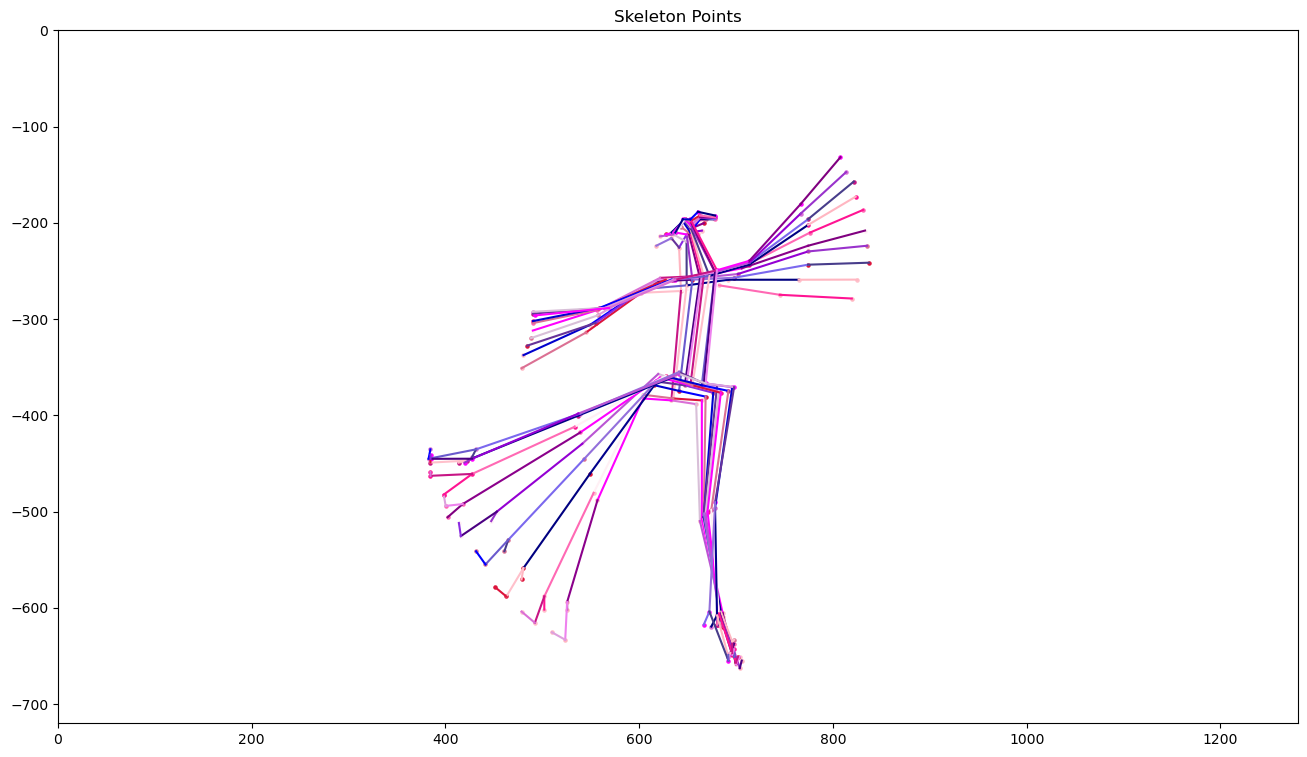

In [20]:
#INITIAL TEST CODE TO VISUALIZE SEGMENT SKELETONS PLOTTED OVER ONE ANOTHER
#Get the json files for the segments we have now...
import matplotlib.pyplot as plt
path_to_JSON = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON"

# GIS0004_000000000169_keypoints.json - 12 placeholders
def plot_segment_skeleton_points(start_frame, end_frame, vid_ID):
    bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
    penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
    print("num_colours",len(penColor))
    fig, ax = plt.subplots(1, figsize=(16,9))
    ax.set_prop_cycle('color',penColor)
    plt.title('Skeleton Points')
    plt.xlim(0, 1280)
    plt.ylim(-720, 0)
        
    st_file_name = vid_ID +"_"+str(start_frame).rjust(12, '0') +"_keypoints.json"
    # startf = 5   end = 9... 9-5 = 4 for i in range(4+1) -> 0,1,2,3,4
    iter_count = end_frame - start_frame
    for i in range(iter_count+1):
        json_file_num = start_frame + i
        json_file_name = vid_ID +"_"+str(json_file_num).rjust(12, '0') +"_keypoints.json"
        json_file_path = path_to_JSON+"/"+vid_ID+"/"+json_file_name
        print(json_file_path)
        img_json = pd.read_json(json_file_path)
        keypoints = img_json.people[0]['pose_keypoints_2d']
        #print(keypoints)
        x = keypoints[0::3]
        yorig = keypoints[1::3]
        corig = keypoints[2::3]
        y = [-y for y in yorig]
        sc = ax.scatter(x,y, s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]])

#plot_segment_skeleton_points(169, 206,"GIS0004") # Right
plot_segment_skeleton_points(302, 311,"GIS0004") # Left

#Pull one segment for sample code.
#Plot the segment?
#RH,LH,RF,LF -> create benesh vector for each.

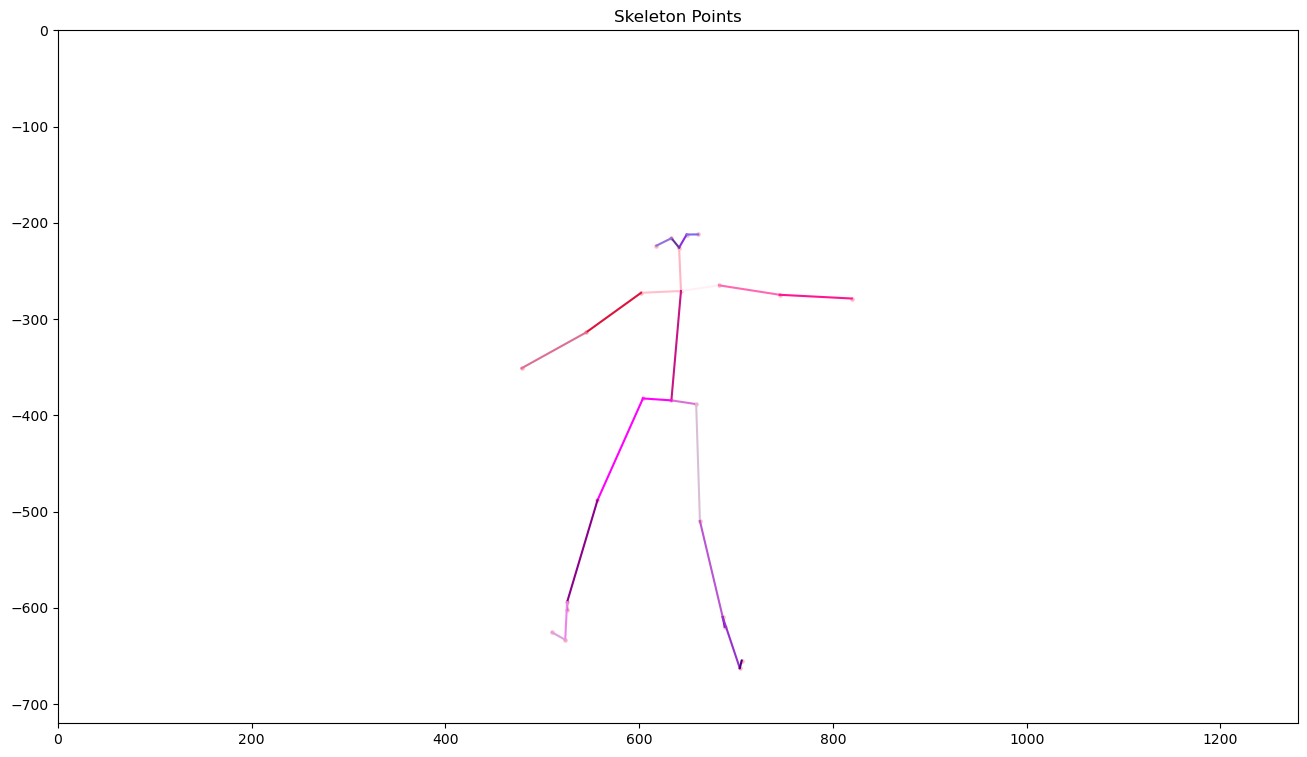

In [21]:
#INITIAL TEST CODE TO VISUALIZE A SINGLE SKELETON
import matplotlib.pyplot as plt
#Plot a single sample frame
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
fig, ax = plt.subplots(1, figsize=(16,9))
ax.set_prop_cycle('color',penColor)
plt.title('Skeleton Points')
plt.xlim(0, 1280)
plt.ylim(-720, 0)


#ToComment
#sample_json_file_pth = "./SkeletonXDataPerClass/0-ExtDerriereOnRight/ALB0000_000000000424_keypoints.json"
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000169_keypoints.json" #right
sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000302_keypoints.json" #left
img_json = pd.read_json(sample_json_file_pth)
keypoints = img_json.people[0]['pose_keypoints_2d']
#print(keypoints)
x = keypoints[0::3]
yorig = keypoints[1::3]
corig = keypoints[2::3]
y = [-y for y in yorig]
sc = ax.scatter(x,y, s=5)
for bone in bones:
    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
        continue
    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]])
#toComment


In [3]:
#USED HELPER METHODS:

#RH,LH,RF,LF -> create benesh vector for each frame...

#Determine horizontal stave lines / X values for this skeleton:
import math

#Helper method
def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

#Helper method
def getLowestFootCoordIndex(y_arr):
    #find the "lowest" foot coordinate. We'll look at y values 22,23,19,20 (toes) 11,24,21,14 (ankles/heels)
    foot_indices = [11,14,19,20,21,22,23,24]
    max_foot_y = 0
    max_foot_index = 0
    for i in foot_indices:
        #print(f"footindex:{i}: {y_arr[i]}")
        if y_arr[i] > max_foot_y:
            max_foot_y = y_arr[i]
            max_foot_index=i
    #print(f"'lowest' foot y value: {max_foot_y}")
    return max_foot_index

#Helper method
def isLorR(index):
    #RHeel:24 RAnkle:11 RBigToe:22 RSmallToe:23
    #LHeel:21 LAnkle:14 LBigToe:19 LSmallToe:20
    R_arr=[24,11,22,23]
    L_arr=[21,14,19,20]
    toReturn = "None"
    for r in R_arr:
        if index == r:
            toReturn = 'right'
    for l in L_arr:
        if index == l:
            toReturn = 'left'
    #print(toReturn)
    return toReturn
        


#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000169_keypoints.json" # right
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000302_keypoints.json" #left
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000180_keypoints.json"
#206
def establish_stave_lines(file_path):
    #print("Stave lines:")
    img_json = pd.read_json(file_path)
    keypoints = img_json.people[0]['pose_keypoints_2d']
    #print(keypoints)
    x_arr = keypoints[0::3]
    y_arr = keypoints[1::3]
    #print("X-coords:",x_arr)
    #print(len(x_arr))
    #print("Y-coords:",y_arr)
    #print(len(y_arr))
    #We know for the start frame for Extensions derriere, the head/eyes are the highest points, feet are the lowest points
    #print(f'X: {keypoints[0]}, {keypoints[1]}')
    # find the top of head line, find the below the feet line:
    #find the distance between the nose and the base of the neck, Coords 0 and 1
    nose_neck_dist = calculate_distance(x_arr[0], y_arr[0],x_arr[1],y_arr[1])
    #print("Nose-Neck-Distance: ", nose_neck_dist )
    nose_tophead_dist = 0.75*nose_neck_dist #we estimate the distance to the top of head to be 3/4 of neck-nose distance.
    toph_line = y_arr[0]-nose_tophead_dist
    #print("toph_line y value: ", toph_line)
    #find the "lowest" foot coordinate. We'll look at y values 22,23,19,20 (toes) 11,24,21,14 (ankles/heels)
    max_foot_index = getLowestFootCoordIndex(y_arr)
    l_or_r = isLorR(max_foot_index)
    # if we are working with the right foot: [24,11,22,23], for the left foot: [21,14,19,20] are relevant.
    bt_heel_dist = 0 # BigToe,Heel,Distance
    if l_or_r == 'right':
        #BigToe: index 22, Heel: index 24
        bt_heel_dist = calculate_distance(x_arr[22],y_arr[22],x_arr[24],y_arr[24])
    elif l_or_r == 'left':
        #BigToe: index 19, Heel: index 21
        bt_heel_dist = calculate_distance(x_arr[19],y_arr[19], x_arr[21], y_arr[21])
    #to establish the line between flat and demi - calculate distance between heel and bigtoe, take vertical halfway between
    feet_line_margin = bt_heel_dist/2    
    
    feet_line = y_arr[max_foot_index]-feet_line_margin # subtract so that it's just above the big_toe.
    
    stave_height = feet_line - toph_line
    #print("height:", stave_height)
    
    waist_line = feet_line - (0.5*stave_height)
    #print(f"Waist_line: {waist_line}")
    shoulder_line = toph_line + (0.25*stave_height)
    #print(f"Shoulder_line: {shoulder_line}")
    knees_line = toph_line +  (0.75*stave_height)
    #print(f"Knees_line: {knees_line}")
    #print([toph_line, feet_line, waist_line, shoulder_line, knees_line])
    return[toph_line, feet_line, waist_line, shoulder_line, knees_line]
    
#st_lines_arr = establish_stave_lines(sample_json_file_pth)


In [4]:
#USED HELPER METHODS:

def establishSaggitalLines(file_path): #left and right are from the dancer's perspective.
    img_json = pd.read_json(file_path)
    keypoints = img_json.people[0]['pose_keypoints_2d']
    #print(keypoints)
    x_arr = keypoints[0::3]
    y_arr = keypoints[1::3]
    #midline should be x = mid_hip coord - at index 8
    midline = x_arr[8]
    #far left/right should be:length of one leg (left leg) added to the midline on both ends.
    #get values for midhip_lhip_length:
    x1 = x_arr[8]
    y1 = y_arr[8]
    x2 = x_arr[12]
    y2 = y_arr[12]
    midhip_lhip_length = calculate_distance(x1,y1,x2,y2)
    
    #get values for lhip_lknee_length:
    x1 = x_arr[12]
    y1 = y_arr[12]
    x2 = x_arr[13]
    y2 = y_arr[13]
    lhip_lknee_length = calculate_distance(x1,y1,x2,y2)
    
    #get values for lknee_lankle_length:
    x1 = x_arr[13]
    y1 = y_arr[13]
    x2 = x_arr[14]
    y2 = y_arr[14]
    lknee_lankle_length = calculate_distance(x1,y1,x2,y2)
    
    #get values for lankle_lbigtoe_length:
    x1 = x_arr[14]
    y1 = y_arr[14]
    x2 = x_arr[19]
    y2 = y_arr[19]
    lankle_lbigtoe_length = calculate_distance(x1,y1,x2,y2)
    
    overall_leg_length = midhip_lhip_length + lhip_lknee_length + lknee_lankle_length + lankle_lbigtoe_length
    
    left_line = midline + overall_leg_length
    left_mid_line = midline + (overall_leg_length/2)
    right_line = midline - overall_leg_length
    right_mid_line = midline - (overall_leg_length/2)
    sag_lines = [left_line, left_mid_line, midline, right_mid_line, right_line]
    
    #print(sag_lines)
    return sag_lines

#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000169_keypoints.json" #right
# sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000302_keypoints.json" #left
# sag_lines_arr =establishSaggitalLines(sample_json_file_pth)


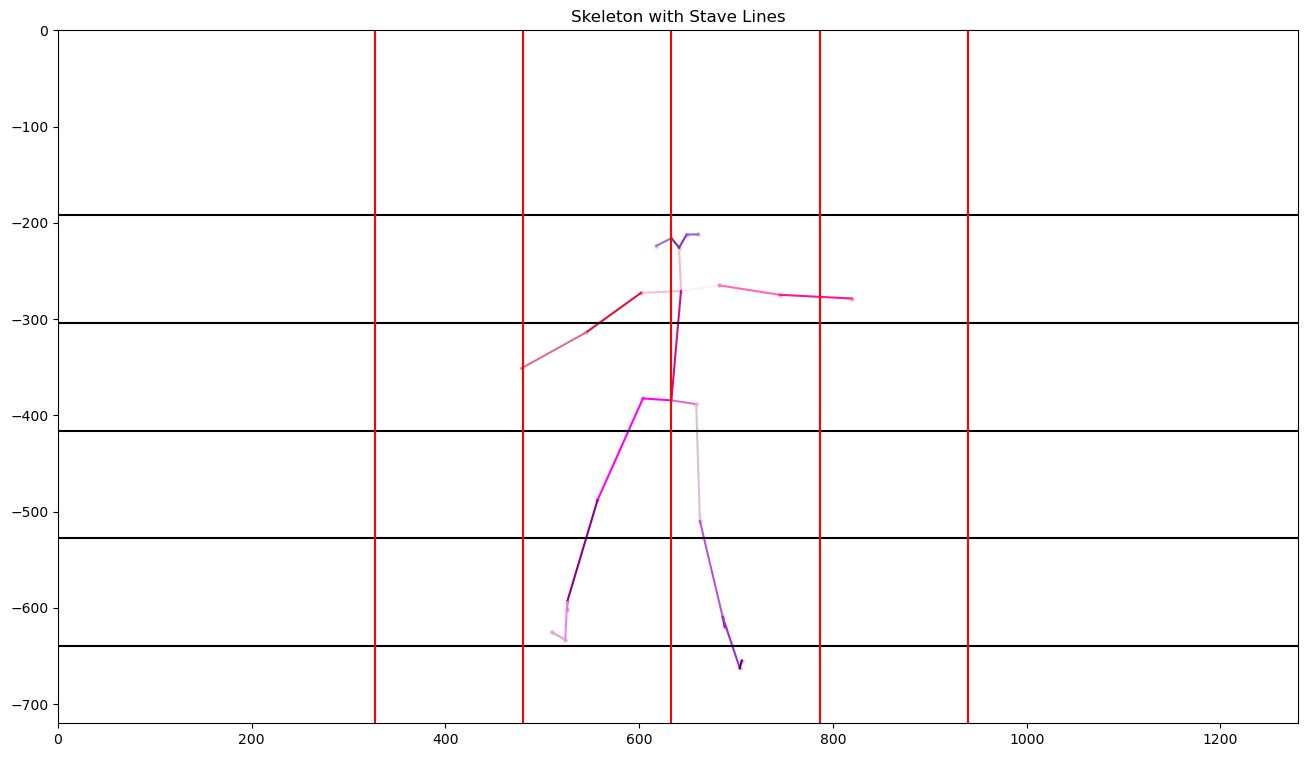

In [5]:
#TEST CODE TO VISUALIZE FRAME WITH STAVE LINES
#Plot a single sample frame with stave_Lines
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
fig, ax = plt.subplots(1, figsize=(16,9))
ax.set_prop_cycle('color',penColor)
plt.title('Skeleton with Stave Lines')
plt.xlim(0, 1280)
plt.ylim(-720, 0)


#ToComment
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000180_keypoints.json"
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000169_keypoints.json" # right
sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000302_keypoints.json" # left
st_lines_arr = establish_stave_lines(sample_json_file_pth)
sag_lines_arr =establishSaggitalLines(sample_json_file_pth)
img_json = pd.read_json(sample_json_file_pth)
keypoints = img_json.people[0]['pose_keypoints_2d']
#print(keypoints)
x = keypoints[0::3]
yorig = keypoints[1::3]
corig = keypoints[2::3]
y = [-y for y in yorig]
sc = ax.scatter(x,y, s=5)
for bone in bones:
    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
        continue
    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]])
plt.axhline(y = -st_lines_arr[0], color = 'black', linestyle = '-')
plt.axhline(y=-st_lines_arr[1], color = 'black', linestyle = '-')
plt.axhline(y = -st_lines_arr[2], color = 'black', linestyle = '-')
plt.axhline(y = -st_lines_arr[3], color = 'black', linestyle = '-')
plt.axhline(y = -st_lines_arr[4], color = 'black', linestyle = '-')

plt.axvline(x = sag_lines_arr[0], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[1], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[2], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[3], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[4], color = 'red', linestyle = '-')
#toComment

In [9]:
# Result for BODY_25
# //     {0,  "Nose"},
# //     {1,  "Neck"},
# //     {2,  "RShoulder"},
# //     {3,  "RElbow"},
# //     {4,  "RWrist"},
# //     {5,  "LShoulder"},
# //     {6,  "LElbow"},
# //     {7,  "LWrist"},
# //     {8,  "MidHip"},
# //     {9,  "RHip"},
# //     {10, "RKnee"},
# //     {11, "RAnkle"},
# //     {12, "LHip"},
# //     {13, "LKnee"},
# //     {14, "LAnkle"},
# //     {15, "REye"},
# //     {16, "LEye"},
# //     {17, "REar"},
# //     {18, "LEar"},
# //     {19, "LBigToe"},
# //     {20, "LSmallToe"},
# //     {21, "LHeel"},
# //     {22, "RBigToe"},
# //     {23, "RSmallToe"},
# //     {24, "RHeel"},
# //     {25, "Background"}
# // };

#Logic/preprocessing to add only for segments we are interested in:
#if we come accross json file with no skeleton detected,
#repeat/duplicate the adjacent previous skeleton,
#if it is the first few frames, retrospectively duplicate the first available skeleton. 

#if we come accross a foot or hand coordinate that is (0,0) - print those out for us and handle them case by case.

In [6]:
#USED HELPER METHODS:

#RHeel:24 RAnkle:11 RBigToe:22 RSmallToe:23
#LHeel:21 LAnkle:14 LBigToe:19 LSmallToe:20
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000169_keypoints.json" #right
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000302_keypoints.json" #left

#Helper method
def calculate_absolute_gradient(x1, y1, x2, y2):
    if(x1 == x2):
        return "undefined"
    gradient = (y2 - y1) / (x2 - x1)
    absolute_gradient = abs(gradient)
    return absolute_gradient

#Helper method # Returns the supporting foot's coordinates in dictionary form: 'LF_RF: 'left'/'right', Heel: [x,y], ...
def determineSupportingFootCoordinates(file_path):
    foot_dict = {}
    #print("determining supporting foot coords...")
    skel_json = pd.read_json(file_path)
    keypoints = skel_json.people[0]['pose_keypoints_2d']
    x = keypoints[0::3]
    y = keypoints[1::3]
    supportingf_lowest_value = 0 # this refers to visually lowest ie, the max in pixel values.
    supportingf_lowest_index = 0
    foot_indices = [11,14,19,20,21,22,23,24]
    for i in foot_indices:
        if y[i] > supportingf_lowest_value:
            supportingf_lowest_value = y[i]
            supportingf_lowest_index = i
            
    #print("supporting foot index: ", supportingf_lowest_index)
    right_or_left = ''
    if supportingf_lowest_index == 22 or supportingf_lowest_index == 23 or supportingf_lowest_index == 11 or supportingf_lowest_index == 24:
        right_or_left = 'right'
        foot_dict['RF_LF'] = right_or_left
        foot_dict['Heel'] = [x[24],y[24]]
        foot_dict['Ankle'] = [x[11],y[11]]
        foot_dict['BigToe'] = [x[22], y[22]]
        foot_dict['SmallToe'] = [x[23], y[23]]
    elif supportingf_lowest_index == 19 or supportingf_lowest_index == 20 or supportingf_lowest_index == 14 or supportingf_lowest_index == 21:
        right_or_left = 'left'
        foot_dict['RF_LF'] = right_or_left
        foot_dict['Heel'] = [x[21],y[21]]
        foot_dict['Ankle'] = [x[14],y[14]]
        foot_dict['BigToe'] = [x[19], y[19]]
        foot_dict['SmallToe'] = [x[20], y[20]]
    #print(foot_dict)
    return foot_dict    
#determineSupportingFootCoordinates("./SkeletonXDataPerClass/0-ExtDerriereOnRight/ALB0000_000000000424_keypoints.json")

#Helper method
def getSingleFootOrientation(HeelX,HeelY,BigToeX,BigToeY):
    feet_gradient = calculate_absolute_gradient(HeelX, HeelY, BigToeX, BigToeY)
    foot_orientation = "Not_Calculated"
    #print("feet_gradient: ",feet_gradient)
    if feet_gradient == 'undefined':
        foot_orientation = "EnPointe"
    elif feet_gradient >= 0 and feet_gradient <= 0.2:
        foot_orientation = "Flat"
    elif feet_gradient > 0.2 and feet_gradient <= 1:
        foot_orientation = "Demi"
    elif feet_gradient > 1:
        foot_orientation = "EnPointe"
    return foot_orientation
    
#Returns "Flat", "Demi" or "EnPointe"
def getSupportingFootOrientation(file_path): # is it flat, demi or en pointe?
    supp_ft_coords = determineSupportingFootCoordinates(file_path)
    if len(supp_ft_coords) == 0:
        print(f"NO SUPPORTING FOOT COORDS DETECTED: {file_path}")
        return "None"
    else:
        #print("determining supporting foot orientation...")
        #calculate the gardient between the Heel and the BigToe
        x1 = supp_ft_coords['Heel'][0]
        y1 = supp_ft_coords['Heel'][1]
        x2 = supp_ft_coords['BigToe'][0]
        y2 = supp_ft_coords['BigToe'][1]
        #print(f"x1: {x1} y1: {y1}, x2: {x2} y2:{y2} ")
        foot_orientation = getSingleFootOrientation(x1, y1, x2, y2) 
        #print("Supporting foot orientation:", foot_orientation)
        return foot_orientation
    
#getSupportingFootOrientation(sample_json_file_pth)                                                                                                  
    

In [7]:
#USED HELPER METHOD
def getBaseVecDictionary():
    #0-12 for staveline vertical position; 13-15 for in-front, level, behind; 16-20 for left, left-mid, mid, right-mid, right
    base_dict = {}
    vector_keywords = ['justbelowfeet','feet','justabovefeet','betweenfeetknees', 'knees', 'betweenkneeswaist',\
                       'waist','betweenwaistshoulders','shoulders', 'betweenshouldershead', 'head', 'abovehead', 'front', \
                       'level','behind','left', 'leftmid', 'mid', 'rightmid', 'right']
    #print(len(vector_keywords))
    i=0
    for kw in vector_keywords:
        base_dict[kw] = i
        i=i+1
    #print(base_dict)
    return base_dict
    #base_dict['bel
getBaseVecDictionary()

{'justbelowfeet': 0,
 'feet': 1,
 'justabovefeet': 2,
 'betweenfeetknees': 3,
 'knees': 4,
 'betweenkneeswaist': 5,
 'waist': 6,
 'betweenwaistshoulders': 7,
 'shoulders': 8,
 'betweenshouldershead': 9,
 'head': 10,
 'abovehead': 11,
 'front': 12,
 'level': 13,
 'behind': 14,
 'left': 15,
 'leftmid': 16,
 'mid': 17,
 'rightmid': 18,
 'right': 19}

In [8]:
#NOT USED - BUT COULD BE HELPFUL
def determineSaggitalPosition(sag_lines,x): # returns the vector position.
    # in openpose frame saggital positions: 4 3 (dancer's right) 2 (midline) 1 0 (dancer's left)
     #[left_line, left_mid_line, midline, right_mid_line, right_line]
    left_left_mid_dist = sag_lines[0] - sag_lines[1]
    midline_left_mid_dist = sag_lines[1] - sag_lines[2]
    midline_right_mid_dist = sag_lines[2] - sag_lines[3]   
    right_right_mid_dist = sag_lines[3] - sag_lines[4]
     
    x_index = 0
    #check where x lies:
    #between dancer's right_line and right_mid_line:
    if x >= sag_lines[4] and x < sag_lines[3]:
        if x == sag_lines[4]:
            x_index = 4
        x_to_right_dist = x - sag_lines[4]
        x_to_right_mid_dist = sag_lines[3] - x
        if x_to_right_dist < x_to_right_mid_dist:
            x_index = 4
        else:
            x_index = 3       
    #between right_mid_line and mid_line:
    if x >= sag_lines[3] and x < sag_lines[2]:
        if x == sag_lines[3]:
            x_index = 3
        x_to_right_mid_dist = x - sag_lines[3]
        x_to_mid_dist = sag_lines[2] - x
        if x_to_right_mid_dist < x_to_mid_dist:
            x_index = 3
        else:
            x_index = 2
            
    #between mid_line and left_mid_line:
    if x >= sag_lines[2] and x < sag_lines[1]:
        if x == sag_lines[2]:
            x_index = 2
        x_to_mid_dist = x - sag_lines[2]
        x_to_left_mid_dist = sag_lines[1] - x
        if x_to_mid_dist < x_to_left_mid_dist:
            x_index = 2
        else:
            x_index = 1
    
    #between left_mid_line and left_line:
    if x >= sag_lines[1] and x <= sag_lines[0]:
        if x == sag_lines[1]:
            x_index = 1
        if x == sag_lines[0]:
            x_index = 0
        x_to_left_mid_dist = x - sag_lines[1]
        x_to_left_dist = sag_lines[0] - x
        if x_to_left_mid_dist < x_to_left_dist:
            x_index = 1
        else:
            x_index = 0
    vec_dict = getBaseVecDictionary() 
    #print(x_index)
    return x_index + vec_dict['left'] # to get the index in the benesh vector where the saggital positions start.

#for Testing the above:
#determineSaggitalPosition([800.570239886486, 647.421119943243, 494.272, 341.12288005675697, 187.97376011351395],800.570239886486)

In [9]:
#USED HELPER METHOD
def determinePointVerticalPosition(ycoord, stavelines, vec_dict):
    #stave lines are in format: [toph_line, feet_line, waist_line, shoulder_line, knees_line]
    benesh_vec_pos = 0
    if ycoord < stavelines[0]: # fixed - had it incorrectly as >
        benesh_vec_pos = vec_dict['abovehead']
    #distances between stavelines are the same - determine for only one:
    betw_stvl_dist = stavelines[3] - stavelines[0]
    #print(betw_stvl_dist)
    padding_value = betw_stvl_dist/8
    feetline = stavelines[1]
    kneesline = stavelines[4]
    waistline = stavelines[2]
    shoulderline = stavelines[3]
    headline = stavelines[0]
    
    #[larger val(lower), smaller val(higher)]
    feetLine_range = [feetline + padding_value, feetline - padding_value]
    feet_knees_range = [feetline - padding_value, kneesline + padding_value]
    kneesLine_range = [kneesline + padding_value, kneesline - padding_value]
    knees_waist_range = [kneesline - padding_value, waistline + padding_value]
    waistLine_range = [waistline + padding_value, waistline - padding_value]
    waist_shoulder_range = [waistline - padding_value, shoulderline + padding_value]
    shoulderLine_range = [shoulderline + padding_value, shoulderline - padding_value]
    shoulder_head_range = [shoulderline - padding_value, headline +padding_value]
    headLine_range = [headline + padding_value, headline - padding_value]
    
    if ycoord <= feetLine_range[0] and ycoord >= feetLine_range[1]:
        benesh_vec_pos = vec_dict['feet']
    if ycoord < feet_knees_range[0] and ycoord > feet_knees_range[1]:
        benesh_vec_pos = vec_dict['betweenfeetknees']
    if ycoord <= kneesLine_range[0] and ycoord >= kneesLine_range[1]:
        benesh_vec_pos = vec_dict['knees']
    if ycoord < knees_waist_range[0] and ycoord > knees_waist_range[1]:
        benesh_vec_pos = vec_dict['betweenkneeswaist']
    if ycoord <= waistLine_range[0] and ycoord >= waistLine_range[1]:
        benesh_vec_pos = vec_dict['waist']
    if ycoord < waist_shoulder_range[0] and ycoord > waist_shoulder_range[1]:
        benesh_vec_pos = vec_dict['betweenwaistshoulders']
    if ycoord <= shoulderLine_range[0] and ycoord >= shoulderLine_range[1]:
        benesh_vec_pos = vec_dict['shoulders']
    if ycoord < shoulder_head_range[0] and ycoord > shoulder_head_range[1]:
        benesh_vec_pos = vec_dict['betweenshouldershead']
    if ycoord >= headLine_range[0] and ycoord <= headLine_range[1]:
        benesh_vec_pos = vec_dict['head']
    #print(benesh_vec_pos)
    return benesh_vec_pos
#vec_dict = getBaseVecDictionary()
#determinePointVerticalPosition(586.301,[154.88749264020163, 614.4636544356798, 384.67557353794075, 269.78153308907116, 499.5696139868103],vec_dict)

In [10]:
# CLASS 0 Main method:
def createExtDerriereRightBeneshVector(json_file_path):
    #print("Creating benesh vector for ExtDerriereRight...")
    #Get the skeleton vector
    skel_json = pd.read_json(json_file_path)
    keypoints = skel_json.people[0]['pose_keypoints_2d']
    x = keypoints[0::3]
    y = keypoints[1::3]
    
    #get the stave lines for this file [toph_line, feet_line, waist_line, shoulder_line, knees_line]
    st_lines_arr = establish_stave_lines(json_file_path)
    sag_lines = establishSaggitalLines(json_file_path) 
    #sag_lines = [left_line, left_mid_line, midline, right_mid_line, right_line] #represents the dancer's left and right (not audience)
    vec_dict = getBaseVecDictionary()
    #print("vec_dict:", vec_dict)
    
    #right foot: 
    rf_vec = [0 for element in range(len(vec_dict))]
    #Supporting foot is right, so we need to determine its orientation:
    supp_ft_orientation = getSupportingFootOrientation(json_file_path)
    rf_vertical_index = 0
    if supp_ft_orientation == 'EnPointe':
        rf_vertical_index = vec_dict['justabovefeet']
    elif supp_ft_orientation == 'Demi':
        rf_vertical_index = vec_dict['feet']
    elif supp_ft_orientation == 'Flat':
        rf_vertical_index = vec_dict['justbelowfeet']    
    rf_coronal_index = vec_dict['level'] # Always level for supporting foot
    #using the rheel coordinate to determine where the foot is saggitally
    rf_saggital_index = vec_dict['mid'] #wll always be midline
    rf_vec[rf_vertical_index] = 1
    rf_vec[rf_coronal_index] = 1
    rf_vec[rf_saggital_index] = 1
    #print("rf_vec:", rf_vec)
    
    #left foot:
    lf_vec = [0 for elem in range(len(vec_dict))]
    #using the left heel to determine its vertical position: index 21
    lf_vertical_index = determinePointVerticalPosition(y[21], st_lines_arr, vec_dict)
    lf_coronal_index = vec_dict['behind'] # For extension derriere it will always be behind
    lf_saggital_index = vec_dict['mid'] # will always be midline
    lf_vec[lf_vertical_index] = 1
    lf_vec[lf_coronal_index] = 1
    lf_vec[lf_saggital_index] = 1
    #print("lf_vec: ",lf_vec)
    
    #right hand:
    #get the left hand's vertical index for later:
    lh_vertical_index = determinePointVerticalPosition(y[7], st_lines_arr, vec_dict)                              
    rh_vec = [0 for elem in range(len(vec_dict))]
    rh_vertical_index = determinePointVerticalPosition(y[4], st_lines_arr, vec_dict)
    #default:
    rh_coronal_index = vec_dict['front']
    rh_saggital_index = vec_dict['mid'] # for usual arabesque                            
    # if vertical index is above head: coronal index = front, saggital index = midline
    if rh_vertical_index == vec_dict['abovehead']:
        rh_coronal_index = vec_dict['front']
        rh_saggital_index = vec_dict['mid']
    else:
        # otherwise check if its a fourth position - check where the left hand is vertically, if its above head
        #coronal index is level, saggital 'rightmid' (could also run the determineSaggitalPosition(sag_lines,x))
        if lh_vertical_index == vec_dict['abovehead']:
            rh_coronal_index = vec_dict['level']
            rh_saggital_index = vec_dict['rightmid']
    rh_vec[rh_vertical_index] = 1
    rh_vec[rh_coronal_index] = 1
    rh_vec[rh_saggital_index] = 1 
    #print("rh_vec: ",rh_vec)
    
    #left hand:     
    lh_vec = [0 for elem in range(len(vec_dict))]
    #vertical index already determined above
    # default:
    lh_coronal_index = vec_dict['behind']
    lh_saggital_index = vec_dict['mid']
    # have to determine on which side of the body it is:
    # If abovehead - it is in front, 
    #if x equal to midline - level, if x "less than"/audiene left of midline - front, if x "greater than" midline - behind
    if lh_vertical_index == vec_dict['abovehead']:
        lh_coronal_index = vec_dict['front']
        lh_saggital_index = vec_dict['mid']
    if x[7] < sag_lines[2]:
        lh_coronal_index = vec_dict['front']
        lh_saggital_index = vec_dict['mid']
    if x[7] == sag_lines[2]: # if equal, we make it level and to the side of the body
        lh_coronal_index = vec_dict['level']
        lh_saggital_index = vec_dict['leftmid']
    if x[7] > sag_lines[2]:
        lh_coronal_index = vec_dict['behind']
        lh_saggital_index = vec_dict['mid']
    lh_vec[lh_vertical_index] = 1
    lh_vec[lh_coronal_index] = 1
    lh_vec[lh_saggital_index] = 1
    #print("lh_vec: ",lh_vec)
    
    turn_bit = [0]
    
    final_vec = rf_vec + lf_vec + rh_vec +lh_vec + turn_bit
    #print(final_vec)
    #print(len(final_vec))
    #Save the final_vec to json:
    #print("json_file_path: ", json_file_path)
    base_save_file_ls = json_file_path.split("/")
    skeleton_name = base_save_file_ls[-1]
    benesh_name = skeleton_name.replace('keypoints','benesh')
    #print("benesh_name: ",benesh_name)
    save_benesh_path = "./BeneshYDataPerClass/0-ExtDerriereOnRight/"+benesh_name
    #print(save_benesh_path)
    with open(save_benesh_path, 'w') as f:
        json.dump(final_vec, f)
    return final_vec

#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000169_keypoints.json"
#createExtDerriereRightBeneshVector(sample_json_file_pth)


In [13]:
#CLASS 1 main method:

def createExtDerriereLeftBeneshVector(json_file_path):
    #print("creating benesh vector for ExtDerriereLeft")
    #Get the skeleton vector
    skel_json = pd.read_json(json_file_path)
    keypoints = skel_json.people[0]['pose_keypoints_2d']
    x = keypoints[0::3]
    y = keypoints[1::3]
    
    #get the stave lines for this file [toph_line, feet_line, waist_line, shoulder_line, knees_line]
    st_lines_arr = establish_stave_lines(json_file_path)
    #sag_lines = [left_line, left_mid_line, midline, right_mid_line, right_line] #represents the dancer's left and right (not audience)
    sag_lines = establishSaggitalLines(json_file_path) 
    vec_dict = getBaseVecDictionary()
    #print(f"vec_dict: {vec_dict}, length: {len(vec_dict)}")
    
    #right foot:
    rf_vec = [0 for element in range(len(vec_dict))]
    #use the right heel to determine its vertical position: index 24
    rf_vertical_index = determinePointVerticalPosition(y[24], st_lines_arr, vec_dict)
    rf_coronal_index = vec_dict['behind'] # For extension derriere it will always be behind
    rf_saggital_index = vec_dict['mid'] # will always be midline
    rf_vec[rf_vertical_index] = 1
    rf_vec[rf_coronal_index] = 1
    rf_vec[rf_saggital_index] = 1
    #print(f"rf_vec: {rf_vec}")
    
    #left foot:
    lf_vec = [0 for element in range(len(vec_dict))]
    #Supporting foot is left, so we need to determine its orientation:
    supp_ft_orientation = getSupportingFootOrientation(json_file_path)
    lf_vertical_index = 0
    if supp_ft_orientation == 'EnPointe':
        lf_vertical_index = vec_dict['justabovefeet']
    elif supp_ft_orientation == 'Demi':
        lf_vertical_index = vec_dict['feet']
    elif supp_ft_orientation == 'Flat':
        lf_vertical_index = vec_dict['justbelowfeet']
    lf_coronal_index = vec_dict['level'] #Always level for supporting foot
    lf_saggital_index = vec_dict['mid'] #Always middle for ext derriere supporting foot
    lf_vec[lf_vertical_index] = 1
    lf_vec[lf_coronal_index] = 1
    lf_vec[lf_saggital_index] = 1
    #print(f"lf_vec: {lf_vec}")
    
    #left hand: # do left hand first for left side.
    #get the right hand's vertical index- needs to be taken into consideration:
    rh_vertical_index = determinePointVerticalPosition(y[4],st_lines_arr,vec_dict)
    lh_vec = [0 for element in range(len(vec_dict))]
    lh_vertical_index = determinePointVerticalPosition(y[7],st_lines_arr,vec_dict)
    #default 'arabesque' values for left hand on left:
    lh_coronal_index = vec_dict['front']
    lh_saggital_index = vec_dict['mid']
    # if vertical index is above head: coronal index = front, saggital index = midline
    if lh_vertical_index == vec_dict['abovehead']:
        lh_coronal_index = vec_dict['front']
        lh_saggital_index = vec_dict['mid']
    else:
        #otherwise check if it's a fourth position with the right hand above head and left hand in second position:
        if rh_vertical_index == vec_dict['abovehead']:
            lh_coronal_index = vec_dict['level']
            lh_saggital_index = vec_dict['leftmid']
    lh_vec[lh_vertical_index] = 1
    lh_vec[lh_coronal_index] = 1
    lh_vec[lh_saggital_index] = 1
    #print(f"lh_vec: {lh_vec}")
    
    #right hand:
    rh_vec = [0 for element in range(len(vec_dict))]
    #vertical index already determined above
    #default 'arabesque' value for right hand on left
    rh_coronal_index = vec_dict['behind']
    rh_saggital_index = vec_dict['mid']
    # have to determine on which side of the body it is:
    # If abovehead - it is in front, mid 
    #if x equal to midline - level, if x "less than"/audience left of midline - behind, if x "greater than" midline - front
    if rh_vertical_index == vec_dict['abovehead']:
        rh_coronal_index = vec_dict['front']
        rh_saggital_index = ['mid']
    if x[4] < sag_lines[2]:
        rh_coronal_index = vec_dict['behind']
        rh_saggital_index = vec_dict['mid']
    if x[4] == sag_lines[2]:
        rh_coronal_index = vec_dict['level']
        rh_saggital_index = vec_dict['rightmid']
    if x[4] > sag_lines[2]:
        rh_coronal_index = vec_dict['front']
        rh_saggital_index = vec_dict['mid']
    rh_vec[rh_vertical_index] = 1
    rh_vec[rh_coronal_index] = 1
    rh_vec[rh_saggital_index] = 1
    #print(f"rh_vec: {rh_vec}")
    
    turn_bit = [0]
    
    final_vec = rf_vec + lf_vec + rh_vec +lh_vec + turn_bit
    #print(final_vec)
    #print(len(final_vec))
    
    #Save the final_vec to json:
    base_save_file_ls = json_file_path.split("/")
    skeleton_name = base_save_file_ls[-1]
    benesh_name = skeleton_name.replace('keypoints','benesh')
    save_benesh_path = "./BeneshYDataPerClass/1-ExtDerriereOnLeft/"+benesh_name
    with open(save_benesh_path, 'w') as f:
        json.dump(final_vec, f)
    return final_vec

# sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000302_keypoints.json" #left
# createExtDerriereLeftBeneshVector(sample_json_file_pth)

In [32]:
#Useful for saving readable versions of vectors
def BeneshVecToText(benesh_vec):
    vec_dict = getBaseVecDictionary()
    rev_vec_dict = {y: x for x, y in vec_dict.items()}
    print(rev_vec_dict)
    rf_vec = benesh_vec[0:20] #excludes the end index
    lf_vec = benesh_vec[20:40]
    rh_vec = benesh_vec[40:60]
    lh_vec = benesh_vec[60:80]
    print(lh_vec)
    print(len(lf_vec))
    rf_text = []
    lf_text = []
    rh_text = []
    lh_text = []

    #84 indices in length {[0 - 20] = right foot} {[21 - 41] = left foot} {[42-62] = right hand} {[63-83] = left hand}
    for i in range(len(rf_vec)): #vectors are the same length
        if rf_vec[i] == 1:
            print("rf",rev_vec_dict[i])
            rf_text.append(rev_vec_dict[i])
            
    for i in range(len(lf_vec)):
        if lf_vec[i] == 1:
            print("lf",rev_vec_dict[i])
            lf_text.append(rev_vec_dict[i])
    
    for i in range(len(rh_vec)): #vectors are the same length
        if rh_vec[i] == 1:
            print("rh",rev_vec_dict[i])
            rh_text.append(rev_vec_dict[i])
        
    for i in range(len(lh_vec)): #vectors are the same length
        if lh_vec[i] == 1:
            print("lh",rev_vec_dict[i])
            lh_text.append(rev_vec_dict[i])
    
    print(f"Right Foot: <Vertical: {rf_text[0]}> <Coronal: {rf_text[1]}> <Saggital: {rf_text[2]}>")
    print(f"Left Foot: <Vertical: {lf_text[0]}> <Coronal: {lf_text[1]}> <Saggital: {lf_text[2]}>")
    print(f"Right Hand: <Vertical: {rh_text[0]}> <Coronal: {rh_text[1]}> <Saggital: {rh_text[2]}>")
    print(f"Left Hand: <Vertical: {lh_text[0]}> <Coronal: {lh_text[1]}> <Saggital: {lh_text[2]}>")
    print(f"Turn Bit: {benesh_vec[80]}")
        
# sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000169_keypoints.json" #Right
# bv = createExtDerriereRightBeneshVector(sample_json_file_pth)  

# sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/GIS0004/GIS0004_000000000302_keypoints.json" #Left
# bv = createExtDerriereLeftBeneshVector(sample_json_file_pth)  
# BeneshVecToText(bv)
    

81
{0: 'justbelowfeet', 1: 'feet', 2: 'justabovefeet', 3: 'betweenfeetknees', 4: 'knees', 5: 'betweenkneeswaist', 6: 'waist', 7: 'betweenwaistshoulders', 8: 'shoulders', 9: 'betweenshouldershead', 10: 'head', 11: 'abovehead', 12: 'front', 13: 'level', 14: 'behind', 15: 'left', 16: 'leftmid', 17: 'mid', 18: 'rightmid', 19: 'right'}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
20
rf betweenfeetknees
rf behind
rf mid
lf justabovefeet
lf level
lf mid
rh betweenwaistshoulders
rh behind
rh mid
lh betweenshouldershead
lh front
lh mid
Right Foot: <Vertical: betweenfeetknees> <Coronal: behind> <Saggital: mid>
Left Foot: <Vertical: justabovefeet> <Coronal: level> <Saggital: mid>
Right Hand: <Vertical: betweenwaistshoulders> <Coronal: behind> <Saggital: mid>
Left Hand: <Vertical: betweenshouldershead> <Coronal: front> <Saggital: mid>
Turn Bit: 0


In [12]:
#Loop through all the ex_derriere on right (class 0) json files and create and save benesh vectors for them
import os
keypoints_folder = "./SkeletonXDataUnnormalised/0-ExtDerriereOnRight"

def getTotalFiles():
    total = 0
    for file in os.listdir(keypoints_folder):
        total+=1
    print(total)
    return total

def MakeBeneshForClass0(kpf):
    total_num_files = getTotalFiles()
    counter = 0
    for jsonFile in os.listdir(kpf):
        json_path = keypoints_folder+"/"+jsonFile
        print(json_path)
        createExtDerriereRightBeneshVector(json_path)
        counter+=1
        print(f"{counter}/{total_num_files} DONE")
    
MakeBeneshForClass0(keypoints_folder)

23695
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0000_000000000214_keypoints.json
1/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0000_000000000215_keypoints.json
2/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0000_000000000216_keypoints.json
3/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0000_000000000217_keypoints.json
4/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0000_000000000218_keypoints.json
5/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0000_000000000219_keypoints.json
6/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0000_000000000220_keypoints.json
7/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0000_000000000221_keypoints.json
8/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0001_000000000268_keypoints.json
9/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0001_000000000269_keypoints.json
10/23695 DONE
./SkeletonXDa

89/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0011_000000000264_keypoints.json
90/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0011_000000000269_keypoints.json
91/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0011_000000000270_keypoints.json
92/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0014_000000000483_keypoints.json
93/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0014_000000000484_keypoints.json
94/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0014_000000000485_keypoints.json
95/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0014_000000000486_keypoints.json
96/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0014_000000000487_keypoints.json
97/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0014_000000000488_keypoints.json
98/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ALB0014_000000000489_keypoints.json
99/23695 D

172/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0000_000000000041_keypoints.json
173/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0000_000000000731_keypoints.json
174/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0000_000000001756_keypoints.json
175/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0000_000000001757_keypoints.json
176/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0000_000000001758_keypoints.json
177/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0000_000000001759_keypoints.json
178/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0000_000000001760_keypoints.json
179/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0000_000000002753_keypoints.json
180/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0000_000000002758_keypoints.json
181/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0000_000000002761_keypoints.json


254/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0001_000000002049_keypoints.json
255/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0001_000000002050_keypoints.json
256/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0001_000000002051_keypoints.json
257/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0001_000000002052_keypoints.json
258/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0001_000000003133_keypoints.json
259/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0001_000000003134_keypoints.json
260/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0001_000000003135_keypoints.json
261/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0001_000000003136_keypoints.json
262/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0001_000000003137_keypoints.json
263/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0001_000000003138_keypoints.json


337/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0002_000000003398_keypoints.json
338/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0002_000000003401_keypoints.json
339/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0002_000000003402_keypoints.json
340/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0002_000000003403_keypoints.json
341/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0003_000000000030_keypoints.json
342/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0003_000000000031_keypoints.json
343/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0003_000000000032_keypoints.json
344/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0003_000000000033_keypoints.json
345/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0003_000000000034_keypoints.json
346/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0003_000000000035_keypoints.json


420/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0005_000000000031_keypoints.json
421/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0005_000000000032_keypoints.json
422/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0005_000000000033_keypoints.json
423/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0005_000000000036_keypoints.json
424/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0005_000000000037_keypoints.json
425/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0005_000000000038_keypoints.json
426/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0005_000000000039_keypoints.json
427/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0005_000000000040_keypoints.json
428/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0005_000000000261_keypoints.json
429/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0005_000000000262_keypoints.json


505/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0006_000000000744_keypoints.json
506/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0006_000000000745_keypoints.json
507/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0006_000000000746_keypoints.json
508/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0006_000000000748_keypoints.json
509/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0006_000000000749_keypoints.json
510/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0006_000000000750_keypoints.json
511/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0006_000000000751_keypoints.json
512/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0006_000000000752_keypoints.json
513/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0006_000000000753_keypoints.json
514/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0006_000000001612_keypoints.json


593/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0008_000000000808_keypoints.json
594/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0008_000000000809_keypoints.json
595/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0008_000000000810_keypoints.json
596/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0008_000000000811_keypoints.json
597/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0008_000000000814_keypoints.json
598/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0017_000000000020_keypoints.json
599/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0017_000000000021_keypoints.json
600/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0017_000000000365_keypoints.json
601/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0017_000000000366_keypoints.json
602/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0017_000000000367_keypoints.json


678/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0018_000000003091_keypoints.json
679/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0018_000000003092_keypoints.json
680/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0018_000000003093_keypoints.json
681/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0018_000000003094_keypoints.json
682/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0018_000000003095_keypoints.json
683/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0018_000000003096_keypoints.json
684/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0018_000000003097_keypoints.json
685/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0018_000000003099_keypoints.json
686/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0019_000000000035_keypoints.json
687/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0019_000000000036_keypoints.json


765/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0027_000000000624_keypoints.json
766/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0027_000000000625_keypoints.json
767/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0027_000000000626_keypoints.json
768/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0027_000000000627_keypoints.json
769/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0027_000000000628_keypoints.json
770/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0027_000000000629_keypoints.json
771/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0027_000000000630_keypoints.json
772/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0027_000000000631_keypoints.json
773/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0027_000000000632_keypoints.json
774/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0027_000000000633_keypoints.json


852/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0028_000000000365_keypoints.json
853/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0028_000000000366_keypoints.json
854/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0028_000000000367_keypoints.json
855/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0028_000000000368_keypoints.json
856/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0028_000000000369_keypoints.json
857/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0028_000000000370_keypoints.json
858/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0028_000000000371_keypoints.json
859/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0028_000000000373_keypoints.json
860/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0028_000000000375_keypoints.json
861/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0028_000000000376_keypoints.json


937/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0029_000000003142_keypoints.json
938/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0029_000000003143_keypoints.json
939/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0029_000000003144_keypoints.json
940/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0029_000000003145_keypoints.json
941/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0030_000000000022_keypoints.json
942/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0030_000000000027_keypoints.json
943/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0030_000000000029_keypoints.json
944/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0030_000000000039_keypoints.json
945/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0030_000000000040_keypoints.json
946/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0030_000000000041_keypoints.json


1023/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0030_000000003216_keypoints.json
1024/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0033_000000000032_keypoints.json
1025/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0033_000000000033_keypoints.json
1026/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0033_000000000034_keypoints.json
1027/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0033_000000000035_keypoints.json
1028/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0033_000000000036_keypoints.json
1029/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0033_000000000037_keypoints.json
1030/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0033_000000000038_keypoints.json
1031/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0033_000000000039_keypoints.json
1032/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0033_000000000040_keypo

1107/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0035_000000000736_keypoints.json
1108/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0035_000000000737_keypoints.json
1109/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0035_000000000738_keypoints.json
1110/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0035_000000000739_keypoints.json
1111/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0035_000000000740_keypoints.json
1112/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0035_000000000741_keypoints.json
1113/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0035_000000000742_keypoints.json
1114/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0035_000000000743_keypoints.json
1115/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0035_000000000744_keypoints.json
1116/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0035_000000000745_keypo

1194/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0039_000000000047_keypoints.json
1195/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0039_000000000048_keypoints.json
1196/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0039_000000000049_keypoints.json
1197/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0039_000000000050_keypoints.json
1198/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0039_000000000051_keypoints.json
1199/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0039_000000000283_keypoints.json
1200/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0039_000000000284_keypoints.json
1201/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0039_000000000285_keypoints.json
1202/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0039_000000000286_keypoints.json
1203/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0039_000000000287_keypo

1277/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0040_000000000618_keypoints.json
1278/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0040_000000000619_keypoints.json
1279/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0040_000000000620_keypoints.json
1280/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0040_000000000621_keypoints.json
1281/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0040_000000000622_keypoints.json
1282/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0040_000000000623_keypoints.json
1283/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0040_000000000624_keypoints.json
1284/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0040_000000000625_keypoints.json
1285/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0040_000000000627_keypoints.json
1286/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0040_000000000628_keypo

1364/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0042_000000000692_keypoints.json
1365/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0042_000000000693_keypoints.json
1366/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0042_000000000694_keypoints.json
1367/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0042_000000000736_keypoints.json
1368/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0042_000000000737_keypoints.json
1369/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0042_000000000738_keypoints.json
1370/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0042_000000000739_keypoints.json
1371/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0042_000000000741_keypoints.json
1372/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0042_000000000742_keypoints.json
1373/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/AUR0042_000000000743_keypo

1449/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BAS0021_000000001155_keypoints.json
1450/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BAS0021_000000001156_keypoints.json
1451/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BAS0021_000000001157_keypoints.json
1452/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BAS0021_000000001159_keypoints.json
1453/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BAS0026_000000000779_keypoints.json
1454/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BAS0026_000000000780_keypoints.json
1455/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BAS0026_000000000781_keypoints.json
1456/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BAS0026_000000000782_keypoints.json
1457/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BAS0026_000000000783_keypoints.json
1458/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BAS0026_000000000784_keypo

1531/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0003_000000000141_keypoints.json
1532/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0003_000000000142_keypoints.json
1533/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0003_000000000143_keypoints.json
1534/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0003_000000000144_keypoints.json
1535/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0003_000000000145_keypoints.json
1536/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0003_000000000146_keypoints.json
1537/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0003_000000001320_keypoints.json
1538/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0003_000000001321_keypoints.json
1539/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0003_000000001322_keypoints.json
1540/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0003_000000001323_keypo

1617/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0010_000000000447_keypoints.json
1618/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0010_000000000448_keypoints.json
1619/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0010_000000000449_keypoints.json
1620/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0010_000000000452_keypoints.json
1621/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0010_000000000453_keypoints.json
1622/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0010_000000001333_keypoints.json
1623/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0010_000000001343_keypoints.json
1624/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0012_000000000161_keypoints.json
1625/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0012_000000000162_keypoints.json
1626/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0012_000000000163_keypo

1703/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0018_000000000412_keypoints.json
1704/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0018_000000000413_keypoints.json
1705/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0018_000000000414_keypoints.json
1706/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0018_000000000415_keypoints.json
1707/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0018_000000000416_keypoints.json
1708/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0018_000000000417_keypoints.json
1709/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0018_000000001332_keypoints.json
1710/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0018_000000001334_keypoints.json
1711/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0018_000000001335_keypoints.json
1712/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0018_000000001336_keypo

1791/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0026_000000001246_keypoints.json
1792/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0026_000000001247_keypoints.json
1793/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0026_000000001252_keypoints.json
1794/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0026_000000001253_keypoints.json
1795/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0026_000000001255_keypoints.json
1796/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0026_000000001257_keypoints.json
1797/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0026_000000001258_keypoints.json
1798/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0026_000000001259_keypoints.json
1799/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0027_000000000160_keypoints.json
1800/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BLU0027_000000000161_keypo

1875/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/BRO0026_000000001109_keypoints.json
1876/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0000_000000000377_keypoints.json
1877/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0000_000000000378_keypoints.json
1878/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0000_000000000379_keypoints.json
1879/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0000_000000000380_keypoints.json
1880/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0000_000000000381_keypoints.json
1881/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0000_000000000382_keypoints.json
1882/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0000_000000000383_keypoints.json
1883/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0000_000000000384_keypoints.json
1884/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0000_000000000385_keypo

1957/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0003_000000000407_keypoints.json
1958/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0003_000000000408_keypoints.json
1959/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0003_000000000409_keypoints.json
1960/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0003_000000000410_keypoints.json
1961/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0003_000000000411_keypoints.json
1962/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0003_000000000412_keypoints.json
1963/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0003_000000000413_keypoints.json
1964/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0003_000000000415_keypoints.json
1965/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0003_000000000463_keypoints.json
1966/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0003_000000000464_keypo

2040/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0005_000000000945_keypoints.json
2041/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0005_000000000946_keypoints.json
2042/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0005_000000000947_keypoints.json
2043/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0005_000000000948_keypoints.json
2044/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0005_000000001398_keypoints.json
2045/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0005_000000001399_keypoints.json
2046/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0005_000000001400_keypoints.json
2047/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0005_000000001401_keypoints.json
2048/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0005_000000001402_keypoints.json
2049/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0005_000000001403_keypo

2122/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0006_000000001404_keypoints.json
2123/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0006_000000001405_keypoints.json
2124/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0006_000000001406_keypoints.json
2125/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0006_000000001830_keypoints.json
2126/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0006_000000001831_keypoints.json
2127/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0006_000000001832_keypoints.json
2128/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0006_000000001833_keypoints.json
2129/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0006_000000001834_keypoints.json
2130/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0006_000000001835_keypoints.json
2131/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0006_000000001836_keypo

2204/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0010_000000000936_keypoints.json
2205/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0010_000000000937_keypoints.json
2206/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0010_000000000938_keypoints.json
2207/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0010_000000000939_keypoints.json
2208/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0010_000000000940_keypoints.json
2209/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0010_000000000941_keypoints.json
2210/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0010_000000000942_keypoints.json
2211/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0010_000000000943_keypoints.json
2212/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0010_000000000944_keypoints.json
2213/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0010_000000000945_keypo

2288/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0012_000000000982_keypoints.json
2289/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0012_000000000983_keypoints.json
2290/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0012_000000000984_keypoints.json
2291/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0012_000000000985_keypoints.json
2292/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0012_000000000986_keypoints.json
2293/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0012_000000000987_keypoints.json
2294/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0012_000000000988_keypoints.json
2295/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0012_000000000989_keypoints.json
2296/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0012_000000000990_keypoints.json
2297/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0012_000000000991_keypo

2371/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0014_000000000983_keypoints.json
2372/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0014_000000000986_keypoints.json
2373/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0014_000000000987_keypoints.json
2374/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0014_000000000988_keypoints.json
2375/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0014_000000000989_keypoints.json
2376/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0014_000000000990_keypoints.json
2377/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0014_000000000991_keypoints.json
2378/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0014_000000000992_keypoints.json
2379/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0014_000000001466_keypoints.json
2380/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0014_000000001467_keypo

2453/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0017_000000000334_keypoints.json
2454/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0017_000000000335_keypoints.json
2455/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0017_000000000336_keypoints.json
2456/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0017_000000000337_keypoints.json
2457/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0017_000000000338_keypoints.json
2458/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0017_000000000387_keypoints.json
2459/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0017_000000000388_keypoints.json
2460/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0017_000000000389_keypoints.json
2461/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0017_000000000390_keypoints.json
2462/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0017_000000000391_keypo

2540/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0018_000000000933_keypoints.json
2541/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0018_000000000934_keypoints.json
2542/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0018_000000000935_keypoints.json
2543/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0018_000000000936_keypoints.json
2544/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0018_000000000937_keypoints.json
2545/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0018_000000000998_keypoints.json
2546/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0018_000000000999_keypoints.json
2547/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0018_000000001000_keypoints.json
2548/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0018_000000001001_keypoints.json
2549/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0018_000000001002_keypo

2627/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0021_000000000405_keypoints.json
2628/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0021_000000000406_keypoints.json
2629/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0021_000000000407_keypoints.json
2630/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0021_000000000410_keypoints.json
2631/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0021_000000000465_keypoints.json
2632/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0021_000000000466_keypoints.json
2633/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0021_000000000467_keypoints.json
2634/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0021_000000000468_keypoints.json
2635/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0021_000000000469_keypoints.json
2636/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CAL0021_000000000470_keypo

2710/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0004_000000001096_keypoints.json
2711/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0004_000000001097_keypoints.json
2712/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0004_000000001098_keypoints.json
2713/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0004_000000001099_keypoints.json
2714/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0004_000000001100_keypoints.json
2715/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0004_000000001101_keypoints.json
2716/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0004_000000001102_keypoints.json
2717/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0004_000000001161_keypoints.json
2718/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0004_000000001162_keypoints.json
2719/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0004_000000001163_keypo

2793/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0007_000000000829_keypoints.json
2794/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0007_000000000830_keypoints.json
2795/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0007_000000000831_keypoints.json
2796/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0007_000000000832_keypoints.json
2797/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0007_000000000833_keypoints.json
2798/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0007_000000000834_keypoints.json
2799/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0007_000000000835_keypoints.json
2800/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0007_000000000838_keypoints.json
2801/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0007_000000000840_keypoints.json
2802/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0007_000000001088_keypo

2878/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0011_000000001090_keypoints.json
2879/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0011_000000001091_keypoints.json
2880/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0011_000000001092_keypoints.json
2881/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0011_000000001093_keypoints.json
2882/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0011_000000001148_keypoints.json
2883/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0011_000000001149_keypoints.json
2884/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0011_000000001150_keypoints.json
2885/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0011_000000001151_keypoints.json
2886/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0011_000000001152_keypoints.json
2887/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0011_000000001153_keypo

2966/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0015_000000001170_keypoints.json
2967/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0015_000000001172_keypoints.json
2968/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0015_000000001173_keypoints.json
2969/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0016_000000000350_keypoints.json
2970/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0016_000000000351_keypoints.json
2971/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0016_000000000352_keypoints.json
2972/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0016_000000000353_keypoints.json
2973/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0016_000000000354_keypoints.json
2974/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0016_000000000355_keypoints.json
2975/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0016_000000000356_keypo

3051/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0019_000000000814_keypoints.json
3052/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0019_000000001121_keypoints.json
3053/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0019_000000001122_keypoints.json
3054/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0019_000000001123_keypoints.json
3055/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0019_000000001124_keypoints.json
3056/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0019_000000001125_keypoints.json
3057/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0019_000000001126_keypoints.json
3058/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0020_000000001066_keypoints.json
3059/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0020_000000001068_keypoints.json
3060/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/COL0020_000000001069_keypo

3135/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0002_000000000143_keypoints.json
3136/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0002_000000000144_keypoints.json
3137/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0002_000000000145_keypoints.json
3138/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0002_000000000146_keypoints.json
3139/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0002_000000000147_keypoints.json
3140/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0002_000000000148_keypoints.json
3141/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0002_000000000149_keypoints.json
3142/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0002_000000000237_keypoints.json
3143/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0002_000000000238_keypoints.json
3144/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0002_000000000239_keypo

3219/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0007_000000000187_keypoints.json
3220/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0007_000000000188_keypoints.json
3221/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0007_000000000189_keypoints.json
3222/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0007_000000000190_keypoints.json
3223/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0007_000000000192_keypoints.json
3224/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0007_000000000193_keypoints.json
3225/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0007_000000000292_keypoints.json
3226/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0007_000000000293_keypoints.json
3227/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0007_000000000294_keypoints.json
3228/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0007_000000000295_keypo

3304/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0012_000000000164_keypoints.json
3305/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0012_000000000166_keypoints.json
3306/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0012_000000000169_keypoints.json
3307/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0012_000000000170_keypoints.json
3308/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0012_000000000174_keypoints.json
3309/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0012_000000000263_keypoints.json
3310/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0012_000000000264_keypoints.json
3311/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0012_000000000265_keypoints.json
3312/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0012_000000000269_keypoints.json
3313/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0014_000000000145_keypo

3387/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0019_000000000050_keypoints.json
3388/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0019_000000000051_keypoints.json
3389/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0019_000000000052_keypoints.json
3390/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0019_000000000053_keypoints.json
3391/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0019_000000000054_keypoints.json
3392/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0019_000000000055_keypoints.json
3393/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0019_000000000057_keypoints.json
3394/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0019_000000000153_keypoints.json
3395/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0019_000000000154_keypoints.json
3396/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0019_000000000155_keypo

3469/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0023_000000000152_keypoints.json
3470/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0023_000000000153_keypoints.json
3471/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0023_000000000154_keypoints.json
3472/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0023_000000000155_keypoints.json
3473/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0023_000000000156_keypoints.json
3474/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0023_000000000249_keypoints.json
3475/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0023_000000000250_keypoints.json
3476/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0023_000000000251_keypoints.json
3477/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0023_000000000252_keypoints.json
3478/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/CUP0023_000000000253_keypo

3556/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0000_000000001565_keypoints.json
3557/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0000_000000001566_keypoints.json
3558/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0000_000000001567_keypoints.json
3559/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0000_000000001568_keypoints.json
3560/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0000_000000001569_keypoints.json
3561/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0000_000000001570_keypoints.json
3562/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0000_000000001571_keypoints.json
3563/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0000_000000001572_keypoints.json
3564/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0000_000000001573_keypoints.json
3565/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0000_000000001574_keypo

3642/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000000049_keypoints.json
3643/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000000050_keypoints.json
3644/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000000051_keypoints.json
3645/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000000052_keypoints.json
3646/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000000054_keypoints.json
3647/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000000055_keypoints.json
3648/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000000470_keypoints.json
3649/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000000471_keypoints.json
3650/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000000472_keypoints.json
3651/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000000473_keypo

3730/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000002096_keypoints.json
3731/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000002385_keypoints.json
3732/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000002386_keypoints.json
3733/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000002387_keypoints.json
3734/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000002388_keypoints.json
3735/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000002389_keypoints.json
3736/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000002390_keypoints.json
3737/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000002391_keypoints.json
3738/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000002392_keypoints.json
3739/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0001_000000002393_keypo

3816/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0004_000000000208_keypoints.json
3817/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0004_000000000209_keypoints.json
3818/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0004_000000000210_keypoints.json
3819/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0004_000000000211_keypoints.json
3820/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0004_000000000215_keypoints.json
3821/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0004_000000000439_keypoints.json
3822/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0004_000000000441_keypoints.json
3823/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0004_000000000442_keypoints.json
3824/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0004_000000000443_keypoints.json
3825/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0004_000000000444_keypo

3902/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000000039_keypoints.json
3903/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000000040_keypoints.json
3904/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000000041_keypoints.json
3905/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000000042_keypoints.json
3906/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000000043_keypoints.json
3907/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000000046_keypoints.json
3908/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000000047_keypoints.json
3909/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000000048_keypoints.json
3910/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000000049_keypoints.json
3911/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000000050_keypo

3986/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000001887_keypoints.json
3987/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000001888_keypoints.json
3988/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000001893_keypoints.json
3989/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000001895_keypoints.json
3990/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000001901_keypoints.json
3991/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000001989_keypoints.json
3992/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000001990_keypoints.json
3993/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000001991_keypoints.json
3994/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000001993_keypoints.json
3995/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0005_000000001994_keypo

4069/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0006_000000001942_keypoints.json
4070/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0006_000000001943_keypoints.json
4071/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0006_000000001944_keypoints.json
4072/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000000027_keypoints.json
4073/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000000028_keypoints.json
4074/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000000029_keypoints.json
4075/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000000030_keypoints.json
4076/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000000031_keypoints.json
4077/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000000032_keypoints.json
4078/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000000033_keypo

4153/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000001823_keypoints.json
4154/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000001824_keypoints.json
4155/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000001825_keypoints.json
4156/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000001826_keypoints.json
4157/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000001827_keypoints.json
4158/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000001828_keypoints.json
4159/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000001829_keypoints.json
4160/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000001830_keypoints.json
4161/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000001831_keypoints.json
4162/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0007_000000001919_keypo

4237/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0008_000000001748_keypoints.json
4238/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0008_000000001749_keypoints.json
4239/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0008_000000001750_keypoints.json
4240/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0008_000000001831_keypoints.json
4241/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0008_000000001833_keypoints.json
4242/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0008_000000001834_keypoints.json
4243/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0008_000000001835_keypoints.json
4244/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0008_000000001836_keypoints.json
4245/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0008_000000001837_keypoints.json
4246/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0008_000000001843_keypo

4321/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0009_000000001017_keypoints.json
4322/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0009_000000001018_keypoints.json
4323/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0009_000000001019_keypoints.json
4324/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0009_000000001020_keypoints.json
4325/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0009_000000001021_keypoints.json
4326/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0009_000000001023_keypoints.json
4327/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0009_000000001024_keypoints.json
4328/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0009_000000001431_keypoints.json
4329/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0009_000000001433_keypoints.json
4330/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0009_000000001434_keypo

4407/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0014_000000001979_keypoints.json
4408/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0014_000000001980_keypoints.json
4409/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0014_000000001981_keypoints.json
4410/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0014_000000001982_keypoints.json
4411/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0014_000000001983_keypoints.json
4412/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0014_000000001984_keypoints.json
4413/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0014_000000001985_keypoints.json
4414/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0014_000000001986_keypoints.json
4415/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0014_000000001987_keypoints.json
4416/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0014_000000001988_keypo

4493/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0015_000000001728_keypoints.json
4494/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0015_000000001729_keypoints.json
4495/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0015_000000001733_keypoints.json
4496/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0015_000000001825_keypoints.json
4497/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0015_000000001826_keypoints.json
4498/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0015_000000001827_keypoints.json
4499/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0015_000000001828_keypoints.json
4500/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0015_000000001829_keypoints.json
4501/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0015_000000001830_keypoints.json
4502/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0015_000000001836_keypo

4579/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0016_000000001614_keypoints.json
4580/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0016_000000001615_keypoints.json
4581/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0016_000000001616_keypoints.json
4582/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0016_000000001719_keypoints.json
4583/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0016_000000001720_keypoints.json
4584/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0016_000000001721_keypoints.json
4585/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0016_000000001722_keypoints.json
4586/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0016_000000001723_keypoints.json
4587/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0016_000000001726_keypoints.json
4588/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0016_000000001727_keypo

4664/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0017_000000001109_keypoints.json
4665/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0017_000000001110_keypoints.json
4666/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0017_000000001111_keypoints.json
4667/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0017_000000001112_keypoints.json
4668/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0017_000000001113_keypoints.json
4669/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0017_000000001114_keypoints.json
4670/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0017_000000001115_keypoints.json
4671/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0017_000000001116_keypoints.json
4672/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0017_000000001117_keypoints.json
4673/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0017_000000001564_keypo

4747/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0018_000000000637_keypoints.json
4748/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0018_000000000638_keypoints.json
4749/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0018_000000000639_keypoints.json
4750/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0018_000000000640_keypoints.json
4751/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0018_000000000641_keypoints.json
4752/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0018_000000000642_keypoints.json
4753/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0018_000000000643_keypoints.json
4754/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0018_000000000644_keypoints.json
4755/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0018_000000000645_keypoints.json
4756/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0018_000000000646_keypo

4830/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000000040_keypoints.json
4831/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000000041_keypoints.json
4832/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000000042_keypoints.json
4833/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000000043_keypoints.json
4834/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000000044_keypoints.json
4835/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000000045_keypoints.json
4836/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000000047_keypoints.json
4837/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000000048_keypoints.json
4838/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000000050_keypoints.json
4839/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000000051_keypo

4918/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000001803_keypoints.json
4919/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000001804_keypoints.json
4920/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000001805_keypoints.json
4921/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000001806_keypoints.json
4922/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000001807_keypoints.json
4923/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000001809_keypoints.json
4924/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000001810_keypoints.json
4925/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000001811_keypoints.json
4926/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000001812_keypoints.json
4927/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0019_000000001813_keypo

5001/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000000490_keypoints.json
5002/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000000492_keypoints.json
5003/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000000493_keypoints.json
5004/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000000494_keypoints.json
5005/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000000507_keypoints.json
5006/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000000655_keypoints.json
5007/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000000656_keypoints.json
5008/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000000657_keypoints.json
5009/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000000658_keypoints.json
5010/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000000659_keypo

5087/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000002037_keypoints.json
5088/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000002038_keypoints.json
5089/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000002039_keypoints.json
5090/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000002040_keypoints.json
5091/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000002041_keypoints.json
5092/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000002042_keypoints.json
5093/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000002043_keypoints.json
5094/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000002044_keypoints.json
5095/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0020_000000002045_keypoints.json
5096/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000000027_keypo

5174/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000001482_keypoints.json
5175/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000001483_keypoints.json
5176/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000001484_keypoints.json
5177/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000001485_keypoints.json
5178/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000001486_keypoints.json
5179/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000001487_keypoints.json
5180/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000001488_keypoints.json
5181/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000001489_keypoints.json
5182/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000001490_keypoints.json
5183/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0021_000000001491_keypo

5261/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0022_000000000466_keypoints.json
5262/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0022_000000000467_keypoints.json
5263/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0022_000000000468_keypoints.json
5264/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0022_000000000469_keypoints.json
5265/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0022_000000000470_keypoints.json
5266/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0022_000000000471_keypoints.json
5267/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0022_000000000472_keypoints.json
5268/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0022_000000000473_keypoints.json
5269/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0022_000000000474_keypoints.json
5270/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0022_000000000475_keypo

5349/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0024_000000000214_keypoints.json
5350/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0024_000000000216_keypoints.json
5351/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0024_000000000217_keypoints.json
5352/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0024_000000000218_keypoints.json
5353/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0024_000000000440_keypoints.json
5354/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0024_000000000441_keypoints.json
5355/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0024_000000000442_keypoints.json
5356/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0024_000000000443_keypoints.json
5357/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0024_000000000444_keypoints.json
5358/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0024_000000000445_keypo

5436/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0025_000000000219_keypoints.json
5437/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0025_000000000220_keypoints.json
5438/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0025_000000000222_keypoints.json
5439/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0025_000000000225_keypoints.json
5440/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0025_000000000226_keypoints.json
5441/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0025_000000000227_keypoints.json
5442/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0025_000000000229_keypoints.json
5443/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0025_000000000492_keypoints.json
5444/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0025_000000000493_keypoints.json
5445/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DAA0025_000000000494_keypo

5518/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000000580_keypoints.json
5519/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000000709_keypoints.json
5520/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000000710_keypoints.json
5521/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000000711_keypoints.json
5522/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000000712_keypoints.json
5523/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000000713_keypoints.json
5524/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000000714_keypoints.json
5525/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000000715_keypoints.json
5526/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000000716_keypoints.json
5527/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000000717_keypo

5604/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0001_000000002502_keypoints.json
5605/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0002_000000000353_keypoints.json
5606/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0002_000000000354_keypoints.json
5607/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0002_000000000355_keypoints.json
5608/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0002_000000000356_keypoints.json
5609/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0002_000000000357_keypoints.json
5610/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0002_000000000358_keypoints.json
5611/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0002_000000000359_keypoints.json
5612/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0002_000000000360_keypoints.json
5613/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0002_000000000361_keypo

5687/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000000577_keypoints.json
5688/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000000578_keypoints.json
5689/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000000579_keypoints.json
5690/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000000580_keypoints.json
5691/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000000581_keypoints.json
5692/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000000582_keypoints.json
5693/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000000583_keypoints.json
5694/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000000584_keypoints.json
5695/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000000585_keypoints.json
5696/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000000586_keypo

5774/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000001953_keypoints.json
5775/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000001954_keypoints.json
5776/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000001955_keypoints.json
5777/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000001956_keypoints.json
5778/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000001957_keypoints.json
5779/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000001958_keypoints.json
5780/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000001959_keypoints.json
5781/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000001960_keypoints.json
5782/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000001961_keypoints.json
5783/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0007_000000001962_keypo

5861/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0009_000000001899_keypoints.json
5862/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0009_000000001900_keypoints.json
5863/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0009_000000001901_keypoints.json
5864/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0009_000000001902_keypoints.json
5865/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0009_000000001903_keypoints.json
5866/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0009_000000001910_keypoints.json
5867/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0009_000000001911_keypoints.json
5868/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0009_000000001958_keypoints.json
5869/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0009_000000001959_keypoints.json
5870/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0009_000000001961_keypo

5947/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000000219_keypoints.json
5948/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000000220_keypoints.json
5949/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000000221_keypoints.json
5950/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000000223_keypoints.json
5951/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000000226_keypoints.json
5952/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000000227_keypoints.json
5953/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000000228_keypoints.json
5954/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000000229_keypoints.json
5955/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000000230_keypoints.json
5956/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000000231_keypo

6033/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000001949_keypoints.json
6034/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000001950_keypoints.json
6035/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000001952_keypoints.json
6036/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000001953_keypoints.json
6037/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000001954_keypoints.json
6038/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000002554_keypoints.json
6039/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000002556_keypoints.json
6040/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000002557_keypoints.json
6041/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000002564_keypoints.json
6042/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0010_000000002569_keypo

6116/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0014_000000002102_keypoints.json
6117/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0014_000000002104_keypoints.json
6118/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0014_000000002105_keypoints.json
6119/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0014_000000002106_keypoints.json
6120/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0014_000000002108_keypoints.json
6121/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0014_000000002110_keypoints.json
6122/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0014_000000002111_keypoints.json
6123/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0014_000000002112_keypoints.json
6124/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0014_000000002113_keypoints.json
6125/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0014_000000002114_keypo

6198/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0015_000000001596_keypoints.json
6199/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0015_000000001597_keypoints.json
6200/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0015_000000001642_keypoints.json
6201/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0015_000000001643_keypoints.json
6202/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0015_000000001644_keypoints.json
6203/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0015_000000001645_keypoints.json
6204/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0015_000000001646_keypoints.json
6205/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0015_000000001647_keypoints.json
6206/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0015_000000001648_keypoints.json
6207/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0015_000000001653_keypo

6281/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0017_000000000742_keypoints.json
6282/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0017_000000000743_keypoints.json
6283/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0017_000000000744_keypoints.json
6284/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0017_000000000745_keypoints.json
6285/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0017_000000000746_keypoints.json
6286/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0017_000000000747_keypoints.json
6287/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0017_000000000751_keypoints.json
6288/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0017_000000000753_keypoints.json
6289/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0017_000000000754_keypoints.json
6290/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0017_000000001684_keypo

6367/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0019_000000000188_keypoints.json
6368/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0019_000000000189_keypoints.json
6369/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0019_000000000190_keypoints.json
6370/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0019_000000000191_keypoints.json
6371/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0019_000000000192_keypoints.json
6372/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0019_000000000193_keypoints.json
6373/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0019_000000000194_keypoints.json
6374/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0019_000000000195_keypoints.json
6375/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0019_000000000197_keypoints.json
6376/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0019_000000000198_keypo

6449/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000000073_keypoints.json
6450/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000000074_keypoints.json
6451/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000000075_keypoints.json
6452/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000000076_keypoints.json
6453/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000000078_keypoints.json
6454/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000000082_keypoints.json
6455/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000000083_keypoints.json
6456/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000000084_keypoints.json
6457/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000000085_keypoints.json
6458/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000000189_keypo

6535/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000001640_keypoints.json
6536/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000001641_keypoints.json
6537/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000001642_keypoints.json
6538/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000001643_keypoints.json
6539/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000001644_keypoints.json
6540/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000001645_keypoints.json
6541/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000001685_keypoints.json
6542/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000001686_keypoints.json
6543/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000001688_keypoints.json
6544/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0020_000000001690_keypo

6619/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0021_000000000070_keypoints.json
6620/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0021_000000000071_keypoints.json
6621/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0021_000000000072_keypoints.json
6622/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0021_000000000073_keypoints.json
6623/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0021_000000000074_keypoints.json
6624/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0021_000000000075_keypoints.json
6625/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0021_000000000076_keypoints.json
6626/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0021_000000000077_keypoints.json
6627/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0021_000000000078_keypoints.json
6628/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0021_000000000079_keypo

6703/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000000075_keypoints.json
6704/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000000076_keypoints.json
6705/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000000077_keypoints.json
6706/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000000079_keypoints.json
6707/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000000080_keypoints.json
6708/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000000211_keypoints.json
6709/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000000212_keypoints.json
6710/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000000213_keypoints.json
6711/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000000214_keypoints.json
6712/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000000215_keypo

6786/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000001916_keypoints.json
6787/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000001917_keypoints.json
6788/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000001918_keypoints.json
6789/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000001919_keypoints.json
6790/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000001920_keypoints.json
6791/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000001955_keypoints.json
6792/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000001956_keypoints.json
6793/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000001957_keypoints.json
6794/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000001958_keypoints.json
6795/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0022_000000001959_keypo

6871/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000000586_keypoints.json
6872/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000000587_keypoints.json
6873/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000000590_keypoints.json
6874/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000000592_keypoints.json
6875/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000000594_keypoints.json
6876/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000000596_keypoints.json
6877/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000000714_keypoints.json
6878/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000000715_keypoints.json
6879/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000000716_keypoints.json
6880/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000000717_keypo

6958/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000001914_keypoints.json
6959/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000001915_keypoints.json
6960/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000001916_keypoints.json
6961/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000001957_keypoints.json
6962/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000001958_keypoints.json
6963/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000001959_keypoints.json
6964/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000001960_keypoints.json
6965/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000001961_keypoints.json
6966/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000001962_keypoints.json
6967/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0023_000000001963_keypo

7042/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0024_000000001663_keypoints.json
7043/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0024_000000001664_keypoints.json
7044/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0024_000000001665_keypoints.json
7045/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0024_000000001666_keypoints.json
7046/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0024_000000001667_keypoints.json
7047/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0024_000000001668_keypoints.json
7048/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0024_000000001669_keypoints.json
7049/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0024_000000001670_keypoints.json
7050/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0024_000000001671_keypoints.json
7051/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0024_000000001672_keypo

7129/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0025_000000000680_keypoints.json
7130/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0025_000000000685_keypoints.json
7131/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0025_000000000686_keypoints.json
7132/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0025_000000000687_keypoints.json
7133/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0025_000000001662_keypoints.json
7134/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0025_000000001663_keypoints.json
7135/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0025_000000001664_keypoints.json
7136/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0025_000000001665_keypoints.json
7137/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0025_000000001667_keypoints.json
7138/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0025_000000001670_keypo

7216/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0026_000000000232_keypoints.json
7217/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0026_000000000233_keypoints.json
7218/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0026_000000000613_keypoints.json
7219/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0026_000000000614_keypoints.json
7220/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0026_000000000615_keypoints.json
7221/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0026_000000000616_keypoints.json
7222/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0026_000000000620_keypoints.json
7223/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0026_000000000623_keypoints.json
7224/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0026_000000000624_keypoints.json
7225/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0026_000000000625_keypo

7298/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000000239_keypoints.json
7299/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000000241_keypoints.json
7300/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000000242_keypoints.json
7301/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000000587_keypoints.json
7302/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000000588_keypoints.json
7303/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000000589_keypoints.json
7304/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000000590_keypoints.json
7305/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000000594_keypoints.json
7306/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000000607_keypoints.json
7307/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000000723_keypo

7385/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000002035_keypoints.json
7386/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000002037_keypoints.json
7387/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000002048_keypoints.json
7388/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000002049_keypoints.json
7389/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000002500_keypoints.json
7390/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000002501_keypoints.json
7391/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000002502_keypoints.json
7392/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000002503_keypoints.json
7393/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000002504_keypoints.json
7394/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0027_000000002512_keypo

7471/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0028_000000001880_keypoints.json
7472/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0028_000000001881_keypoints.json
7473/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0028_000000001882_keypoints.json
7474/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0028_000000001883_keypoints.json
7475/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0028_000000001884_keypoints.json
7476/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0028_000000001885_keypoints.json
7477/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0028_000000001925_keypoints.json
7478/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0028_000000001926_keypoints.json
7479/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0028_000000001927_keypoints.json
7480/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0028_000000001928_keypo

7557/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0029_000000001820_keypoints.json
7558/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0029_000000001821_keypoints.json
7559/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0029_000000001822_keypoints.json
7560/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0029_000000001824_keypoints.json
7561/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0029_000000001827_keypoints.json
7562/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0029_000000001829_keypoints.json
7563/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0029_000000001830_keypoints.json
7564/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0029_000000001831_keypoints.json
7565/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0029_000000001832_keypoints.json
7566/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0029_000000001877_keypo

7645/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0032_000000000707_keypoints.json
7646/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0032_000000002359_keypoints.json
7647/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0032_000000002360_keypoints.json
7648/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0032_000000002361_keypoints.json
7649/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0032_000000002362_keypoints.json
7650/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0032_000000002363_keypoints.json
7651/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0032_000000002364_keypoints.json
7652/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0032_000000002365_keypoints.json
7653/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0032_000000002366_keypoints.json
7654/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/DUL0032_000000002367_keypo

7727/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ESM0049_000000002405_keypoints.json
7728/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ESM0049_000000002406_keypoints.json
7729/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ESM0049_000000002412_keypoints.json
7730/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ESM0049_000000002415_keypoints.json
7731/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ESM0049_000000002416_keypoints.json
7732/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ESM0049_000000002417_keypoints.json
7733/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ESM0049_000000002418_keypoints.json
7734/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ESM0056_000000002385_keypoints.json
7735/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ESM0056_000000002387_keypoints.json
7736/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ESM0056_000000002388_keypo

7815/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0008_000000001013_keypoints.json
7816/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0008_000000001014_keypoints.json
7817/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0008_000000001015_keypoints.json
7818/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0008_000000001016_keypoints.json
7819/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0008_000000001017_keypoints.json
7820/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0008_000000001019_keypoints.json
7821/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0009_000000000761_keypoints.json
7822/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0009_000000000762_keypoints.json
7823/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0009_000000000763_keypoints.json
7824/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0009_000000000764_keypo

7904/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0016_000000000691_keypoints.json
7905/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0016_000000000692_keypoints.json
7906/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0016_000000000693_keypoints.json
7907/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0016_000000000695_keypoints.json
7908/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0016_000000000696_keypoints.json
7909/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0016_000000000697_keypoints.json
7910/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0016_000000000698_keypoints.json
7911/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0016_000000000905_keypoints.json
7912/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0016_000000000906_keypoints.json
7913/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPF0016_000000000907_keypo

7989/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPM0004_000000000116_keypoints.json
7990/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPM0004_000000000117_keypoints.json
7991/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPM0004_000000000121_keypoints.json
7992/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPM0004_000000000122_keypoints.json
7993/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPM0004_000000000123_keypoints.json
7994/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPM0007_000000000169_keypoints.json
7995/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPM0007_000000000170_keypoints.json
7996/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPM0007_000000000171_keypoints.json
7997/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPM0007_000000000172_keypoints.json
7998/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FPM0007_000000000173_keypo

8077/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0003_000000001062_keypoints.json
8078/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0003_000000001064_keypoints.json
8079/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0003_000000001065_keypoints.json
8080/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0003_000000001066_keypoints.json
8081/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0007_000000000036_keypoints.json
8082/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0007_000000000038_keypoints.json
8083/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0007_000000000041_keypoints.json
8084/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0007_000000000042_keypoints.json
8085/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0007_000000000043_keypoints.json
8086/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0007_000000000044_keypo

8162/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0010_000000000253_keypoints.json
8163/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0010_000000000254_keypoints.json
8164/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0010_000000000255_keypoints.json
8165/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0012_000000000233_keypoints.json
8166/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0012_000000000234_keypoints.json
8167/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0012_000000000235_keypoints.json
8168/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0012_000000000236_keypoints.json
8169/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0012_000000000237_keypoints.json
8170/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0012_000000000238_keypoints.json
8171/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/FRA0012_000000000239_keypo

8245/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0012_000000001698_keypoints.json
8246/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0012_000000001699_keypoints.json
8247/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0012_000000001700_keypoints.json
8248/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0012_000000001701_keypoints.json
8249/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0012_000000001702_keypoints.json
8250/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0012_000000001703_keypoints.json
8251/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0012_000000001704_keypoints.json
8252/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0012_000000001705_keypoints.json
8253/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0014_000000001763_keypoints.json
8254/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0014_000000001764_keypo

8328/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0021_000000001611_keypoints.json
8329/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0021_000000001612_keypoints.json
8330/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0021_000000001613_keypoints.json
8331/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0021_000000001614_keypoints.json
8332/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0021_000000001615_keypoints.json
8333/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0021_000000001616_keypoints.json
8334/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GAM0021_000000001617_keypoints.json
8335/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0002_000000000173_keypoints.json
8336/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0002_000000000174_keypoints.json
8337/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0002_000000000175_keypo

8410/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0005_000000000287_keypoints.json
8411/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0005_000000000288_keypoints.json
8412/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0005_000000000289_keypoints.json
8413/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0005_000000000290_keypoints.json
8414/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0005_000000000291_keypoints.json
8415/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0005_000000000292_keypoints.json
8416/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0005_000000000293_keypoints.json
8417/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0005_000000000294_keypoints.json
8418/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0005_000000000295_keypoints.json
8419/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0005_000000000296_keypo

8497/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0009_000000000252_keypoints.json
8498/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0009_000000000253_keypoints.json
8499/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0009_000000000254_keypoints.json
8500/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0009_000000000255_keypoints.json
8501/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0009_000000000256_keypoints.json
8502/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0009_000000000257_keypoints.json
8503/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0009_000000000259_keypoints.json
8504/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0009_000000000260_keypoints.json
8505/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0009_000000000261_keypoints.json
8506/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0009_000000000262_keypo

8584/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0012_000000000168_keypoints.json
8585/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0012_000000000172_keypoints.json
8586/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0012_000000000174_keypoints.json
8587/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0012_000000000176_keypoints.json
8588/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0012_000000000180_keypoints.json
8589/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0012_000000000182_keypoints.json
8590/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0012_000000000183_keypoints.json
8591/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0012_000000000321_keypoints.json
8592/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0012_000000000322_keypoints.json
8593/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0012_000000000323_keypo

8671/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0017_000000000229_keypoints.json
8672/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0017_000000000230_keypoints.json
8673/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0017_000000000231_keypoints.json
8674/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0017_000000000232_keypoints.json
8675/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0017_000000000233_keypoints.json
8676/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0017_000000000234_keypoints.json
8677/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0017_000000000235_keypoints.json
8678/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0017_000000000236_keypoints.json
8679/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0017_000000000237_keypoints.json
8680/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0017_000000000238_keypo

8754/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0025_000000000324_keypoints.json
8755/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0025_000000000325_keypoints.json
8756/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0025_000000000326_keypoints.json
8757/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0025_000000000327_keypoints.json
8758/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0025_000000000328_keypoints.json
8759/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0025_000000000446_keypoints.json
8760/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0025_000000000447_keypoints.json
8761/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0025_000000000448_keypoints.json
8762/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0025_000000000449_keypoints.json
8763/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0025_000000000450_keypo

8839/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0036_000000000212_keypoints.json
8840/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0036_000000000213_keypoints.json
8841/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0036_000000000214_keypoints.json
8842/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0036_000000000215_keypoints.json
8843/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0036_000000000216_keypoints.json
8844/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0036_000000000217_keypoints.json
8845/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0036_000000000218_keypoints.json
8846/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0036_000000000219_keypoints.json
8847/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0036_000000000220_keypoints.json
8848/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0036_000000000221_keypo

8927/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0045_000000000187_keypoints.json
8928/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0045_000000000189_keypoints.json
8929/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0045_000000000190_keypoints.json
8930/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0045_000000000191_keypoints.json
8931/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0045_000000000192_keypoints.json
8932/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0045_000000000193_keypoints.json
8933/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0045_000000000194_keypoints.json
8934/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0045_000000000195_keypoints.json
8935/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0045_000000000196_keypoints.json
8936/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0045_000000000197_keypo

9009/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0047_000000000200_keypoints.json
9010/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0047_000000000201_keypoints.json
9011/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0047_000000000203_keypoints.json
9012/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0047_000000000204_keypoints.json
9013/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0047_000000000205_keypoints.json
9014/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0047_000000000206_keypoints.json
9015/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0047_000000000207_keypoints.json
9016/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0047_000000000208_keypoints.json
9017/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0047_000000000209_keypoints.json
9018/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0047_000000000210_keypo

9092/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0058_000000000202_keypoints.json
9093/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0058_000000000203_keypoints.json
9094/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0058_000000000204_keypoints.json
9095/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0058_000000000206_keypoints.json
9096/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0058_000000000207_keypoints.json
9097/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0058_000000000208_keypoints.json
9098/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0058_000000000210_keypoints.json
9099/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0058_000000000211_keypoints.json
9100/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0058_000000000212_keypoints.json
9101/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GIS0058_000000000214_keypo

9177/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0002_000000000210_keypoints.json
9178/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0002_000000000216_keypoints.json
9179/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0002_000000000217_keypoints.json
9180/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0002_000000000218_keypoints.json
9181/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0002_000000000219_keypoints.json
9182/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0002_000000000220_keypoints.json
9183/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0002_000000000221_keypoints.json
9184/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0002_000000000222_keypoints.json
9185/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0002_000000000223_keypoints.json
9186/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0002_000000000230_keypo

9264/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0009_000000000237_keypoints.json
9265/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0009_000000000407_keypoints.json
9266/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0009_000000000408_keypoints.json
9267/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0009_000000000410_keypoints.json
9268/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0009_000000000411_keypoints.json
9269/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0009_000000000412_keypoints.json
9270/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0009_000000000413_keypoints.json
9271/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0009_000000000414_keypoints.json
9272/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0009_000000000619_keypoints.json
9273/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0009_000000000620_keypo

9349/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0011_000000000926_keypoints.json
9350/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0011_000000000928_keypoints.json
9351/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0011_000000000929_keypoints.json
9352/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0012_000000000250_keypoints.json
9353/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0012_000000000251_keypoints.json
9354/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0012_000000000252_keypoints.json
9355/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0012_000000000255_keypoints.json
9356/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0012_000000000743_keypoints.json
9357/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0012_000000000744_keypoints.json
9358/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0012_000000000747_keypo

9433/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0016_000000000217_keypoints.json
9434/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0016_000000000219_keypoints.json
9435/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0016_000000000220_keypoints.json
9436/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0016_000000000221_keypoints.json
9437/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0016_000000000670_keypoints.json
9438/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0016_000000000675_keypoints.json
9439/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0016_000000000677_keypoints.json
9440/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0016_000000000678_keypoints.json
9441/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0016_000000000680_keypoints.json
9442/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0016_000000000793_keypo

9520/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0018_000000000910_keypoints.json
9521/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0018_000000000911_keypoints.json
9522/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0018_000000001019_keypoints.json
9523/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0018_000000001020_keypoints.json
9524/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0018_000000001021_keypoints.json
9525/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0018_000000001022_keypoints.json
9526/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0018_000000001023_keypoints.json
9527/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0018_000000001024_keypoints.json
9528/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0018_000000001025_keypoints.json
9529/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0018_000000001026_keypo

9605/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0019_000000001379_keypoints.json
9606/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0019_000000001380_keypoints.json
9607/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0019_000000001381_keypoints.json
9608/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0019_000000001382_keypoints.json
9609/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0020_000000000244_keypoints.json
9610/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0020_000000000247_keypoints.json
9611/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0020_000000000248_keypoints.json
9612/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0020_000000000249_keypoints.json
9613/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0020_000000000253_keypoints.json
9614/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/GUL0020_000000000254_keypo

9693/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0002_000000000540_keypoints.json
9694/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0002_000000000541_keypoints.json
9695/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0002_000000000542_keypoints.json
9696/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0002_000000001589_keypoints.json
9697/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0002_000000001590_keypoints.json
9698/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0002_000000001591_keypoints.json
9699/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0002_000000001592_keypoints.json
9700/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0002_000000001593_keypoints.json
9701/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0002_000000001594_keypoints.json
9702/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0002_000000001597_keypo

9779/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0005_000000000540_keypoints.json
9780/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0005_000000000542_keypoints.json
9781/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0005_000000000543_keypoints.json
9782/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0005_000000000544_keypoints.json
9783/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0005_000000000545_keypoints.json
9784/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0005_000000000546_keypoints.json
9785/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0005_000000000547_keypoints.json
9786/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0005_000000000548_keypoints.json
9787/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0006_000000000149_keypoints.json
9788/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0006_000000000521_keypo

9864/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0010_000000000486_keypoints.json
9865/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0010_000000000487_keypoints.json
9866/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0010_000000000494_keypoints.json
9867/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0011_000000000494_keypoints.json
9868/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0011_000000000496_keypoints.json
9869/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0011_000000000500_keypoints.json
9870/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0011_000000001364_keypoints.json
9871/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0011_000000001369_keypoints.json
9872/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0011_000000001370_keypoints.json
9873/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0012_000000000105_keypo

9949/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0016_000000000113_keypoints.json
9950/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0016_000000000485_keypoints.json
9951/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0016_000000000486_keypoints.json
9952/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0016_000000000487_keypoints.json
9953/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0016_000000000488_keypoints.json
9954/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0016_000000000489_keypoints.json
9955/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0016_000000000490_keypoints.json
9956/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0016_000000000491_keypoints.json
9957/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0016_000000000492_keypoints.json
9958/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0017_000000000107_keypo

10031/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0022_000000000493_keypoints.json
10032/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0022_000000000494_keypoints.json
10033/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0022_000000000495_keypoints.json
10034/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0023_000000000133_keypoints.json
10035/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0023_000000000136_keypoints.json
10036/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0023_000000000137_keypoints.json
10037/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0023_000000000138_keypoints.json
10038/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0023_000000000139_keypoints.json
10039/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0023_000000000140_keypoints.json
10040/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/HAF0023_00000000

10115/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0001_000000000272_keypoints.json
10116/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0001_000000000273_keypoints.json
10117/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0001_000000000274_keypoints.json
10118/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0001_000000000275_keypoints.json
10119/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0001_000000000276_keypoints.json
10120/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0001_000000000277_keypoints.json
10121/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0001_000000000278_keypoints.json
10122/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0001_000000000279_keypoints.json
10123/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0001_000000000280_keypoints.json
10124/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0001_00000000

10201/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0004_000000000276_keypoints.json
10202/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0004_000000001630_keypoints.json
10203/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0004_000000001636_keypoints.json
10204/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0004_000000001637_keypoints.json
10205/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0004_000000001638_keypoints.json
10206/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0004_000000001639_keypoints.json
10207/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0004_000000001642_keypoints.json
10208/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0005_000000000013_keypoints.json
10209/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0005_000000000014_keypoints.json
10210/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0005_00000000

10282/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0010_000000000332_keypoints.json
10283/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0010_000000000333_keypoints.json
10284/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0010_000000001610_keypoints.json
10285/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0013_000000000010_keypoints.json
10286/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0013_000000000011_keypoints.json
10287/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0013_000000000016_keypoints.json
10288/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0013_000000000017_keypoints.json
10289/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0013_000000000020_keypoints.json
10290/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0015_000000000021_keypoints.json
10291/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0015_00000000

10365/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0022_000000000030_keypoints.json
10366/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0022_000000000032_keypoints.json
10367/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0022_000000000033_keypoints.json
10368/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0022_000000000327_keypoints.json
10369/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0022_000000000328_keypoints.json
10370/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0022_000000000329_keypoints.json
10371/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0022_000000000330_keypoints.json
10372/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0022_000000000331_keypoints.json
10373/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0022_000000000333_keypoints.json
10374/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0022_00000000

10450/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0046_000000000009_keypoints.json
10451/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0046_000000000010_keypoints.json
10452/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0046_000000000011_keypoints.json
10453/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0046_000000000012_keypoints.json
10454/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0046_000000000013_keypoints.json
10455/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0046_000000000014_keypoints.json
10456/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0046_000000000015_keypoints.json
10457/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0046_000000000016_keypoints.json
10458/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0047_000000000015_keypoints.json
10459/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/KIT0047_00000000

10533/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10000_000000001110_keypoints.json
10534/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10000_000000001111_keypoints.json
10535/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10000_000000001112_keypoints.json
10536/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10000_000000001113_keypoints.json
10537/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10000_000000001114_keypoints.json
10538/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10000_000000001115_keypoints.json
10539/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10000_000000001118_keypoints.json
10540/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10000_000000001136_keypoints.json
10541/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10000_000000001137_keypoints.json
10542/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10000_00000000

10618/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000000306_keypoints.json
10619/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000000307_keypoints.json
10620/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000000309_keypoints.json
10621/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000000311_keypoints.json
10622/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000000312_keypoints.json
10623/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000000313_keypoints.json
10624/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000000314_keypoints.json
10625/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000000315_keypoints.json
10626/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000000316_keypoints.json
10627/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_00000000

10699/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000001102_keypoints.json
10700/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000001103_keypoints.json
10701/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000001104_keypoints.json
10702/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000001105_keypoints.json
10703/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000001107_keypoints.json
10704/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000001108_keypoints.json
10705/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000001117_keypoints.json
10706/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000001118_keypoints.json
10707/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_000000001120_keypoints.json
10708/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10002_00000000

10783/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000000300_keypoints.json
10784/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000000301_keypoints.json
10785/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000000302_keypoints.json
10786/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000000303_keypoints.json
10787/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000000304_keypoints.json
10788/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000000305_keypoints.json
10789/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000000306_keypoints.json
10790/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000000307_keypoints.json
10791/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000000308_keypoints.json
10792/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_00000000

10869/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000001242_keypoints.json
10870/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000001243_keypoints.json
10871/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000001245_keypoints.json
10872/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000001262_keypoints.json
10873/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000001263_keypoints.json
10874/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000001264_keypoints.json
10875/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000001265_keypoints.json
10876/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000001266_keypoints.json
10877/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_000000001286_keypoints.json
10878/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10004_00000000

10950/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10005_000000001130_keypoints.json
10951/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10005_000000001132_keypoints.json
10952/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10005_000000001133_keypoints.json
10953/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10005_000000001152_keypoints.json
10954/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10005_000000001153_keypoints.json
10955/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10005_000000001154_keypoints.json
10956/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10005_000000001158_keypoints.json
10957/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10005_000000001159_keypoints.json
10958/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10005_000000001173_keypoints.json
10959/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10005_00000000

11031/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001123_keypoints.json
11032/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001124_keypoints.json
11033/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001125_keypoints.json
11034/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001133_keypoints.json
11035/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001134_keypoints.json
11036/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001135_keypoints.json
11037/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001138_keypoints.json
11038/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001139_keypoints.json
11039/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001140_keypoints.json
11040/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_00000000

11115/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001350_keypoints.json
11116/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001352_keypoints.json
11117/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001354_keypoints.json
11118/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001355_keypoints.json
11119/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001356_keypoints.json
11120/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001370_keypoints.json
11121/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001374_keypoints.json
11122/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001378_keypoints.json
11123/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_000000001383_keypoints.json
11124/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10006_00000000

11198/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001107_keypoints.json
11199/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001108_keypoints.json
11200/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001111_keypoints.json
11201/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001112_keypoints.json
11202/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001129_keypoints.json
11203/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001130_keypoints.json
11204/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001136_keypoints.json
11205/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001137_keypoints.json
11206/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001138_keypoints.json
11207/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_00000000

11280/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001316_keypoints.json
11281/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001317_keypoints.json
11282/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001318_keypoints.json
11283/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001319_keypoints.json
11284/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001320_keypoints.json
11285/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001321_keypoints.json
11286/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001334_keypoints.json
11287/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001335_keypoints.json
11288/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_000000001336_keypoints.json
11289/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10007_00000000

11367/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10008_000000000597_keypoints.json
11368/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10008_000000000600_keypoints.json
11369/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10008_000000000601_keypoints.json
11370/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10008_000000000602_keypoints.json
11371/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10008_000000000758_keypoints.json
11372/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10008_000000000759_keypoints.json
11373/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10008_000000000760_keypoints.json
11374/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10008_000000000761_keypoints.json
11375/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10008_000000000764_keypoints.json
11376/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10008_00000000

11451/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000000750_keypoints.json
11452/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000000893_keypoints.json
11453/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000000894_keypoints.json
11454/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000000895_keypoints.json
11455/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000000896_keypoints.json
11456/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001106_keypoints.json
11457/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001107_keypoints.json
11458/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001108_keypoints.json
11459/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001109_keypoints.json
11460/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_00000000

11537/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001239_keypoints.json
11538/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001240_keypoints.json
11539/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001241_keypoints.json
11540/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001242_keypoints.json
11541/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001243_keypoints.json
11542/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001244_keypoints.json
11543/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001245_keypoints.json
11544/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001246_keypoints.json
11545/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001256_keypoints.json
11546/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_00000000

11618/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001370_keypoints.json
11619/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001371_keypoints.json
11620/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001372_keypoints.json
11621/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001373_keypoints.json
11622/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001374_keypoints.json
11623/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001375_keypoints.json
11624/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001376_keypoints.json
11625/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001386_keypoints.json
11626/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_000000001387_keypoints.json
11627/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10009_00000000

11703/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10010_000000001201_keypoints.json
11704/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10010_000000001219_keypoints.json
11705/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10010_000000001220_keypoints.json
11706/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10010_000000001242_keypoints.json
11707/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10010_000000001246_keypoints.json
11708/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10010_000000001260_keypoints.json
11709/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10010_000000001261_keypoints.json
11710/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10010_000000001265_keypoints.json
11711/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10010_000000001266_keypoints.json
11712/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10010_00000000

11789/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001121_keypoints.json
11790/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001136_keypoints.json
11791/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001137_keypoints.json
11792/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001138_keypoints.json
11793/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001142_keypoints.json
11794/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001148_keypoints.json
11795/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001161_keypoints.json
11796/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001162_keypoints.json
11797/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001171_keypoints.json
11798/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_00000000

11873/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001344_keypoints.json
11874/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001345_keypoints.json
11875/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001346_keypoints.json
11876/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001347_keypoints.json
11877/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001348_keypoints.json
11878/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001349_keypoints.json
11879/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001350_keypoints.json
11880/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001351_keypoints.json
11881/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_000000001352_keypoints.json
11882/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10011_00000000

11958/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10012_000000001204_keypoints.json
11959/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10012_000000001206_keypoints.json
11960/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10012_000000001207_keypoints.json
11961/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10012_000000001210_keypoints.json
11962/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10012_000000001220_keypoints.json
11963/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10012_000000001221_keypoints.json
11964/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10012_000000001225_keypoints.json
11965/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10012_000000001226_keypoints.json
11966/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10012_000000001228_keypoints.json
11967/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10012_00000000

12045/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000000320_keypoints.json
12046/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000000321_keypoints.json
12047/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000000322_keypoints.json
12048/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000000360_keypoints.json
12049/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000000363_keypoints.json
12050/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000000364_keypoints.json
12051/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000000366_keypoints.json
12052/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000000370_keypoints.json
12053/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000001066_keypoints.json
12054/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_00000000

12130/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000001304_keypoints.json
12131/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000001305_keypoints.json
12132/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000001306_keypoints.json
12133/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000001307_keypoints.json
12134/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000001313_keypoints.json
12135/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000001328_keypoints.json
12136/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000001345_keypoints.json
12137/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000001346_keypoints.json
12138/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_000000001347_keypoints.json
12139/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10015_00000000

12213/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10016_000000001202_keypoints.json
12214/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10016_000000001203_keypoints.json
12215/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10016_000000001204_keypoints.json
12216/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10016_000000001205_keypoints.json
12217/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10016_000000001206_keypoints.json
12218/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10016_000000001207_keypoints.json
12219/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10016_000000001218_keypoints.json
12220/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10016_000000001219_keypoints.json
12221/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10016_000000001220_keypoints.json
12222/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10016_00000000

12294/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000000386_keypoints.json
12295/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000000387_keypoints.json
12296/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000000388_keypoints.json
12297/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000000389_keypoints.json
12298/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000000390_keypoints.json
12299/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000000395_keypoints.json
12300/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000000396_keypoints.json
12301/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000000399_keypoints.json
12302/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000000560_keypoints.json
12303/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_00000000

12380/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001184_keypoints.json
12381/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001185_keypoints.json
12382/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001186_keypoints.json
12383/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001187_keypoints.json
12384/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001188_keypoints.json
12385/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001190_keypoints.json
12386/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001199_keypoints.json
12387/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001202_keypoints.json
12388/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001206_keypoints.json
12389/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_00000000

12468/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001346_keypoints.json
12469/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001347_keypoints.json
12470/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001357_keypoints.json
12471/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001359_keypoints.json
12472/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001360_keypoints.json
12473/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001361_keypoints.json
12474/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001362_keypoints.json
12475/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001363_keypoints.json
12476/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_000000001364_keypoints.json
12477/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10017_00000000

12553/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10019_000000000298_keypoints.json
12554/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10019_000000000299_keypoints.json
12555/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10019_000000000300_keypoints.json
12556/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10019_000000000301_keypoints.json
12557/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10019_000000000304_keypoints.json
12558/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10019_000000000305_keypoints.json
12559/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10019_000000000311_keypoints.json
12560/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10019_000000000312_keypoints.json
12561/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10019_000000000349_keypoints.json
12562/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA10019_00000000

12639/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20000_000000001022_keypoints.json
12640/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20000_000000001024_keypoints.json
12641/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20000_000000001025_keypoints.json
12642/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20000_000000001026_keypoints.json
12643/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20000_000000001027_keypoints.json
12644/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20000_000000001028_keypoints.json
12645/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20000_000000001030_keypoints.json
12646/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20000_000000001031_keypoints.json
12647/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20000_000000001032_keypoints.json
12648/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20000_00000000

12721/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20004_000000001074_keypoints.json
12722/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20004_000000001075_keypoints.json
12723/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20004_000000001076_keypoints.json
12724/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20004_000000001078_keypoints.json
12725/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20004_000000001079_keypoints.json
12726/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20004_000000001080_keypoints.json
12727/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20004_000000001081_keypoints.json
12728/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20004_000000001082_keypoints.json
12729/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20004_000000001083_keypoints.json
12730/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20004_00000000

12804/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20011_000000000276_keypoints.json
12805/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20011_000000000277_keypoints.json
12806/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20011_000000000278_keypoints.json
12807/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20011_000000000279_keypoints.json
12808/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20011_000000000280_keypoints.json
12809/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20011_000000000281_keypoints.json
12810/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20011_000000000282_keypoints.json
12811/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20011_000000000705_keypoints.json
12812/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20011_000000000706_keypoints.json
12813/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20011_00000000

12886/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20014_000000000242_keypoints.json
12887/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20014_000000000243_keypoints.json
12888/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20014_000000000245_keypoints.json
12889/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20014_000000000246_keypoints.json
12890/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20014_000000000247_keypoints.json
12891/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20014_000000000250_keypoints.json
12892/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20014_000000000251_keypoints.json
12893/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20014_000000000714_keypoints.json
12894/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20014_000000000715_keypoints.json
12895/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20014_00000000

12967/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20019_000000000241_keypoints.json
12968/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20019_000000000250_keypoints.json
12969/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20019_000000000668_keypoints.json
12970/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20019_000000000669_keypoints.json
12971/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20019_000000000670_keypoints.json
12972/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20019_000000000671_keypoints.json
12973/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20019_000000000672_keypoints.json
12974/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20019_000000000673_keypoints.json
12975/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20019_000000000674_keypoints.json
12976/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA20019_00000000

13048/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30006_000000001003_keypoints.json
13049/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30006_000000001004_keypoints.json
13050/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30006_000000001005_keypoints.json
13051/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30006_000000001006_keypoints.json
13052/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30006_000000001124_keypoints.json
13053/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30006_000000001125_keypoints.json
13054/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30006_000000001126_keypoints.json
13055/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30006_000000001127_keypoints.json
13056/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30006_000000001128_keypoints.json
13057/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30006_00000000

13135/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30012_000000000944_keypoints.json
13136/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30012_000000000946_keypoints.json
13137/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30012_000000000947_keypoints.json
13138/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30012_000000000948_keypoints.json
13139/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30012_000000000950_keypoints.json
13140/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30012_000000000951_keypoints.json
13141/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30012_000000000952_keypoints.json
13142/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30012_000000001118_keypoints.json
13143/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30012_000000001119_keypoints.json
13144/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LA30012_00000000

13218/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LAN0009_000000000448_keypoints.json
13219/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LAN0009_000000000449_keypoints.json
13220/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LAN0009_000000000450_keypoints.json
13221/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LAN0009_000000000451_keypoints.json
13222/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LAN0009_000000000452_keypoints.json
13223/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LAN0009_000000000453_keypoints.json
13224/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LAN0009_000000000454_keypoints.json
13225/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LAN0009_000000000455_keypoints.json
13226/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LAN0009_000000000456_keypoints.json
13227/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LAN0009_00000000

13300/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0003_000000000188_keypoints.json
13301/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0003_000000000189_keypoints.json
13302/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0003_000000000190_keypoints.json
13303/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0003_000000000191_keypoints.json
13304/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0003_000000000192_keypoints.json
13305/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0003_000000000193_keypoints.json
13306/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0003_000000000194_keypoints.json
13307/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0003_000000000195_keypoints.json
13308/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0003_000000000196_keypoints.json
13309/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0003_00000000

13387/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0007_000000000072_keypoints.json
13388/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0007_000000000203_keypoints.json
13389/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0007_000000000204_keypoints.json
13390/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0007_000000000205_keypoints.json
13391/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0007_000000000206_keypoints.json
13392/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0007_000000000208_keypoints.json
13393/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0007_000000000209_keypoints.json
13394/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0009_000000000095_keypoints.json
13395/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0009_000000000096_keypoints.json
13396/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0009_00000000

13471/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0013_000000000197_keypoints.json
13472/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0013_000000000199_keypoints.json
13473/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0013_000000000200_keypoints.json
13474/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0013_000000000201_keypoints.json
13475/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0013_000000000202_keypoints.json
13476/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0013_000000000203_keypoints.json
13477/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0013_000000000204_keypoints.json
13478/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0013_000000000209_keypoints.json
13479/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0013_000000000210_keypoints.json
13480/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0014_00000000

13557/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0017_000000000087_keypoints.json
13558/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0017_000000000088_keypoints.json
13559/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0017_000000000089_keypoints.json
13560/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0017_000000000090_keypoints.json
13561/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0017_000000000091_keypoints.json
13562/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0017_000000000092_keypoints.json
13563/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0017_000000000183_keypoints.json
13564/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0017_000000000184_keypoints.json
13565/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0017_000000000186_keypoints.json
13566/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0017_00000000

13643/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0019_000000000087_keypoints.json
13644/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0019_000000000088_keypoints.json
13645/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0019_000000000089_keypoints.json
13646/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0019_000000000090_keypoints.json
13647/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0019_000000000091_keypoints.json
13648/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0019_000000000092_keypoints.json
13649/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0019_000000000093_keypoints.json
13650/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0019_000000000094_keypoints.json
13651/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0019_000000000095_keypoints.json
13652/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0019_00000000

13727/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0023_000000000201_keypoints.json
13728/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0023_000000000202_keypoints.json
13729/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0023_000000000203_keypoints.json
13730/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0023_000000000204_keypoints.json
13731/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0023_000000000205_keypoints.json
13732/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0023_000000000206_keypoints.json
13733/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0023_000000000207_keypoints.json
13734/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0023_000000000209_keypoints.json
13735/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0023_000000000210_keypoints.json
13736/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0023_00000000

13813/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0029_000000000199_keypoints.json
13814/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0029_000000000201_keypoints.json
13815/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0029_000000000203_keypoints.json
13816/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0029_000000000206_keypoints.json
13817/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0029_000000000209_keypoints.json
13818/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0029_000000000212_keypoints.json
13819/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0029_000000000213_keypoints.json
13820/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0030_000000000065_keypoints.json
13821/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0030_000000000066_keypoints.json
13822/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LCM0030_00000000

13895/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0000_000000001574_keypoints.json
13896/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0000_000000001575_keypoints.json
13897/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0000_000000001576_keypoints.json
13898/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0000_000000001577_keypoints.json
13899/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0000_000000001578_keypoints.json
13900/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0000_000000001579_keypoints.json
13901/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0000_000000001580_keypoints.json
13902/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0000_000000001581_keypoints.json
13903/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0000_000000001582_keypoints.json
13904/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0003_00000000

13978/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0014_000000000576_keypoints.json
13979/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0014_000000000577_keypoints.json
13980/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0014_000000001636_keypoints.json
13981/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0014_000000001637_keypoints.json
13982/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0014_000000001639_keypoints.json
13983/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0014_000000001640_keypoints.json
13984/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0014_000000001642_keypoints.json
13985/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0015_000000001559_keypoints.json
13986/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0015_000000001561_keypoints.json
13987/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LFS0015_00000000

14060/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LIF0007_000000001896_keypoints.json
14061/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LIF0007_000000001897_keypoints.json
14062/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LIF0007_000000001898_keypoints.json
14063/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LIF0007_000000001899_keypoints.json
14064/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LIF0007_000000001900_keypoints.json
14065/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LIF0008_000000001915_keypoints.json
14066/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LIF0008_000000001916_keypoints.json
14067/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LIF0008_000000001917_keypoints.json
14068/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LIF0008_000000001918_keypoints.json
14069/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LIF0008_00000000

14149/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0003_000000000198_keypoints.json
14150/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0003_000000000199_keypoints.json
14151/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0005_000000000087_keypoints.json
14152/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0005_000000000095_keypoints.json
14153/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0005_000000000096_keypoints.json
14154/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0005_000000000097_keypoints.json
14155/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0005_000000000098_keypoints.json
14156/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0005_000000000099_keypoints.json
14157/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0005_000000000100_keypoints.json
14158/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0005_00000000

14235/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0023_000000001159_keypoints.json
14236/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0023_000000001162_keypoints.json
14237/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0025_000000000105_keypoints.json
14238/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0025_000000000106_keypoints.json
14239/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0025_000000000107_keypoints.json
14240/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0025_000000000109_keypoints.json
14241/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0025_000000000110_keypoints.json
14242/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0025_000000000111_keypoints.json
14243/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0025_000000000118_keypoints.json
14244/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/LUC0025_00000000

14317/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20000_000000002535_keypoints.json
14318/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20000_000000002536_keypoints.json
14319/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20000_000000002537_keypoints.json
14320/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20000_000000002538_keypoints.json
14321/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20000_000000002539_keypoints.json
14322/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20000_000000002540_keypoints.json
14323/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20000_000000002541_keypoints.json
14324/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20000_000000002542_keypoints.json
14325/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20000_000000002543_keypoints.json
14326/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20000_00000000

14405/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20017_000000001494_keypoints.json
14406/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20017_000000001701_keypoints.json
14407/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20017_000000001702_keypoints.json
14408/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20017_000000001703_keypoints.json
14409/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20017_000000001706_keypoints.json
14410/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20017_000000001709_keypoints.json
14411/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20017_000000001710_keypoints.json
14412/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20017_000000001712_keypoints.json
14413/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20017_000000001714_keypoints.json
14414/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/OD20017_00000000

14489/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0003_000000000350_keypoints.json
14490/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0003_000000000351_keypoints.json
14491/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0004_000000000121_keypoints.json
14492/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0004_000000000123_keypoints.json
14493/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0004_000000000124_keypoints.json
14494/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0004_000000000125_keypoints.json
14495/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0004_000000000128_keypoints.json
14496/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0004_000000000130_keypoints.json
14497/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0004_000000000131_keypoints.json
14498/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0004_00000000

14572/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0007_000000000235_keypoints.json
14573/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0007_000000000237_keypoints.json
14574/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0007_000000000238_keypoints.json
14575/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0007_000000000341_keypoints.json
14576/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0007_000000000342_keypoints.json
14577/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0007_000000000343_keypoints.json
14578/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0007_000000000344_keypoints.json
14579/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0007_000000000345_keypoints.json
14580/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0007_000000000346_keypoints.json
14581/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0007_00000000

14654/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0013_000000000357_keypoints.json
14655/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0013_000000000358_keypoints.json
14656/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0013_000000000359_keypoints.json
14657/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0013_000000000360_keypoints.json
14658/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0013_000000000361_keypoints.json
14659/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0013_000000000362_keypoints.json
14660/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0013_000000000363_keypoints.json
14661/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0014_000000000132_keypoints.json
14662/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0014_000000000133_keypoints.json
14663/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0014_00000000

14741/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0019_000000000112_keypoints.json
14742/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0019_000000000113_keypoints.json
14743/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0019_000000000114_keypoints.json
14744/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0019_000000000115_keypoints.json
14745/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0019_000000000210_keypoints.json
14746/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0019_000000000212_keypoints.json
14747/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0019_000000000213_keypoints.json
14748/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0019_000000000214_keypoints.json
14749/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0019_000000000215_keypoints.json
14750/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/ODA0019_00000000

14827/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000000241_keypoints.json
14828/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000000242_keypoints.json
14829/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000000244_keypoints.json
14830/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000000246_keypoints.json
14831/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000000247_keypoints.json
14832/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000000248_keypoints.json
14833/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000000249_keypoints.json
14834/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000000250_keypoints.json
14835/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000000351_keypoints.json
14836/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_00000000

14909/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000002242_keypoints.json
14910/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000002244_keypoints.json
14911/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000002246_keypoints.json
14912/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000002248_keypoints.json
14913/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000002250_keypoints.json
14914/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000002251_keypoints.json
14915/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000002252_keypoints.json
14916/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000002253_keypoints.json
14917/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_000000002254_keypoints.json
14918/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0000_00000000

14990/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0001_000000000533_keypoints.json
14991/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0001_000000000534_keypoints.json
14992/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0001_000000000535_keypoints.json
14993/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0001_000000000536_keypoints.json
14994/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0001_000000000537_keypoints.json
14995/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0001_000000000539_keypoints.json
14996/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0001_000000000541_keypoints.json
14997/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0001_000000000542_keypoints.json
14998/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0001_000000000543_keypoints.json
14999/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0001_00000000

15071/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0002_000000000410_keypoints.json
15072/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0002_000000000411_keypoints.json
15073/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0002_000000000412_keypoints.json
15074/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0002_000000000413_keypoints.json
15075/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0002_000000000415_keypoints.json
15076/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0002_000000000416_keypoints.json
15077/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0002_000000000418_keypoints.json
15078/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0002_000000000465_keypoints.json
15079/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0002_000000000466_keypoints.json
15080/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0002_00000000

15153/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0004_000000000503_keypoints.json
15154/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0004_000000000557_keypoints.json
15155/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0004_000000000558_keypoints.json
15156/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0004_000000000559_keypoints.json
15157/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0004_000000000560_keypoints.json
15158/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0004_000000001021_keypoints.json
15159/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0004_000000001022_keypoints.json
15160/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0004_000000001027_keypoints.json
15161/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0004_000000001028_keypoints.json
15162/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0004_00000000

15238/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0006_000000000542_keypoints.json
15239/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0006_000000000546_keypoints.json
15240/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0006_000000000548_keypoints.json
15241/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0006_000000000584_keypoints.json
15242/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0006_000000000586_keypoints.json
15243/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0006_000000000587_keypoints.json
15244/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0006_000000000591_keypoints.json
15245/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0006_000000000592_keypoints.json
15246/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0006_000000000594_keypoints.json
15247/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0006_00000000

15320/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0007_000000000371_keypoints.json
15321/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0007_000000000375_keypoints.json
15322/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0007_000000000378_keypoints.json
15323/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0007_000000000415_keypoints.json
15324/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0007_000000000417_keypoints.json
15325/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0007_000000000470_keypoints.json
15326/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0007_000000000474_keypoints.json
15327/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0007_000000000482_keypoints.json
15328/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0007_000000000485_keypoints.json
15329/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0007_00000000

15405/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0009_000000000346_keypoints.json
15406/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0009_000000000382_keypoints.json
15407/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0009_000000000383_keypoints.json
15408/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0009_000000000384_keypoints.json
15409/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0009_000000000385_keypoints.json
15410/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0009_000000000386_keypoints.json
15411/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0009_000000000388_keypoints.json
15412/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0009_000000000390_keypoints.json
15413/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0009_000000000392_keypoints.json
15414/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0009_00000000

15493/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0011_000000000175_keypoints.json
15494/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0011_000000000176_keypoints.json
15495/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0011_000000000223_keypoints.json
15496/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0011_000000000224_keypoints.json
15497/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0011_000000000232_keypoints.json
15498/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0011_000000000234_keypoints.json
15499/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0011_000000000330_keypoints.json
15500/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0011_000000000332_keypoints.json
15501/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0011_000000000333_keypoints.json
15502/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0011_00000000

15575/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0012_000000000355_keypoints.json
15576/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0012_000000000356_keypoints.json
15577/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0012_000000000357_keypoints.json
15578/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0012_000000000358_keypoints.json
15579/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0012_000000000359_keypoints.json
15580/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0012_000000000360_keypoints.json
15581/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0012_000000000361_keypoints.json
15582/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0012_000000000362_keypoints.json
15583/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0012_000000000408_keypoints.json
15584/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0012_00000000

15657/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000000313_keypoints.json
15658/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000000351_keypoints.json
15659/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000000352_keypoints.json
15660/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000000353_keypoints.json
15661/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000000354_keypoints.json
15662/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000000356_keypoints.json
15663/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000000357_keypoints.json
15664/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000000359_keypoints.json
15665/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000000362_keypoints.json
15666/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_00000000

15741/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000003253_keypoints.json
15742/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000003254_keypoints.json
15743/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000003255_keypoints.json
15744/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000003257_keypoints.json
15745/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000003258_keypoints.json
15746/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000003259_keypoints.json
15747/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000003260_keypoints.json
15748/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000003261_keypoints.json
15749/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_000000003262_keypoints.json
15750/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0013_00000000

15825/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0015_000000000520_keypoints.json
15826/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0015_000000000521_keypoints.json
15827/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0015_000000000522_keypoints.json
15828/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0015_000000000523_keypoints.json
15829/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0015_000000000526_keypoints.json
15830/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0015_000000000527_keypoints.json
15831/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0015_000000000528_keypoints.json
15832/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0015_000000000529_keypoints.json
15833/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0015_000000000530_keypoints.json
15834/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0015_00000000

15911/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0020_000000000445_keypoints.json
15912/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0020_000000000446_keypoints.json
15913/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0020_000000000447_keypoints.json
15914/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0020_000000000448_keypoints.json
15915/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0020_000000000450_keypoints.json
15916/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0020_000000000456_keypoints.json
15917/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0020_000000000457_keypoints.json
15918/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0020_000000000458_keypoints.json
15919/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0020_000000000546_keypoints.json
15920/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0020_00000000

15997/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000000343_keypoints.json
15998/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000000344_keypoints.json
15999/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000000345_keypoints.json
16000/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000000346_keypoints.json
16001/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000000347_keypoints.json
16002/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000000348_keypoints.json
16003/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000000349_keypoints.json
16004/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000000350_keypoints.json
16005/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000000351_keypoints.json
16006/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_00000000

16079/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000003262_keypoints.json
16080/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000003264_keypoints.json
16081/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000003265_keypoints.json
16082/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000003267_keypoints.json
16083/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000003269_keypoints.json
16084/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000003270_keypoints.json
16085/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0021_000000003272_keypoints.json
16086/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0022_000000000109_keypoints.json
16087/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0022_000000000111_keypoints.json
16088/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0022_00000000

16166/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0022_000000003485_keypoints.json
16167/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0022_000000003486_keypoints.json
16168/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0022_000000003487_keypoints.json
16169/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0022_000000003488_keypoints.json
16170/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0022_000000003494_keypoints.json
16171/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0022_000000003495_keypoints.json
16172/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0023_000000000132_keypoints.json
16173/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0023_000000000133_keypoints.json
16174/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0023_000000000135_keypoints.json
16175/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0023_00000000

16249/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0024_000000000549_keypoints.json
16250/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0024_000000000550_keypoints.json
16251/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0024_000000000551_keypoints.json
16252/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0024_000000000552_keypoints.json
16253/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0024_000000000553_keypoints.json
16254/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0024_000000000554_keypoints.json
16255/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0024_000000000555_keypoints.json
16256/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0024_000000000558_keypoints.json
16257/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0024_000000000559_keypoints.json
16258/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0024_00000000

16334/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0025_000000001115_keypoints.json
16335/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0025_000000001116_keypoints.json
16336/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0025_000000001117_keypoints.json
16337/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0025_000000001118_keypoints.json
16338/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0025_000000001119_keypoints.json
16339/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0025_000000001120_keypoints.json
16340/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0025_000000001121_keypoints.json
16341/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0025_000000001122_keypoints.json
16342/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0025_000000001123_keypoints.json
16343/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0025_00000000

16416/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000127_keypoints.json
16417/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000129_keypoints.json
16418/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000131_keypoints.json
16419/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000132_keypoints.json
16420/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000133_keypoints.json
16421/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000134_keypoints.json
16422/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000136_keypoints.json
16423/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000138_keypoints.json
16424/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000139_keypoints.json
16425/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_00000000

16500/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000603_keypoints.json
16501/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000604_keypoints.json
16502/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000605_keypoints.json
16503/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000606_keypoints.json
16504/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000607_keypoints.json
16505/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000608_keypoints.json
16506/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000644_keypoints.json
16507/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000645_keypoints.json
16508/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_000000000646_keypoints.json
16509/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0026_00000000

16583/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0027_000000000314_keypoints.json
16584/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0027_000000000315_keypoints.json
16585/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0027_000000000317_keypoints.json
16586/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0027_000000000322_keypoints.json
16587/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0027_000000000360_keypoints.json
16588/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0027_000000000361_keypoints.json
16589/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0027_000000000362_keypoints.json
16590/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0027_000000000363_keypoints.json
16591/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0027_000000000364_keypoints.json
16592/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0027_00000000

16666/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0028_000000000227_keypoints.json
16667/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0028_000000000229_keypoints.json
16668/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0028_000000000319_keypoints.json
16669/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0028_000000000320_keypoints.json
16670/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0028_000000000321_keypoints.json
16671/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0028_000000000322_keypoints.json
16672/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0028_000000000323_keypoints.json
16673/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0028_000000000324_keypoints.json
16674/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0028_000000000325_keypoints.json
16675/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAA0028_00000000

16751/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0000_000000000522_keypoints.json
16752/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0000_000000000523_keypoints.json
16753/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0000_000000000526_keypoints.json
16754/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0000_000000000527_keypoints.json
16755/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0000_000000000528_keypoints.json
16756/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0000_000000000529_keypoints.json
16757/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0000_000000000530_keypoints.json
16758/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0000_000000000531_keypoints.json
16759/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0000_000000000532_keypoints.json
16760/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0000_00000000

16833/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0004_000000001146_keypoints.json
16834/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0004_000000001147_keypoints.json
16835/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0004_000000001148_keypoints.json
16836/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0005_000000000157_keypoints.json
16837/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0005_000000000158_keypoints.json
16838/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0005_000000000159_keypoints.json
16839/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0005_000000000160_keypoints.json
16840/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0005_000000000161_keypoints.json
16841/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0005_000000000162_keypoints.json
16842/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0005_00000000

16914/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0007_000000001039_keypoints.json
16915/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0008_000000000195_keypoints.json
16916/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0008_000000000196_keypoints.json
16917/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0008_000000000197_keypoints.json
16918/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0008_000000000198_keypoints.json
16919/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0008_000000000201_keypoints.json
16920/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0008_000000000203_keypoints.json
16921/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0008_000000000552_keypoints.json
16922/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0008_000000000553_keypoints.json
16923/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0008_00000000

16997/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0010_000000000191_keypoints.json
16998/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0010_000000000192_keypoints.json
16999/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0010_000000000193_keypoints.json
17000/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0010_000000000194_keypoints.json
17001/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0010_000000000195_keypoints.json
17002/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0010_000000000534_keypoints.json
17003/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0010_000000000535_keypoints.json
17004/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0010_000000000538_keypoints.json
17005/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0010_000000000539_keypoints.json
17006/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0010_00000000

17082/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0013_000000000207_keypoints.json
17083/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0013_000000000209_keypoints.json
17084/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0013_000000000211_keypoints.json
17085/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0013_000000000592_keypoints.json
17086/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0013_000000000594_keypoints.json
17087/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0013_000000000596_keypoints.json
17088/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0013_000000000597_keypoints.json
17089/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0013_000000000599_keypoints.json
17090/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0013_000000000600_keypoints.json
17091/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0013_00000000

17165/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0016_000000001106_keypoints.json
17166/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0017_000000000144_keypoints.json
17167/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0017_000000000145_keypoints.json
17168/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0017_000000000535_keypoints.json
17169/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0017_000000000536_keypoints.json
17170/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0017_000000000537_keypoints.json
17171/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0017_000000000538_keypoints.json
17172/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0017_000000000539_keypoints.json
17173/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0017_000000000540_keypoints.json
17174/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0017_00000000

17246/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0020_000000000561_keypoints.json
17247/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0020_000000000562_keypoints.json
17248/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0020_000000000564_keypoints.json
17249/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0020_000000000565_keypoints.json
17250/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0020_000000000568_keypoints.json
17251/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0020_000000000569_keypoints.json
17252/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0020_000000000570_keypoints.json
17253/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0020_000000000571_keypoints.json
17254/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0020_000000000572_keypoints.json
17255/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAR0020_00000000

17328/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0006_000000001135_keypoints.json
17329/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0006_000000001137_keypoints.json
17330/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0006_000000001138_keypoints.json
17331/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0006_000000001139_keypoints.json
17332/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0006_000000001140_keypoints.json
17333/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0006_000000001141_keypoints.json
17334/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0006_000000001145_keypoints.json
17335/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0006_000000001146_keypoints.json
17336/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0006_000000001148_keypoints.json
17337/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0006_00000000

17411/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0017_000000001572_keypoints.json
17412/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0017_000000001575_keypoints.json
17413/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0017_000000001576_keypoints.json
17414/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0018_000000001136_keypoints.json
17415/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0018_000000001137_keypoints.json
17416/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0018_000000001138_keypoints.json
17417/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0018_000000001139_keypoints.json
17418/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0018_000000001140_keypoints.json
17419/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0018_000000001141_keypoints.json
17420/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PAV0018_00000000

17492/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0001_000000000543_keypoints.json
17493/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0001_000000000861_keypoints.json
17494/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0001_000000000862_keypoints.json
17495/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0001_000000000863_keypoints.json
17496/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0001_000000000865_keypoints.json
17497/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0001_000000000868_keypoints.json
17498/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0001_000000000869_keypoints.json
17499/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0001_000000000870_keypoints.json
17500/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0002_000000000079_keypoints.json
17501/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0002_00000000

17576/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0005_000000000506_keypoints.json
17577/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0005_000000000821_keypoints.json
17578/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0005_000000000822_keypoints.json
17579/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0005_000000000823_keypoints.json
17580/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0005_000000000824_keypoints.json
17581/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0005_000000000826_keypoints.json
17582/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0005_000000000827_keypoints.json
17583/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0005_000000000829_keypoints.json
17584/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0005_000000000830_keypoints.json
17585/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0005_00000000

17658/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0010_000000000872_keypoints.json
17659/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0010_000000000873_keypoints.json
17660/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0010_000000000874_keypoints.json
17661/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0010_000000000878_keypoints.json
17662/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0010_000000000879_keypoints.json
17663/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0010_000000000880_keypoints.json
17664/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0010_000000000881_keypoints.json
17665/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0011_000000000059_keypoints.json
17666/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0011_000000000060_keypoints.json
17667/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0011_00000000

17741/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0017_000000000280_keypoints.json
17742/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0017_000000000281_keypoints.json
17743/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0017_000000000289_keypoints.json
17744/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0017_000000000809_keypoints.json
17745/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0017_000000000810_keypoints.json
17746/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0017_000000000811_keypoints.json
17747/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0017_000000000812_keypoints.json
17748/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0017_000000000815_keypoints.json
17749/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0020_000000000036_keypoints.json
17750/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0020_00000000

17822/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0023_000000000856_keypoints.json
17823/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0023_000000000857_keypoints.json
17824/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0024_000000000055_keypoints.json
17825/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0024_000000000060_keypoints.json
17826/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0024_000000000272_keypoints.json
17827/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0024_000000000275_keypoints.json
17828/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0024_000000000764_keypoints.json
17829/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0024_000000000765_keypoints.json
17830/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0024_000000000766_keypoints.json
17831/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/PHD0024_00000000

17906/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0001_000000002348_keypoints.json
17907/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0001_000000002349_keypoints.json
17908/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0001_000000002353_keypoints.json
17909/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0001_000000002357_keypoints.json
17910/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0002_000000001127_keypoints.json
17911/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0002_000000001128_keypoints.json
17912/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0002_000000001129_keypoints.json
17913/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0002_000000001130_keypoints.json
17914/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0002_000000001131_keypoints.json
17915/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0002_00000000

17988/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0008_000000001097_keypoints.json
17989/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0008_000000001098_keypoints.json
17990/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0008_000000001099_keypoints.json
17991/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0008_000000001100_keypoints.json
17992/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0008_000000001101_keypoints.json
17993/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0008_000000001102_keypoints.json
17994/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0008_000000001103_keypoints.json
17995/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0008_000000001105_keypoints.json
17996/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0008_000000001106_keypoints.json
17997/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0008_00000000

18075/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0014_000000001032_keypoints.json
18076/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0014_000000001033_keypoints.json
18077/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0014_000000001034_keypoints.json
18078/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0014_000000001035_keypoints.json
18079/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0014_000000001036_keypoints.json
18080/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0014_000000001037_keypoints.json
18081/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0014_000000001038_keypoints.json
18082/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0014_000000001039_keypoints.json
18083/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0014_000000001040_keypoints.json
18084/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0014_00000000

18157/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0017_000000001106_keypoints.json
18158/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0018_000000000420_keypoints.json
18159/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0018_000000000421_keypoints.json
18160/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0018_000000000422_keypoints.json
18161/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0018_000000000427_keypoints.json
18162/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0018_000000000428_keypoints.json
18163/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0018_000000001186_keypoints.json
18164/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0018_000000001187_keypoints.json
18165/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0018_000000001188_keypoints.json
18166/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/QOD0018_00000000

18245/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0001_000000000195_keypoints.json
18246/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0001_000000000196_keypoints.json
18247/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0001_000000000525_keypoints.json
18248/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0001_000000000526_keypoints.json
18249/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0001_000000000527_keypoints.json
18250/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0001_000000000528_keypoints.json
18251/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0001_000000000529_keypoints.json
18252/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0001_000000000530_keypoints.json
18253/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0001_000000000531_keypoints.json
18254/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0001_00000000

18331/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0002_000000000178_keypoints.json
18332/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0002_000000000179_keypoints.json
18333/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0002_000000000180_keypoints.json
18334/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0002_000000000181_keypoints.json
18335/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0002_000000000182_keypoints.json
18336/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0002_000000000183_keypoints.json
18337/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0002_000000000184_keypoints.json
18338/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0002_000000000185_keypoints.json
18339/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0002_000000000186_keypoints.json
18340/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0002_00000000

18417/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0003_000000000063_keypoints.json
18418/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0003_000000000068_keypoints.json
18419/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0003_000000000069_keypoints.json
18420/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0003_000000000070_keypoints.json
18421/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0003_000000000071_keypoints.json
18422/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0003_000000000072_keypoints.json
18423/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0003_000000000073_keypoints.json
18424/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0003_000000000166_keypoints.json
18425/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0003_000000000167_keypoints.json
18426/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0003_00000000

18504/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0004_000000000502_keypoints.json
18505/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0004_000000000503_keypoints.json
18506/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0004_000000000505_keypoints.json
18507/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0004_000000000507_keypoints.json
18508/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0004_000000000510_keypoints.json
18509/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0004_000000000511_keypoints.json
18510/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0004_000000000524_keypoints.json
18511/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0004_000000000525_keypoints.json
18512/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0004_000000000527_keypoints.json
18513/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0004_00000000

18588/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0005_000000000558_keypoints.json
18589/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0005_000000000559_keypoints.json
18590/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0005_000000000560_keypoints.json
18591/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0005_000000000562_keypoints.json
18592/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0005_000000000563_keypoints.json
18593/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0005_000000000565_keypoints.json
18594/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0005_000000000566_keypoints.json
18595/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000040_keypoints.json
18596/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000041_keypoints.json
18597/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_00000000

18672/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000633_keypoints.json
18673/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000634_keypoints.json
18674/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000635_keypoints.json
18675/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000636_keypoints.json
18676/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000637_keypoints.json
18677/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000642_keypoints.json
18678/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000643_keypoints.json
18679/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000644_keypoints.json
18680/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_000000000645_keypoints.json
18681/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0007_00000000

18757/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0008_000000000537_keypoints.json
18758/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0008_000000000538_keypoints.json
18759/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0008_000000000539_keypoints.json
18760/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0008_000000000540_keypoints.json
18761/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0008_000000000541_keypoints.json
18762/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0008_000000000542_keypoints.json
18763/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0008_000000000543_keypoints.json
18764/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0008_000000000544_keypoints.json
18765/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0008_000000000545_keypoints.json
18766/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0008_00000000

18839/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0009_000000000182_keypoints.json
18840/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0009_000000000184_keypoints.json
18841/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0009_000000000188_keypoints.json
18842/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0009_000000000189_keypoints.json
18843/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0009_000000000194_keypoints.json
18844/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0009_000000000196_keypoints.json
18845/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0009_000000000197_keypoints.json
18846/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0009_000000000198_keypoints.json
18847/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0009_000000000199_keypoints.json
18848/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0009_00000000

18922/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0010_000000000166_keypoints.json
18923/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0010_000000000167_keypoints.json
18924/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0010_000000000168_keypoints.json
18925/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0010_000000000169_keypoints.json
18926/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0010_000000000170_keypoints.json
18927/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0010_000000000171_keypoints.json
18928/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0010_000000000172_keypoints.json
18929/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0010_000000000173_keypoints.json
18930/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0010_000000000174_keypoints.json
18931/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0010_00000000

19008/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000059_keypoints.json
19009/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000060_keypoints.json
19010/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000061_keypoints.json
19011/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000062_keypoints.json
19012/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000063_keypoints.json
19013/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000064_keypoints.json
19014/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000161_keypoints.json
19015/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000162_keypoints.json
19016/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000163_keypoints.json
19017/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_00000000

19090/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000662_keypoints.json
19091/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000663_keypoints.json
19092/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000664_keypoints.json
19093/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000665_keypoints.json
19094/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000667_keypoints.json
19095/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000668_keypoints.json
19096/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000669_keypoints.json
19097/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000670_keypoints.json
19098/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_000000000671_keypoints.json
19099/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0011_00000000

19175/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0012_000000000563_keypoints.json
19176/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0012_000000000564_keypoints.json
19177/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0012_000000000565_keypoints.json
19178/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0012_000000000567_keypoints.json
19179/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0012_000000000568_keypoints.json
19180/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0012_000000000569_keypoints.json
19181/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0012_000000000571_keypoints.json
19182/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0012_000000000573_keypoints.json
19183/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0012_000000000574_keypoints.json
19184/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0012_00000000

19259/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0013_000000000520_keypoints.json
19260/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0013_000000000521_keypoints.json
19261/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0013_000000000522_keypoints.json
19262/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0013_000000000523_keypoints.json
19263/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0013_000000000524_keypoints.json
19264/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0013_000000000525_keypoints.json
19265/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0013_000000000526_keypoints.json
19266/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0013_000000000527_keypoints.json
19267/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0013_000000000528_keypoints.json
19268/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0013_00000000

19340/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0014_000000000530_keypoints.json
19341/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0014_000000000531_keypoints.json
19342/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0014_000000000532_keypoints.json
19343/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0014_000000000533_keypoints.json
19344/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0014_000000000534_keypoints.json
19345/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0014_000000000535_keypoints.json
19346/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0014_000000000536_keypoints.json
19347/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0014_000000000537_keypoints.json
19348/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0014_000000000538_keypoints.json
19349/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0014_00000000

19427/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000030_keypoints.json
19428/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000031_keypoints.json
19429/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000032_keypoints.json
19430/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000033_keypoints.json
19431/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000035_keypoints.json
19432/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000036_keypoints.json
19433/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000038_keypoints.json
19434/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000039_keypoints.json
19435/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000041_keypoints.json
19436/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_00000000

19512/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000650_keypoints.json
19513/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000651_keypoints.json
19514/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000652_keypoints.json
19515/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000653_keypoints.json
19516/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000654_keypoints.json
19517/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000655_keypoints.json
19518/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000656_keypoints.json
19519/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0016_000000000657_keypoints.json
19520/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_000000000038_keypoints.json
19521/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_00000000

19598/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_000000000644_keypoints.json
19599/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_000000000645_keypoints.json
19600/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_000000000646_keypoints.json
19601/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_000000000650_keypoints.json
19602/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_000000000654_keypoints.json
19603/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_000000000655_keypoints.json
19604/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_000000000656_keypoints.json
19605/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_000000000657_keypoints.json
19606/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_000000000658_keypoints.json
19607/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0017_00000000

19685/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0018_000000000518_keypoints.json
19686/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0018_000000000519_keypoints.json
19687/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0018_000000000520_keypoints.json
19688/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0018_000000000521_keypoints.json
19689/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0018_000000000522_keypoints.json
19690/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0018_000000000523_keypoints.json
19691/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0018_000000000524_keypoints.json
19692/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0018_000000000525_keypoints.json
19693/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0018_000000000526_keypoints.json
19694/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0018_00000000

19768/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0019_000000000058_keypoints.json
19769/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0019_000000000152_keypoints.json
19770/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0019_000000000154_keypoints.json
19771/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0019_000000000155_keypoints.json
19772/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0019_000000000156_keypoints.json
19773/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0019_000000000157_keypoints.json
19774/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0019_000000000166_keypoints.json
19775/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0019_000000000174_keypoints.json
19776/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0019_000000000175_keypoints.json
19777/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0019_00000000

19852/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0020_000000000189_keypoints.json
19853/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0020_000000000190_keypoints.json
19854/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0020_000000000192_keypoints.json
19855/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0020_000000000193_keypoints.json
19856/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0020_000000000194_keypoints.json
19857/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0020_000000000195_keypoints.json
19858/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0020_000000000196_keypoints.json
19859/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0020_000000000197_keypoints.json
19860/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0020_000000000198_keypoints.json
19861/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0020_00000000

19938/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0024_000000000044_keypoints.json
19939/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0024_000000000045_keypoints.json
19940/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0024_000000000046_keypoints.json
19941/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0024_000000000047_keypoints.json
19942/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0024_000000000144_keypoints.json
19943/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0024_000000000145_keypoints.json
19944/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0024_000000000146_keypoints.json
19945/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0024_000000000147_keypoints.json
19946/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0024_000000000148_keypoints.json
19947/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/RMT0024_00000000

20019/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SAT0001_000000000993_keypoints.json
20020/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SAT0001_000000000994_keypoints.json
20021/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SAT0001_000000000995_keypoints.json
20022/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SAT0001_000000000996_keypoints.json
20023/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SAT0001_000000000997_keypoints.json
20024/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SAT0001_000000000998_keypoints.json
20025/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SAT0007_000000001033_keypoints.json
20026/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SAT0007_000000001034_keypoints.json
20027/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SAT0007_000000001035_keypoints.json
20028/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SAT0007_00000000

20105/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0004_000000000096_keypoints.json
20106/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0004_000000000097_keypoints.json
20107/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0004_000000000098_keypoints.json
20108/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0004_000000000099_keypoints.json
20109/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0004_000000000100_keypoints.json
20110/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0004_000000000101_keypoints.json
20111/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0004_000000000102_keypoints.json
20112/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0004_000000000103_keypoints.json
20113/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0004_000000000326_keypoints.json
20114/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0004_00000000

20186/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0009_000000000327_keypoints.json
20187/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0009_000000000328_keypoints.json
20188/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0009_000000000329_keypoints.json
20189/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0009_000000000330_keypoints.json
20190/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0010_000000000092_keypoints.json
20191/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0010_000000000093_keypoints.json
20192/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0010_000000000094_keypoints.json
20193/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0010_000000000099_keypoints.json
20194/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0010_000000000321_keypoints.json
20195/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0010_00000000

20273/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0017_000000000099_keypoints.json
20274/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0017_000000000329_keypoints.json
20275/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0017_000000000330_keypoints.json
20276/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0017_000000000331_keypoints.json
20277/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0017_000000000332_keypoints.json
20278/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0017_000000000333_keypoints.json
20279/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0017_000000000334_keypoints.json
20280/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0017_000000000335_keypoints.json
20281/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0017_000000000336_keypoints.json
20282/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SBP0017_00000000

20357/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0000_000000001082_keypoints.json
20358/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0000_000000001083_keypoints.json
20359/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0000_000000001084_keypoints.json
20360/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0000_000000001085_keypoints.json
20361/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0000_000000001086_keypoints.json
20362/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0000_000000001087_keypoints.json
20363/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0000_000000001088_keypoints.json
20364/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0000_000000001089_keypoints.json
20365/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0000_000000001090_keypoints.json
20366/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0000_00000000

20438/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0004_000000000988_keypoints.json
20439/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0004_000000000989_keypoints.json
20440/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0004_000000000990_keypoints.json
20441/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0004_000000000991_keypoints.json
20442/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0004_000000000992_keypoints.json
20443/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0004_000000001082_keypoints.json
20444/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0004_000000001083_keypoints.json
20445/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0004_000000001084_keypoints.json
20446/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0004_000000001085_keypoints.json
20447/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0004_00000000

20524/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0009_000000000725_keypoints.json
20525/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0009_000000000944_keypoints.json
20526/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0009_000000000945_keypoints.json
20527/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0009_000000000946_keypoints.json
20528/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0009_000000000947_keypoints.json
20529/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0009_000000000948_keypoints.json
20530/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0009_000000000949_keypoints.json
20531/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0009_000000000950_keypoints.json
20532/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0009_000000000951_keypoints.json
20533/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0009_00000000

20609/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0017_000000001086_keypoints.json
20610/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0017_000000001087_keypoints.json
20611/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0017_000000001089_keypoints.json
20612/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0017_000000001090_keypoints.json
20613/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0017_000000001093_keypoints.json
20614/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0019_000000000114_keypoints.json
20615/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0019_000000000117_keypoints.json
20616/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0019_000000000118_keypoints.json
20617/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0019_000000000119_keypoints.json
20618/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0019_00000000

20695/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0020_000000001065_keypoints.json
20696/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0020_000000001066_keypoints.json
20697/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0020_000000001067_keypoints.json
20698/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0020_000000001068_keypoints.json
20699/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0020_000000001069_keypoints.json
20700/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0020_000000001070_keypoints.json
20701/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0020_000000001071_keypoints.json
20702/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0020_000000001072_keypoints.json
20703/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0020_000000001073_keypoints.json
20704/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0020_00000000

20776/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0028_000000000929_keypoints.json
20777/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0028_000000000930_keypoints.json
20778/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0028_000000000931_keypoints.json
20779/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0028_000000000932_keypoints.json
20780/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0028_000000000933_keypoints.json
20781/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0028_000000000934_keypoints.json
20782/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0028_000000001018_keypoints.json
20783/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0028_000000001019_keypoints.json
20784/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0028_000000001020_keypoints.json
20785/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0028_00000000

20857/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0031_000000000703_keypoints.json
20858/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0031_000000000704_keypoints.json
20859/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0031_000000000705_keypoints.json
20860/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0031_000000000917_keypoints.json
20861/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0031_000000000918_keypoints.json
20862/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0031_000000000919_keypoints.json
20863/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0031_000000000920_keypoints.json
20864/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0031_000000000921_keypoints.json
20865/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0031_000000000922_keypoints.json
20866/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0031_00000000

20938/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0035_000000001055_keypoints.json
20939/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0035_000000001059_keypoints.json
20940/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0035_000000001060_keypoints.json
20941/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0035_000000001061_keypoints.json
20942/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0035_000000001063_keypoints.json
20943/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SIE0035_000000001064_keypoints.json
20944/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0001_000000000126_keypoints.json
20945/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0001_000000000127_keypoints.json
20946/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0001_000000000128_keypoints.json
20947/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0001_00000000

21024/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0010_000000000256_keypoints.json
21025/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0010_000000000257_keypoints.json
21026/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0010_000000000258_keypoints.json
21027/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0010_000000000260_keypoints.json
21028/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0010_000000000261_keypoints.json
21029/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0010_000000000264_keypoints.json
21030/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0010_000000000265_keypoints.json
21031/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0010_000000000266_keypoints.json
21032/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0010_000000000371_keypoints.json
21033/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0010_00000000

21108/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0016_000000000114_keypoints.json
21109/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0016_000000000115_keypoints.json
21110/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0016_000000000116_keypoints.json
21111/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0016_000000000117_keypoints.json
21112/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0016_000000000118_keypoints.json
21113/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0016_000000000119_keypoints.json
21114/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0016_000000000120_keypoints.json
21115/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0016_000000000122_keypoints.json
21116/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0016_000000000123_keypoints.json
21117/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0016_00000000

21192/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0022_000000000358_keypoints.json
21193/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0022_000000000359_keypoints.json
21194/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0022_000000000361_keypoints.json
21195/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0022_000000000944_keypoints.json
21196/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0022_000000000945_keypoints.json
21197/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0022_000000000946_keypoints.json
21198/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0022_000000000947_keypoints.json
21199/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0022_000000000948_keypoints.json
21200/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0022_000000000952_keypoints.json
21201/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0023_00000000

21278/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0026_000000000147_keypoints.json
21279/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0026_000000000148_keypoints.json
21280/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0026_000000000262_keypoints.json
21281/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0026_000000000263_keypoints.json
21282/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0026_000000000264_keypoints.json
21283/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0026_000000000265_keypoints.json
21284/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0026_000000000268_keypoints.json
21285/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0026_000000000270_keypoints.json
21286/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0026_000000000374_keypoints.json
21287/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0026_00000000

21364/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0034_000000000232_keypoints.json
21365/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0034_000000000233_keypoints.json
21366/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0034_000000000234_keypoints.json
21367/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0034_000000000236_keypoints.json
21368/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0034_000000000238_keypoints.json
21369/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0034_000000000239_keypoints.json
21370/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0034_000000000343_keypoints.json
21371/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0034_000000000344_keypoints.json
21372/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0034_000000000345_keypoints.json
21373/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0034_00000000

21445/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0038_000000000956_keypoints.json
21446/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0038_000000000957_keypoints.json
21447/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0038_000000000958_keypoints.json
21448/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0038_000000000959_keypoints.json
21449/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0038_000000000962_keypoints.json
21450/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0038_000000000963_keypoints.json
21451/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0038_000000000964_keypoints.json
21452/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0038_000000000966_keypoints.json
21453/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0038_000000000967_keypoints.json
21454/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/SWA0042_00000000

21526/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0000_000000000153_keypoints.json
21527/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0000_000000000154_keypoints.json
21528/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0000_000000000155_keypoints.json
21529/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0000_000000000156_keypoints.json
21530/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0000_000000000157_keypoints.json
21531/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0000_000000000158_keypoints.json
21532/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0000_000000000159_keypoints.json
21533/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0000_000000000160_keypoints.json
21534/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0000_000000000161_keypoints.json
21535/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0000_00000000

21607/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0005_000000000131_keypoints.json
21608/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0005_000000000132_keypoints.json
21609/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0005_000000000173_keypoints.json
21610/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0005_000000000174_keypoints.json
21611/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0005_000000000176_keypoints.json
21612/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0005_000000000178_keypoints.json
21613/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0005_000000000179_keypoints.json
21614/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0005_000000000180_keypoints.json
21615/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0006_000000000075_keypoints.json
21616/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0006_00000000

21693/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0012_000000000072_keypoints.json
21694/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0012_000000000073_keypoints.json
21695/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0012_000000000074_keypoints.json
21696/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0012_000000000075_keypoints.json
21697/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0012_000000000076_keypoints.json
21698/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0012_000000000142_keypoints.json
21699/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0012_000000000143_keypoints.json
21700/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0012_000000000144_keypoints.json
21701/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0012_000000000145_keypoints.json
21702/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0012_00000000

21775/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0015_000000000219_keypoints.json
21776/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0015_000000000220_keypoints.json
21777/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0015_000000000221_keypoints.json
21778/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0015_000000000222_keypoints.json
21779/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0015_000000000223_keypoints.json
21780/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0015_000000000224_keypoints.json
21781/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0016_000000000075_keypoints.json
21782/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0016_000000000076_keypoints.json
21783/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0016_000000000077_keypoints.json
21784/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0016_00000000

21860/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0020_000000000067_keypoints.json
21861/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0020_000000000068_keypoints.json
21862/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0020_000000000070_keypoints.json
21863/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0020_000000000072_keypoints.json
21864/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0020_000000000073_keypoints.json
21865/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0020_000000000140_keypoints.json
21866/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0020_000000000141_keypoints.json
21867/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0020_000000000142_keypoints.json
21868/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0020_000000000143_keypoints.json
21869/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TCF0020_00000000

21945/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0000_000000000736_keypoints.json
21946/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0000_000000000737_keypoints.json
21947/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0000_000000000739_keypoints.json
21948/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0000_000000001546_keypoints.json
21949/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0000_000000001547_keypoints.json
21950/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0000_000000001548_keypoints.json
21951/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0000_000000001619_keypoints.json
21952/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0000_000000001620_keypoints.json
21953/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0000_000000001621_keypoints.json
21954/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0000_00000000

22031/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0001_000000001768_keypoints.json
22032/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0001_000000001769_keypoints.json
22033/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0001_000000001826_keypoints.json
22034/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0001_000000001827_keypoints.json
22035/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0001_000000001828_keypoints.json
22036/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0001_000000001829_keypoints.json
22037/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0001_000000001830_keypoints.json
22038/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0001_000000001831_keypoints.json
22039/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0001_000000001832_keypoints.json
22040/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0001_00000000

22112/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0003_000000001207_keypoints.json
22113/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0003_000000001209_keypoints.json
22114/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0003_000000001210_keypoints.json
22115/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0003_000000001211_keypoints.json
22116/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0003_000000001212_keypoints.json
22117/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0003_000000001213_keypoints.json
22118/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0003_000000001214_keypoints.json
22119/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0003_000000001215_keypoints.json
22120/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0003_000000001216_keypoints.json
22121/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0005_00000000

22197/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0007_000000001141_keypoints.json
22198/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0007_000000001142_keypoints.json
22199/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0007_000000001143_keypoints.json
22200/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0008_000000000452_keypoints.json
22201/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0008_000000000453_keypoints.json
22202/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0008_000000000454_keypoints.json
22203/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0008_000000000455_keypoints.json
22204/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0008_000000000456_keypoints.json
22205/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0008_000000000457_keypoints.json
22206/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0008_00000000

22278/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0011_000000000443_keypoints.json
22279/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0011_000000000444_keypoints.json
22280/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0011_000000000445_keypoints.json
22281/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0011_000000000446_keypoints.json
22282/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0011_000000000447_keypoints.json
22283/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0011_000000000449_keypoints.json
22284/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0011_000000000451_keypoints.json
22285/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0011_000000000904_keypoints.json
22286/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0011_000000000905_keypoints.json
22287/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0011_00000000

22359/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0014_000000001126_keypoints.json
22360/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0014_000000001127_keypoints.json
22361/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0014_000000001128_keypoints.json
22362/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0014_000000001129_keypoints.json
22363/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0015_000000000436_keypoints.json
22364/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0015_000000000437_keypoints.json
22365/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0015_000000000438_keypoints.json
22366/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0015_000000000439_keypoints.json
22367/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0015_000000000440_keypoints.json
22368/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0015_00000000

22446/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0018_000000000440_keypoints.json
22447/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0018_000000000441_keypoints.json
22448/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0018_000000000442_keypoints.json
22449/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0018_000000000835_keypoints.json
22450/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0018_000000000836_keypoints.json
22451/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0018_000000000838_keypoints.json
22452/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0018_000000000839_keypoints.json
22453/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0018_000000000840_keypoints.json
22454/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0018_000000000841_keypoints.json
22455/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0018_00000000

22529/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0020_000000000927_keypoints.json
22530/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0020_000000000928_keypoints.json
22531/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0020_000000000929_keypoints.json
22532/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0020_000000000931_keypoints.json
22533/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0020_000000000932_keypoints.json
22534/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0020_000000000933_keypoints.json
22535/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0020_000000000934_keypoints.json
22536/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0020_000000000935_keypoints.json
22537/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0020_000000000936_keypoints.json
22538/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0020_00000000

22614/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0021_000000001704_keypoints.json
22615/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0021_000000001705_keypoints.json
22616/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0021_000000001706_keypoints.json
22617/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0021_000000001707_keypoints.json
22618/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0021_000000001708_keypoints.json
22619/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0021_000000001709_keypoints.json
22620/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0021_000000001712_keypoints.json
22621/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0021_000000001777_keypoints.json
22622/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0021_000000001778_keypoints.json
22623/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0021_00000000

22696/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0022_000000001249_keypoints.json
22697/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0023_000000000435_keypoints.json
22698/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0023_000000000437_keypoints.json
22699/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0023_000000000438_keypoints.json
22700/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0023_000000000449_keypoints.json
22701/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0023_000000000894_keypoints.json
22702/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0023_000000000895_keypoints.json
22703/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0023_000000000896_keypoints.json
22704/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0023_000000000897_keypoints.json
22705/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMF0023_00000000

22777/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMM0019_000000000005_keypoints.json
22778/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMM0019_000000000006_keypoints.json
22779/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMM0019_000000000007_keypoints.json
22780/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMM0019_000000000009_keypoints.json
22781/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMM0019_000000000010_keypoints.json
22782/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMM0019_000000000012_keypoints.json
22783/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMM0019_000000000013_keypoints.json
22784/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMM0019_000000000014_keypoints.json
22785/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMM0022_000000000000_keypoints.json
22786/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/TMM0022_00000000

22862/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0001_000000001289_keypoints.json
22863/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0001_000000001329_keypoints.json
22864/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0001_000000001330_keypoints.json
22865/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0001_000000001331_keypoints.json
22866/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0001_000000001332_keypoints.json
22867/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0001_000000001333_keypoints.json
22868/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0001_000000001334_keypoints.json
22869/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0001_000000001335_keypoints.json
22870/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0001_000000001337_keypoints.json
22871/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0001_00000000

22943/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0006_000000000684_keypoints.json
22944/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0006_000000000772_keypoints.json
22945/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0006_000000000773_keypoints.json
22946/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0006_000000000774_keypoints.json
22947/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0006_000000000775_keypoints.json
22948/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0006_000000000776_keypoints.json
22949/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0006_000000000778_keypoints.json
22950/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0006_000000000780_keypoints.json
22951/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0006_000000000859_keypoints.json
22952/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0006_00000000

23029/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0007_000000001025_keypoints.json
23030/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0007_000000001026_keypoints.json
23031/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0007_000000001027_keypoints.json
23032/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0007_000000001028_keypoints.json
23033/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0007_000000001029_keypoints.json
23034/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0007_000000001030_keypoints.json
23035/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0007_000000001061_keypoints.json
23036/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0007_000000001062_keypoints.json
23037/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0007_000000001063_keypoints.json
23038/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0007_00000000

23110/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0009_000000000857_keypoints.json
23111/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0009_000000000942_keypoints.json
23112/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0009_000000000943_keypoints.json
23113/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0009_000000000944_keypoints.json
23114/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0009_000000000945_keypoints.json
23115/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0009_000000000946_keypoints.json
23116/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0009_000000000949_keypoints.json
23117/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0009_000000000950_keypoints.json
23118/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0009_000000000951_keypoints.json
23119/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0009_00000000

23191/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0011_000000001109_keypoints.json
23192/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0011_000000001138_keypoints.json
23193/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0011_000000001139_keypoints.json
23194/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0011_000000001140_keypoints.json
23195/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0011_000000001141_keypoints.json
23196/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0011_000000001142_keypoints.json
23197/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0011_000000001143_keypoints.json
23198/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0011_000000001144_keypoints.json
23199/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0011_000000001145_keypoints.json
23200/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0011_00000000

23277/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0013_000000000957_keypoints.json
23278/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0013_000000000959_keypoints.json
23279/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0013_000000000960_keypoints.json
23280/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0013_000000001135_keypoints.json
23281/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0013_000000001136_keypoints.json
23282/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0013_000000001137_keypoints.json
23283/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0013_000000001138_keypoints.json
23284/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0013_000000001139_keypoints.json
23285/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0013_000000001140_keypoints.json
23286/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0013_00000000

23359/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0014_000000001146_keypoints.json
23360/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0014_000000001147_keypoints.json
23361/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0014_000000001148_keypoints.json
23362/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0014_000000001150_keypoints.json
23363/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0014_000000001151_keypoints.json
23364/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0014_000000001152_keypoints.json
23365/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0014_000000001155_keypoints.json
23366/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0014_000000001195_keypoints.json
23367/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0014_000000001196_keypoints.json
23368/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0014_00000000

23443/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0017_000000000709_keypoints.json
23444/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0017_000000000710_keypoints.json
23445/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0017_000000000712_keypoints.json
23446/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0017_000000000714_keypoints.json
23447/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0017_000000000715_keypoints.json
23448/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0017_000000000716_keypoints.json
23449/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0017_000000000791_keypoints.json
23450/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0017_000000000793_keypoints.json
23451/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0017_000000000794_keypoints.json
23452/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0017_00000000

23526/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0018_000000001060_keypoints.json
23527/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0018_000000001063_keypoints.json
23528/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0018_000000001092_keypoints.json
23529/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0018_000000001093_keypoints.json
23530/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0018_000000001094_keypoints.json
23531/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0018_000000001095_keypoints.json
23532/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0018_000000001097_keypoints.json
23533/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0018_000000001100_keypoints.json
23534/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0018_000000001101_keypoints.json
23535/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0018_00000000

23613/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0020_000000001156_keypoints.json
23614/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0020_000000001157_keypoints.json
23615/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0020_000000001158_keypoints.json
23616/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0020_000000001159_keypoints.json
23617/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0020_000000001160_keypoints.json
23618/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0020_000000001203_keypoints.json
23619/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0020_000000001204_keypoints.json
23620/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0020_000000001205_keypoints.json
23621/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0020_000000001206_keypoints.json
23622/23695 DONE
./SkeletonXDataUnnormalised/0-ExtDerriereOnRight/WAL0020_00000000

In [14]:
def MakeBeneshForClass1(kpf):
    total_num_files = getTotalFiles()
    counter = 0
    for jsonFile in os.listdir(kpf):
        json_path = keypoints_folder+"/"+jsonFile
        print(json_path)
        createExtDerriereLeftBeneshVector(json_path)
        counter+=1
        print(f"{counter}/{total_num_files} DONE")

keypoints_folder = "./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft"        
MakeBeneshForClass1(keypoints_folder)

11002
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ALB0012_000000000472_keypoints.json
1/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ALB0012_000000000473_keypoints.json
2/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ALB0012_000000000474_keypoints.json
3/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ALB0012_000000000475_keypoints.json
4/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ALB0012_000000000476_keypoints.json
5/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ALB0012_000000000477_keypoints.json
6/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ALB0012_000000000478_keypoints.json
7/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ALB0012_000000000479_keypoints.json
8/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ALB0012_000000000480_keypoints.json
9/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ALB0012_000000000481_keypoints.json
10/11002 DONE
./SkeletonXDataUnnormal

88/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0002_000000002468_keypoints.json
89/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0002_000000002469_keypoints.json
90/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0002_000000002470_keypoints.json
91/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0002_000000002471_keypoints.json
92/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0002_000000002472_keypoints.json
93/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0002_000000002473_keypoints.json
94/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0002_000000002474_keypoints.json
95/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0002_000000002475_keypoints.json
96/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0002_000000002477_keypoints.json
97/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0003_000000000148_keypoints.json
98/11002 DONE
./Skel

171/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0008_000000000404_keypoints.json
172/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0008_000000000405_keypoints.json
173/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0017_000000000132_keypoints.json
174/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0017_000000000140_keypoints.json
175/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0017_000000000143_keypoints.json
176/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0017_000000001971_keypoints.json
177/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0018_000000000125_keypoints.json
178/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0018_000000000126_keypoints.json
179/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0018_000000000130_keypoints.json
180/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0018_000000000131_keypoints.json
181/11002 

260/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0027_000000002205_keypoints.json
261/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0027_000000002206_keypoints.json
262/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0027_000000002207_keypoints.json
263/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0027_000000002209_keypoints.json
264/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0027_000000002210_keypoints.json
265/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0027_000000002211_keypoints.json
266/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0028_000000000016_keypoints.json
267/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0028_000000000017_keypoints.json
268/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0028_000000000018_keypoints.json
269/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0028_000000000019_keypoints.json
270/11002 

346/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0030_000000000154_keypoints.json
347/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0030_000000000155_keypoints.json
348/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0030_000000000156_keypoints.json
349/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0030_000000000157_keypoints.json
350/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0030_000000000158_keypoints.json
351/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0030_000000000159_keypoints.json
352/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0030_000000000160_keypoints.json
353/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0030_000000000163_keypoints.json
354/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0030_000000000166_keypoints.json
355/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0030_000000000167_keypoints.json
356/11002 

430/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0036_000000000158_keypoints.json
431/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0036_000000000159_keypoints.json
432/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0036_000000000160_keypoints.json
433/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0036_000000000161_keypoints.json
434/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0036_000000000162_keypoints.json
435/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0036_000000000163_keypoints.json
436/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0036_000000000383_keypoints.json
437/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0036_000000000384_keypoints.json
438/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0036_000000000385_keypoints.json
439/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0036_000000000386_keypoints.json
440/11002 

514/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0042_000000002219_keypoints.json
515/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0042_000000002220_keypoints.json
516/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0042_000000002222_keypoints.json
517/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0042_000000002223_keypoints.json
518/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0042_000000002224_keypoints.json
519/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0042_000000002225_keypoints.json
520/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/AUR0042_000000002226_keypoints.json
521/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BAS0007_000000001005_keypoints.json
522/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BAS0007_000000001006_keypoints.json
523/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BAS0007_000000001007_keypoints.json
524/11002 

600/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0000_000000000370_keypoints.json
601/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0000_000000000371_keypoints.json
602/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0000_000000000372_keypoints.json
603/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0000_000000000495_keypoints.json
604/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0000_000000000496_keypoints.json
605/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0000_000000000497_keypoints.json
606/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0000_000000000498_keypoints.json
607/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0000_000000000499_keypoints.json
608/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0000_000000000500_keypoints.json
609/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0000_000000000504_keypoints.json
610/11002 

689/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0005_000000000396_keypoints.json
690/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0005_000000000397_keypoints.json
691/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0005_000000000398_keypoints.json
692/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0005_000000000399_keypoints.json
693/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0005_000000000400_keypoints.json
694/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0007_000000000220_keypoints.json
695/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0007_000000000221_keypoints.json
696/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0007_000000000222_keypoints.json
697/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0007_000000000223_keypoints.json
698/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0007_000000000224_keypoints.json
699/11002 

772/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0016_000000000313_keypoints.json
773/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0016_000000000314_keypoints.json
774/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0016_000000000315_keypoints.json
775/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0016_000000000317_keypoints.json
776/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0016_000000000318_keypoints.json
777/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0016_000000000358_keypoints.json
778/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0016_000000000359_keypoints.json
779/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0016_000000000360_keypoints.json
780/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0016_000000000361_keypoints.json
781/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0016_000000000362_keypoints.json
782/11002 

860/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0025_000000000355_keypoints.json
861/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0025_000000000356_keypoints.json
862/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0025_000000000357_keypoints.json
863/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0025_000000000358_keypoints.json
864/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0025_000000000359_keypoints.json
865/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0025_000000000360_keypoints.json
866/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0025_000000000361_keypoints.json
867/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0025_000000000362_keypoints.json
868/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0025_000000000363_keypoints.json
869/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/BLU0025_000000000364_keypoints.json
870/11002 

946/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CAL0014_000000001377_keypoints.json
947/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CAL0014_000000001378_keypoints.json
948/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CAL0014_000000001379_keypoints.json
949/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CAL0014_000000001380_keypoints.json
950/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CAL0014_000000001381_keypoints.json
951/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CAL0015_000000001267_keypoints.json
952/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CAL0015_000000001268_keypoints.json
953/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CAL0015_000000001269_keypoints.json
954/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CAL0015_000000001270_keypoints.json
955/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CAL0015_000000001271_keypoints.json
956/11002 

1032/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0011_000000001132_keypoints.json
1033/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0011_000000001133_keypoints.json
1034/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0011_000000001134_keypoints.json
1035/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0011_000000001135_keypoints.json
1036/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0011_000000001136_keypoints.json
1037/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0011_000000001137_keypoints.json
1038/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0011_000000001138_keypoints.json
1039/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0012_000000000336_keypoints.json
1040/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0012_000000000337_keypoints.json
1041/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0012_000000000338_keypoints.json


1114/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0018_000000000837_keypoints.json
1115/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0018_000000000843_keypoints.json
1116/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0018_000000001141_keypoints.json
1117/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0018_000000001142_keypoints.json
1118/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0018_000000001143_keypoints.json
1119/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0018_000000001144_keypoints.json
1120/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0018_000000001145_keypoints.json
1121/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0018_000000001146_keypoints.json
1122/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0018_000000001147_keypoints.json
1123/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/COL0018_000000001148_keypoints.json


1201/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0002_000000000189_keypoints.json
1202/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0002_000000000190_keypoints.json
1203/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0002_000000000191_keypoints.json
1204/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0002_000000000192_keypoints.json
1205/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0002_000000000193_keypoints.json
1206/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0002_000000000194_keypoints.json
1207/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0002_000000000195_keypoints.json
1208/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0002_000000000196_keypoints.json
1209/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0002_000000000197_keypoints.json
1210/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0002_000000000283_keypoints.json


1285/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0007_000000000248_keypoints.json
1286/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0008_000000000097_keypoints.json
1287/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0008_000000000098_keypoints.json
1288/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0008_000000000099_keypoints.json
1289/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0008_000000000100_keypoints.json
1290/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0008_000000000101_keypoints.json
1291/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0008_000000000103_keypoints.json
1292/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0008_000000000104_keypoints.json
1293/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0008_000000000105_keypoints.json
1294/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0008_000000000106_keypoints.json


1368/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0016_000000000198_keypoints.json
1369/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0016_000000000199_keypoints.json
1370/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0016_000000000200_keypoints.json
1371/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0016_000000000201_keypoints.json
1372/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0017_000000000106_keypoints.json
1373/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0017_000000000107_keypoints.json
1374/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0017_000000000108_keypoints.json
1375/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0017_000000000109_keypoints.json
1376/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0017_000000000111_keypoints.json
1377/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0017_000000000112_keypoints.json


1451/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0021_000000000105_keypoints.json
1452/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0021_000000000106_keypoints.json
1453/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0021_000000000109_keypoints.json
1454/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0021_000000000205_keypoints.json
1455/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0021_000000000206_keypoints.json
1456/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0021_000000000207_keypoints.json
1457/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0021_000000000208_keypoints.json
1458/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0021_000000000209_keypoints.json
1459/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0021_000000000210_keypoints.json
1460/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/CUP0021_000000000213_keypoints.json


1534/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0000_000000000101_keypoints.json
1535/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0000_000000000102_keypoints.json
1536/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0000_000000000103_keypoints.json
1537/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0000_000000000104_keypoints.json
1538/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0000_000000000107_keypoints.json
1539/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0000_000000000522_keypoints.json
1540/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0000_000000000523_keypoints.json
1541/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0000_000000000524_keypoints.json
1542/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0000_000000000525_keypoints.json
1543/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0000_000000000526_keypoints.json


1620/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0007_000000001428_keypoints.json
1621/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0007_000000001429_keypoints.json
1622/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0007_000000001430_keypoints.json
1623/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0007_000000001431_keypoints.json
1624/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0007_000000001432_keypoints.json
1625/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0007_000000001435_keypoints.json
1626/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0007_000000001436_keypoints.json
1627/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0007_000000001437_keypoints.json
1628/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0007_000000001438_keypoints.json
1629/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0007_000000001439_keypoints.json


1705/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0014_000000000107_keypoints.json
1706/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0014_000000000108_keypoints.json
1707/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0014_000000000109_keypoints.json
1708/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0014_000000000110_keypoints.json
1709/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0014_000000000532_keypoints.json
1710/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0014_000000000533_keypoints.json
1711/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0014_000000000534_keypoints.json
1712/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0014_000000000535_keypoints.json
1713/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0014_000000001098_keypoints.json
1714/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0014_000000001099_keypoints.json


1791/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0015_000000001382_keypoints.json
1792/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0015_000000001383_keypoints.json
1793/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0016_000000000069_keypoints.json
1794/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0016_000000000070_keypoints.json
1795/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0016_000000000071_keypoints.json
1796/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0016_000000000072_keypoints.json
1797/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0016_000000000073_keypoints.json
1798/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0016_000000000075_keypoints.json
1799/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0016_000000000464_keypoints.json
1800/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0016_000000000465_keypoints.json


1875/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0025_000000000320_keypoints.json
1876/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0025_000000000321_keypoints.json
1877/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0025_000000000322_keypoints.json
1878/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0025_000000000324_keypoints.json
1879/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0025_000000000325_keypoints.json
1880/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0025_000000000326_keypoints.json
1881/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0025_000000000327_keypoints.json
1882/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0025_000000000328_keypoints.json
1883/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0025_000000000329_keypoints.json
1884/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DAA0025_000000000330_keypoints.json


1961/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0001_000000000464_keypoints.json
1962/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0001_000000000465_keypoints.json
1963/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0001_000000000475_keypoints.json
1964/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0001_000000000476_keypoints.json
1965/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0001_000000000477_keypoints.json
1966/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0001_000000000478_keypoints.json
1967/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0001_000000000479_keypoints.json
1968/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000000066_keypoints.json
1969/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000000067_keypoints.json
1970/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000000069_keypoints.json


2047/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000002014_keypoints.json
2048/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000002015_keypoints.json
2049/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000002016_keypoints.json
2050/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000002017_keypoints.json
2051/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000002054_keypoints.json
2052/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000002055_keypoints.json
2053/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000002056_keypoints.json
2054/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000002057_keypoints.json
2055/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000002058_keypoints.json
2056/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0002_000000002059_keypoints.json


2129/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0009_000000000537_keypoints.json
2130/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0009_000000000538_keypoints.json
2131/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0009_000000000539_keypoints.json
2132/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0009_000000000540_keypoints.json
2133/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0009_000000000541_keypoints.json
2134/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0009_000000000542_keypoints.json
2135/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0009_000000000543_keypoints.json
2136/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0009_000000000544_keypoints.json
2137/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0009_000000000545_keypoints.json
2138/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0009_000000000547_keypoints.json


2215/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0015_000000000413_keypoints.json
2216/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0015_000000000414_keypoints.json
2217/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0015_000000000416_keypoints.json
2218/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0015_000000000417_keypoints.json
2219/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0015_000000000418_keypoints.json
2220/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0015_000000000421_keypoints.json
2221/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0015_000000000422_keypoints.json
2222/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0015_000000000424_keypoints.json
2223/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0015_000000000425_keypoints.json
2224/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0015_000000000426_keypoints.json


2302/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0020_000000000327_keypoints.json
2303/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0020_000000000328_keypoints.json
2304/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0020_000000000431_keypoints.json
2305/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0020_000000000432_keypoints.json
2306/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0020_000000000433_keypoints.json
2307/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0020_000000000434_keypoints.json
2308/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0020_000000000435_keypoints.json
2309/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0020_000000000436_keypoints.json
2310/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0020_000000000438_keypoints.json
2311/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0020_000000000439_keypoints.json


2384/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0021_000000000523_keypoints.json
2385/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0021_000000000524_keypoints.json
2386/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0021_000000001870_keypoints.json
2387/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0021_000000001875_keypoints.json
2388/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0021_000000001876_keypoints.json
2389/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0021_000000001877_keypoints.json
2390/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0021_000000001879_keypoints.json
2391/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0021_000000001929_keypoints.json
2392/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0021_000000001934_keypoints.json
2393/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0021_000000001935_keypoints.json


2472/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0025_000000000309_keypoints.json
2473/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0025_000000000310_keypoints.json
2474/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0025_000000000311_keypoints.json
2475/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0025_000000000313_keypoints.json
2476/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0025_000000000314_keypoints.json
2477/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0025_000000000315_keypoints.json
2478/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0025_000000000317_keypoints.json
2479/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0025_000000000318_keypoints.json
2480/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0025_000000000319_keypoints.json
2481/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0025_000000000321_keypoints.json


2555/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0027_000000000473_keypoints.json
2556/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0027_000000000475_keypoints.json
2557/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0027_000000000477_keypoints.json
2558/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0027_000000000478_keypoints.json
2559/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0027_000000000479_keypoints.json
2560/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0027_000000000481_keypoints.json
2561/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0027_000000000482_keypoints.json
2562/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0027_000000000483_keypoints.json
2563/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0027_000000000484_keypoints.json
2564/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0027_000000000485_keypoints.json


2642/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0032_000000000461_keypoints.json
2643/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0032_000000000462_keypoints.json
2644/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0032_000000000463_keypoints.json
2645/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0032_000000000464_keypoints.json
2646/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0032_000000000465_keypoints.json
2647/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0032_000000000466_keypoints.json
2648/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0032_000000000467_keypoints.json
2649/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0032_000000000468_keypoints.json
2650/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0032_000000000469_keypoints.json
2651/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/DUL0032_000000000470_keypoints.json


2727/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0020_000000000677_keypoints.json
2728/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0020_000000000678_keypoints.json
2729/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0020_000000000679_keypoints.json
2730/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0020_000000000680_keypoints.json
2731/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0020_000000000681_keypoints.json
2732/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0020_000000000682_keypoints.json
2733/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0020_000000000683_keypoints.json
2734/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0020_000000000685_keypoints.json
2735/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0020_000000000686_keypoints.json
2736/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0020_000000000806_keypoints.json


2812/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0025_000000000986_keypoints.json
2813/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0025_000000000987_keypoints.json
2814/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0033_000000000635_keypoints.json
2815/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0033_000000000636_keypoints.json
2816/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0033_000000000640_keypoints.json
2817/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0033_000000000641_keypoints.json
2818/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0033_000000000642_keypoints.json
2819/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0033_000000000643_keypoints.json
2820/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0033_000000000644_keypoints.json
2821/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0033_000000000645_keypoints.json


2897/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0038_000000000646_keypoints.json
2898/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0038_000000000647_keypoints.json
2899/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0038_000000000648_keypoints.json
2900/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0038_000000000779_keypoints.json
2901/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0038_000000000780_keypoints.json
2902/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0038_000000000781_keypoints.json
2903/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0038_000000000782_keypoints.json
2904/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0038_000000000783_keypoints.json
2905/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0038_000000000784_keypoints.json
2906/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0038_000000000786_keypoints.json


2983/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0047_000000000719_keypoints.json
2984/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0047_000000000721_keypoints.json
2985/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0047_000000000723_keypoints.json
2986/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0047_000000000726_keypoints.json
2987/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0047_000000000731_keypoints.json
2988/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0047_000000000868_keypoints.json
2989/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0047_000000000869_keypoints.json
2990/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0047_000000000870_keypoints.json
2991/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0047_000000000871_keypoints.json
2992/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0047_000000000872_keypoints.json


3070/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0054_000000000968_keypoints.json
3071/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0054_000000000969_keypoints.json
3072/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0056_000000000667_keypoints.json
3073/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0056_000000000668_keypoints.json
3074/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0056_000000000669_keypoints.json
3075/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0056_000000000670_keypoints.json
3076/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0056_000000000671_keypoints.json
3077/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0056_000000000672_keypoints.json
3078/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0056_000000000673_keypoints.json
3079/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ESM0056_000000000674_keypoints.json


3155/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/FRA0007_000000001036_keypoints.json
3156/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/FRA0007_000000001037_keypoints.json
3157/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/FRA0007_000000001038_keypoints.json
3158/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/FRA0007_000000001039_keypoints.json
3159/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/FRA0007_000000001040_keypoints.json
3160/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/FRA0007_000000001041_keypoints.json
3161/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/FRA0007_000000001042_keypoints.json
3162/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/FRA0007_000000001043_keypoints.json
3163/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/FRA0007_000000001044_keypoints.json
3164/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/FRA0007_000000001045_keypoints.json


3239/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0004_000000000303_keypoints.json
3240/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0004_000000000304_keypoints.json
3241/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0004_000000000305_keypoints.json
3242/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0004_000000000306_keypoints.json
3243/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0004_000000000307_keypoints.json
3244/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0004_000000000308_keypoints.json
3245/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0004_000000000309_keypoints.json
3246/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0004_000000000310_keypoints.json
3247/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0004_000000000311_keypoints.json
3248/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0004_000000000456_keypoints.json


3324/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0005_000000000979_keypoints.json
3325/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0005_000000001110_keypoints.json
3326/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0005_000000001111_keypoints.json
3327/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0005_000000001112_keypoints.json
3328/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0005_000000001113_keypoints.json
3329/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0005_000000001114_keypoints.json
3330/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0005_000000001115_keypoints.json
3331/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0005_000000001116_keypoints.json
3332/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0005_000000001117_keypoints.json
3333/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0005_000000001120_keypoints.json


3409/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0016_000000000760_keypoints.json
3410/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0016_000000000761_keypoints.json
3411/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0016_000000000762_keypoints.json
3412/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0016_000000000763_keypoints.json
3413/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0016_000000000764_keypoints.json
3414/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0016_000000000765_keypoints.json
3415/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0016_000000000768_keypoints.json
3416/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0016_000000000769_keypoints.json
3417/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0016_000000000770_keypoints.json
3418/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0016_000000000771_keypoints.json


3494/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0018_000000000700_keypoints.json
3495/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0018_000000000701_keypoints.json
3496/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0018_000000000702_keypoints.json
3497/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0018_000000000901_keypoints.json
3498/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0018_000000000903_keypoints.json
3499/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0018_000000000904_keypoints.json
3500/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0018_000000001077_keypoints.json
3501/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0018_000000001078_keypoints.json
3502/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0025_000000000818_keypoints.json
3503/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0025_000000000819_keypoints.json


3579/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0031_000000000612_keypoints.json
3580/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0031_000000000613_keypoints.json
3581/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0031_000000000614_keypoints.json
3582/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0031_000000000615_keypoints.json
3583/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0031_000000000617_keypoints.json
3584/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0031_000000000619_keypoints.json
3585/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0031_000000000622_keypoints.json
3586/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0031_000000000824_keypoints.json
3587/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0031_000000000825_keypoints.json
3588/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0031_000000000826_keypoints.json


3662/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0036_000000000888_keypoints.json
3663/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0036_000000000889_keypoints.json
3664/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0036_000000000890_keypoints.json
3665/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0036_000000000891_keypoints.json
3666/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0036_000000001034_keypoints.json
3667/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0036_000000001035_keypoints.json
3668/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0036_000000001036_keypoints.json
3669/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0036_000000001037_keypoints.json
3670/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0036_000000001038_keypoints.json
3671/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0036_000000001039_keypoints.json


3745/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0045_000000000691_keypoints.json
3746/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0045_000000000692_keypoints.json
3747/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0045_000000000693_keypoints.json
3748/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0045_000000000694_keypoints.json
3749/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0045_000000000696_keypoints.json
3750/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0045_000000000846_keypoints.json
3751/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0045_000000000847_keypoints.json
3752/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0045_000000000848_keypoints.json
3753/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0045_000000000849_keypoints.json
3754/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0045_000000000850_keypoints.json


3829/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0052_000000000842_keypoints.json
3830/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0052_000000000843_keypoints.json
3831/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0052_000000000844_keypoints.json
3832/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0052_000000000845_keypoints.json
3833/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0052_000000000846_keypoints.json
3834/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0052_000000000847_keypoints.json
3835/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0052_000000000848_keypoints.json
3836/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0052_000000000970_keypoints.json
3837/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0052_000000000972_keypoints.json
3838/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GIS0052_000000000973_keypoints.json


3915/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0001_000000000249_keypoints.json
3916/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0001_000000000250_keypoints.json
3917/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0001_000000000251_keypoints.json
3918/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0001_000000000416_keypoints.json
3919/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0001_000000000417_keypoints.json
3920/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0001_000000000418_keypoints.json
3921/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0001_000000000419_keypoints.json
3922/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0001_000000000420_keypoints.json
3923/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0001_000000000421_keypoints.json
3924/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0001_000000000422_keypoints.json


3999/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0003_000000000984_keypoints.json
4000/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0003_000000000985_keypoints.json
4001/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0003_000000000986_keypoints.json
4002/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0003_000000000987_keypoints.json
4003/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0003_000000000990_keypoints.json
4004/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0003_000000000991_keypoints.json
4005/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0003_000000000992_keypoints.json
4006/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0003_000000001033_keypoints.json
4007/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0006_000000000227_keypoints.json
4008/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0006_000000000228_keypoints.json


4086/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0012_000000000196_keypoints.json
4087/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0012_000000000198_keypoints.json
4088/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0012_000000000199_keypoints.json
4089/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0012_000000000200_keypoints.json
4090/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0012_000000000201_keypoints.json
4091/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0013_000000000169_keypoints.json
4092/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0013_000000000170_keypoints.json
4093/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0013_000000000171_keypoints.json
4094/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0013_000000000172_keypoints.json
4095/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0013_000000000173_keypoints.json


4169/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0021_000000000169_keypoints.json
4170/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0021_000000000170_keypoints.json
4171/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0021_000000000173_keypoints.json
4172/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0021_000000000176_keypoints.json
4173/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0021_000000000180_keypoints.json
4174/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0021_000000000184_keypoints.json
4175/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0022_000000000199_keypoints.json
4176/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0022_000000000200_keypoints.json
4177/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0022_000000000201_keypoints.json
4178/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/GUL0022_000000000203_keypoints.json


4252/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0003_000000000159_keypoints.json
4253/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0003_000000000160_keypoints.json
4254/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0003_000000000161_keypoints.json
4255/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0003_000000000162_keypoints.json
4256/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0003_000000000163_keypoints.json
4257/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0003_000000000164_keypoints.json
4258/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0004_000000000149_keypoints.json
4259/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0004_000000000150_keypoints.json
4260/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0004_000000000151_keypoints.json
4261/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0004_000000000152_keypoints.json


4338/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0033_000000000164_keypoints.json
4339/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0033_000000000165_keypoints.json
4340/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0033_000000000166_keypoints.json
4341/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0033_000000000167_keypoints.json
4342/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0033_000000000168_keypoints.json
4343/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0033_000000000169_keypoints.json
4344/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0033_000000000170_keypoints.json
4345/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0033_000000000171_keypoints.json
4346/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0046_000000000153_keypoints.json
4347/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/KIT0046_000000000154_keypoints.json


4425/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20000_000000001072_keypoints.json
4426/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20000_000000001073_keypoints.json
4427/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20000_000000001076_keypoints.json
4428/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20000_000000001077_keypoints.json
4429/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20000_000000001079_keypoints.json
4430/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20000_000000001080_keypoints.json
4431/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20000_000000001082_keypoints.json
4432/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20001_000000001032_keypoints.json
4433/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20001_000000001033_keypoints.json
4434/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20001_000000001034_keypoints.json


4508/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20005_000000001024_keypoints.json
4509/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20005_000000001025_keypoints.json
4510/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20005_000000001026_keypoints.json
4511/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20005_000000001027_keypoints.json
4512/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20005_000000001028_keypoints.json
4513/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20006_000000001095_keypoints.json
4514/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20006_000000001096_keypoints.json
4515/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20006_000000001097_keypoints.json
4516/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20006_000000001098_keypoints.json
4517/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20006_000000001099_keypoints.json


4596/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20016_000000001070_keypoints.json
4597/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20017_000000001135_keypoints.json
4598/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20017_000000001136_keypoints.json
4599/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20017_000000001137_keypoints.json
4600/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20017_000000001138_keypoints.json
4601/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20017_000000001139_keypoints.json
4602/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20017_000000001140_keypoints.json
4603/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20017_000000001141_keypoints.json
4604/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20017_000000001142_keypoints.json
4605/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA20017_000000001143_keypoints.json


4678/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30002_000000000770_keypoints.json
4679/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30002_000000000771_keypoints.json
4680/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30002_000000000772_keypoints.json
4681/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30002_000000000773_keypoints.json
4682/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30002_000000000776_keypoints.json
4683/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30002_000000000777_keypoints.json
4684/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30002_000000000779_keypoints.json
4685/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30002_000000000780_keypoints.json
4686/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30002_000000000781_keypoints.json
4687/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30002_000000000782_keypoints.json


4762/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30005_000000001102_keypoints.json
4763/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30005_000000001105_keypoints.json
4764/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30005_000000001191_keypoints.json
4765/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30005_000000001390_keypoints.json
4766/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30005_000000001391_keypoints.json
4767/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30005_000000001397_keypoints.json
4768/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30005_000000001398_keypoints.json
4769/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30006_000000000759_keypoints.json
4770/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30006_000000000760_keypoints.json
4771/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30006_000000000761_keypoints.json


4850/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30009_000000000813_keypoints.json
4851/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30009_000000000814_keypoints.json
4852/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30009_000000000815_keypoints.json
4853/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30009_000000000962_keypoints.json
4854/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30009_000000000963_keypoints.json
4855/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30009_000000000964_keypoints.json
4856/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30009_000000000968_keypoints.json
4857/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30009_000000000969_keypoints.json
4858/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30009_000000001097_keypoints.json
4859/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30009_000000001099_keypoints.json


4936/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30012_000000000863_keypoints.json
4937/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30012_000000000864_keypoints.json
4938/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30012_000000000865_keypoints.json
4939/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30012_000000000866_keypoints.json
4940/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30012_000000000867_keypoints.json
4941/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30012_000000000868_keypoints.json
4942/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30012_000000000869_keypoints.json
4943/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30012_000000000870_keypoints.json
4944/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30012_000000000871_keypoints.json
4945/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30012_000000000872_keypoints.json


5018/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30015_000000000953_keypoints.json
5019/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30015_000000000954_keypoints.json
5020/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30015_000000000955_keypoints.json
5021/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30015_000000001096_keypoints.json
5022/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30015_000000001097_keypoints.json
5023/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30015_000000001103_keypoints.json
5024/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30015_000000001104_keypoints.json
5025/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30015_000000001105_keypoints.json
5026/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30015_000000001106_keypoints.json
5027/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30017_000000000802_keypoints.json


5102/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30020_000000001669_keypoints.json
5103/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30020_000000001671_keypoints.json
5104/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LA30020_000000001672_keypoints.json
5105/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LAN0003_000000000697_keypoints.json
5106/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LAN0003_000000000698_keypoints.json
5107/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LAN0003_000000000699_keypoints.json
5108/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LAN0003_000000000701_keypoints.json
5109/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LAN0003_000000000702_keypoints.json
5110/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LAN0003_000000000704_keypoints.json
5111/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LAN0003_000000000705_keypoints.json


5188/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LCM0029_000000000951_keypoints.json
5189/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LCM0029_000000000952_keypoints.json
5190/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LCM0029_000000000953_keypoints.json
5191/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LCM0029_000000001164_keypoints.json
5192/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LCM0029_000000001165_keypoints.json
5193/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LCM0029_000000001166_keypoints.json
5194/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LCM0029_000000001167_keypoints.json
5195/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LCM0029_000000001168_keypoints.json
5196/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LCM0029_000000001170_keypoints.json
5197/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LCM0029_000000001171_keypoints.json


5275/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0010_000000000505_keypoints.json
5276/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0010_000000000506_keypoints.json
5277/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0010_000000000507_keypoints.json
5278/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0010_000000000512_keypoints.json
5279/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0010_000000001711_keypoints.json
5280/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0010_000000001712_keypoints.json
5281/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0010_000000001718_keypoints.json
5282/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0011_000000000080_keypoints.json
5283/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0011_000000000081_keypoints.json
5284/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0011_000000000082_keypoints.json


5362/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0017_000000000525_keypoints.json
5363/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0017_000000000526_keypoints.json
5364/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0017_000000001055_keypoints.json
5365/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0017_000000001060_keypoints.json
5366/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0017_000000001061_keypoints.json
5367/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0017_000000001062_keypoints.json
5368/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0017_000000001063_keypoints.json
5369/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0017_000000001254_keypoints.json
5370/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0017_000000001255_keypoints.json
5371/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LFS0017_000000001256_keypoints.json


5450/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0000_000000001120_keypoints.json
5451/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0000_000000001121_keypoints.json
5452/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0000_000000001122_keypoints.json
5453/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0000_000000001123_keypoints.json
5454/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0001_000000000134_keypoints.json
5455/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0001_000000000135_keypoints.json
5456/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0001_000000000136_keypoints.json
5457/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0001_000000000137_keypoints.json
5458/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0001_000000000138_keypoints.json
5459/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0001_000000000139_keypoints.json


5537/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0002_000000000545_keypoints.json
5538/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0002_000000000546_keypoints.json
5539/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0002_000000000548_keypoints.json
5540/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0002_000000000549_keypoints.json
5541/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0002_000000000550_keypoints.json
5542/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0002_000000000551_keypoints.json
5543/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0002_000000000607_keypoints.json
5544/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0002_000000000608_keypoints.json
5545/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0002_000000000609_keypoints.json
5546/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0002_000000000610_keypoints.json


5621/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0003_000000000877_keypoints.json
5622/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0003_000000000879_keypoints.json
5623/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0003_000000000880_keypoints.json
5624/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0003_000000000881_keypoints.json
5625/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0003_000000000882_keypoints.json
5626/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0003_000000001006_keypoints.json
5627/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0003_000000001007_keypoints.json
5628/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0003_000000001008_keypoints.json
5629/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0003_000000001010_keypoints.json
5630/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0003_000000001011_keypoints.json


5703/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0005_000000000261_keypoints.json
5704/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0005_000000000381_keypoints.json
5705/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0005_000000000383_keypoints.json
5706/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0005_000000000384_keypoints.json
5707/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0005_000000000386_keypoints.json
5708/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0005_000000000387_keypoints.json
5709/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0005_000000000388_keypoints.json
5710/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0005_000000000392_keypoints.json
5711/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0005_000000000512_keypoints.json
5712/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0005_000000000513_keypoints.json


5786/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0006_000000000630_keypoints.json
5787/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0006_000000000631_keypoints.json
5788/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0006_000000000632_keypoints.json
5789/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0006_000000000633_keypoints.json
5790/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0006_000000000634_keypoints.json
5791/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0006_000000000753_keypoints.json
5792/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0006_000000000754_keypoints.json
5793/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0006_000000000755_keypoints.json
5794/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0006_000000000756_keypoints.json
5795/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0006_000000000758_keypoints.json


5869/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0008_000000000384_keypoints.json
5870/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0008_000000000385_keypoints.json
5871/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0008_000000000386_keypoints.json
5872/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0008_000000000387_keypoints.json
5873/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0008_000000000391_keypoints.json
5874/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0008_000000000511_keypoints.json
5875/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0008_000000000512_keypoints.json
5876/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0008_000000000513_keypoints.json
5877/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0008_000000000514_keypoints.json
5878/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0008_000000000515_keypoints.json


5951/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0009_000000000865_keypoints.json
5952/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0009_000000000867_keypoints.json
5953/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0009_000000000868_keypoints.json
5954/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0009_000000000995_keypoints.json
5955/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0009_000000000996_keypoints.json
5956/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0009_000000000997_keypoints.json
5957/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0009_000000001000_keypoints.json
5958/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0009_000000001001_keypoints.json
5959/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0009_000000001002_keypoints.json
5960/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0009_000000001003_keypoints.json


6039/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0011_000000000548_keypoints.json
6040/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0011_000000000549_keypoints.json
6041/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0011_000000000550_keypoints.json
6042/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0011_000000000551_keypoints.json
6043/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0011_000000000553_keypoints.json
6044/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0011_000000000563_keypoints.json
6045/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0011_000000000647_keypoints.json
6046/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0011_000000000648_keypoints.json
6047/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0011_000000000649_keypoints.json
6048/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0011_000000000784_keypoints.json


6127/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0013_000000000160_keypoints.json
6128/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0013_000000000161_keypoints.json
6129/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0013_000000000162_keypoints.json
6130/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0013_000000000163_keypoints.json
6131/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0013_000000000164_keypoints.json
6132/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0013_000000000306_keypoints.json
6133/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0013_000000000309_keypoints.json
6134/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0013_000000000311_keypoints.json
6135/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0013_000000000312_keypoints.json
6136/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0013_000000000313_keypoints.json


6215/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0014_000000000531_keypoints.json
6216/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0014_000000000533_keypoints.json
6217/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0014_000000000539_keypoints.json
6218/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0014_000000000540_keypoints.json
6219/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0014_000000000606_keypoints.json
6220/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0014_000000000740_keypoints.json
6221/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0014_000000000747_keypoints.json
6222/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0014_000000000884_keypoints.json
6223/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0015_000000000262_keypoints.json
6224/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0015_000000000263_keypoints.json


6302/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0016_000000000507_keypoints.json
6303/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0016_000000000508_keypoints.json
6304/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0016_000000000509_keypoints.json
6305/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0016_000000000510_keypoints.json
6306/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0016_000000000511_keypoints.json
6307/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0016_000000000512_keypoints.json
6308/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0016_000000000513_keypoints.json
6309/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0016_000000000604_keypoints.json
6310/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0016_000000000605_keypoints.json
6311/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0016_000000000606_keypoints.json


6385/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0018_000000000599_keypoints.json
6386/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0018_000000000734_keypoints.json
6387/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0018_000000000735_keypoints.json
6388/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0018_000000000736_keypoints.json
6389/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0018_000000000737_keypoints.json
6390/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0018_000000000739_keypoints.json
6391/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0018_000000000740_keypoints.json
6392/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0018_000000000741_keypoints.json
6393/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0018_000000000742_keypoints.json
6394/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0018_000000000744_keypoints.json


6468/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0021_000000000270_keypoints.json
6469/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0021_000000000387_keypoints.json
6470/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0021_000000000393_keypoints.json
6471/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0021_000000000395_keypoints.json
6472/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0021_000000000397_keypoints.json
6473/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0021_000000000517_keypoints.json
6474/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0021_000000000518_keypoints.json
6475/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0021_000000000519_keypoints.json
6476/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0021_000000000521_keypoints.json
6477/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/LIF0021_000000000522_keypoints.json


6550/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20001_000000001147_keypoints.json
6551/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20001_000000001148_keypoints.json
6552/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20001_000000001149_keypoints.json
6553/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20002_000000001142_keypoints.json
6554/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20002_000000001143_keypoints.json
6555/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20002_000000001144_keypoints.json
6556/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20002_000000001145_keypoints.json
6557/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20002_000000001146_keypoints.json
6558/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20002_000000001147_keypoints.json
6559/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20002_000000001148_keypoints.json


6638/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20006_000000001094_keypoints.json
6639/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20006_000000001095_keypoints.json
6640/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20006_000000001096_keypoints.json
6641/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20006_000000001097_keypoints.json
6642/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20006_000000001098_keypoints.json
6643/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20006_000000001099_keypoints.json
6644/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20006_000000001100_keypoints.json
6645/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20006_000000001101_keypoints.json
6646/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20006_000000001102_keypoints.json
6647/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20006_000000001104_keypoints.json


6724/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20014_000000001060_keypoints.json
6725/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20014_000000001061_keypoints.json
6726/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20014_000000001062_keypoints.json
6727/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20014_000000001063_keypoints.json
6728/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20014_000000001064_keypoints.json
6729/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20014_000000001065_keypoints.json
6730/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20014_000000001079_keypoints.json
6731/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20014_000000001081_keypoints.json
6732/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20014_000000001082_keypoints.json
6733/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20014_000000001084_keypoints.json


6806/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20019_000000001002_keypoints.json
6807/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20019_000000001003_keypoints.json
6808/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20019_000000001004_keypoints.json
6809/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20019_000000001005_keypoints.json
6810/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20019_000000001006_keypoints.json
6811/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20019_000000001007_keypoints.json
6812/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20019_000000001008_keypoints.json
6813/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20019_000000001126_keypoints.json
6814/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20019_000000001127_keypoints.json
6815/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/OD20019_000000001128_keypoints.json


6890/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0002_000000000773_keypoints.json
6891/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0002_000000000774_keypoints.json
6892/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0002_000000000775_keypoints.json
6893/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0002_000000000776_keypoints.json
6894/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0003_000000000527_keypoints.json
6895/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0003_000000000528_keypoints.json
6896/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0003_000000000529_keypoints.json
6897/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0003_000000000530_keypoints.json
6898/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0003_000000000532_keypoints.json
6899/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0003_000000000533_keypoints.json


6973/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0005_000000000659_keypoints.json
6974/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0005_000000000661_keypoints.json
6975/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0005_000000000760_keypoints.json
6976/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0005_000000000761_keypoints.json
6977/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0005_000000000762_keypoints.json
6978/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0005_000000000763_keypoints.json
6979/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0005_000000000764_keypoints.json
6980/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0005_000000000765_keypoints.json
6981/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0005_000000000767_keypoints.json
6982/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0005_000000000768_keypoints.json


7060/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0009_000000000537_keypoints.json
7061/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0009_000000000538_keypoints.json
7062/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0009_000000000539_keypoints.json
7063/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0009_000000000641_keypoints.json
7064/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0009_000000000642_keypoints.json
7065/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0009_000000000643_keypoints.json
7066/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0009_000000000644_keypoints.json
7067/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0009_000000000645_keypoints.json
7068/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0009_000000000647_keypoints.json
7069/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0009_000000000649_keypoints.json


7142/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0012_000000000672_keypoints.json
7143/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0012_000000000673_keypoints.json
7144/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0012_000000000674_keypoints.json
7145/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0012_000000000675_keypoints.json
7146/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0012_000000000676_keypoints.json
7147/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0012_000000000677_keypoints.json
7148/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0012_000000000678_keypoints.json
7149/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0012_000000000679_keypoints.json
7150/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0012_000000000680_keypoints.json
7151/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0012_000000000681_keypoints.json


7227/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0014_000000000764_keypoints.json
7228/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0014_000000000765_keypoints.json
7229/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0014_000000000766_keypoints.json
7230/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0014_000000000767_keypoints.json
7231/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0014_000000000768_keypoints.json
7232/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0014_000000000769_keypoints.json
7233/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0015_000000000528_keypoints.json
7234/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0015_000000000529_keypoints.json
7235/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0015_000000000530_keypoints.json
7236/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0015_000000000531_keypoints.json


7313/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0019_000000000571_keypoints.json
7314/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0019_000000000572_keypoints.json
7315/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0019_000000000573_keypoints.json
7316/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0019_000000000574_keypoints.json
7317/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0019_000000000575_keypoints.json
7318/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0019_000000000576_keypoints.json
7319/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0019_000000000666_keypoints.json
7320/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0019_000000000667_keypoints.json
7321/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0019_000000000668_keypoints.json
7322/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/ODA0019_000000000670_keypoints.json


7397/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0000_000000001310_keypoints.json
7398/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0000_000000001316_keypoints.json
7399/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0000_000000001317_keypoints.json
7400/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0000_000000001318_keypoints.json
7401/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0000_000000001319_keypoints.json
7402/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0000_000000001320_keypoints.json
7403/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0000_000000001321_keypoints.json
7404/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0000_000000001322_keypoints.json
7405/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0000_000000001323_keypoints.json
7406/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0000_000000001324_keypoints.json


7479/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0002_000000001577_keypoints.json
7480/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0002_000000001581_keypoints.json
7481/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0002_000000001582_keypoints.json
7482/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0002_000000001583_keypoints.json
7483/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0002_000000001584_keypoints.json
7484/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0002_000000001585_keypoints.json
7485/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0002_000000001586_keypoints.json
7486/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0002_000000001587_keypoints.json
7487/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0002_000000001588_keypoints.json
7488/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0002_000000001589_keypoints.json


7565/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0011_000000001014_keypoints.json
7566/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0011_000000001015_keypoints.json
7567/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0011_000000001016_keypoints.json
7568/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0011_000000001017_keypoints.json
7569/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0011_000000001018_keypoints.json
7570/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0011_000000001019_keypoints.json
7571/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0011_000000001020_keypoints.json
7572/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0011_000000001201_keypoints.json
7573/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0011_000000001204_keypoints.json
7574/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0011_000000001205_keypoints.json


7652/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0013_000000001036_keypoints.json
7653/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0013_000000001043_keypoints.json
7654/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0013_000000001256_keypoints.json
7655/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0013_000000001436_keypoints.json
7656/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0013_000000001437_keypoints.json
7657/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0013_000000001439_keypoints.json
7658/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0013_000000001440_keypoints.json
7659/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0013_000000001442_keypoints.json
7660/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0013_000000001443_keypoints.json
7661/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0013_000000001444_keypoints.json


7740/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0020_000000001544_keypoints.json
7741/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0020_000000002550_keypoints.json
7742/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0020_000000002551_keypoints.json
7743/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0020_000000002552_keypoints.json
7744/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0020_000000002553_keypoints.json
7745/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0020_000000002559_keypoints.json
7746/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0021_000000001044_keypoints.json
7747/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0021_000000001045_keypoints.json
7748/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0021_000000001046_keypoints.json
7749/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0021_000000001048_keypoints.json


7823/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0022_000000001271_keypoints.json
7824/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0022_000000001273_keypoints.json
7825/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0022_000000001461_keypoints.json
7826/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0022_000000001467_keypoints.json
7827/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0022_000000001477_keypoints.json
7828/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0023_000000001082_keypoints.json
7829/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0023_000000001083_keypoints.json
7830/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0023_000000001085_keypoints.json
7831/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0023_000000001086_keypoints.json
7832/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0023_000000001088_keypoints.json


7905/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0026_000000001123_keypoints.json
7906/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0026_000000001310_keypoints.json
7907/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0026_000000001311_keypoints.json
7908/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0026_000000001312_keypoints.json
7909/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0026_000000001313_keypoints.json
7910/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0026_000000001314_keypoints.json
7911/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0026_000000001315_keypoints.json
7912/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0026_000000001316_keypoints.json
7913/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0026_000000001317_keypoints.json
7914/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0026_000000001318_keypoints.json


7987/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0028_000000001071_keypoints.json
7988/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0028_000000001074_keypoints.json
7989/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0028_000000001075_keypoints.json
7990/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0028_000000001076_keypoints.json
7991/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0028_000000001077_keypoints.json
7992/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0028_000000001078_keypoints.json
7993/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0028_000000001079_keypoints.json
7994/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0028_000000001084_keypoints.json
7995/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0028_000000001085_keypoints.json
7996/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAA0028_000000001285_keypoints.json


8072/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAV0007_000000000740_keypoints.json
8073/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAV0008_000000001607_keypoints.json
8074/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAV0008_000000001608_keypoints.json
8075/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAV0008_000000001609_keypoints.json
8076/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAV0008_000000001610_keypoints.json
8077/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAV0008_000000001611_keypoints.json
8078/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAV0008_000000001612_keypoints.json
8079/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAV0008_000000001613_keypoints.json
8080/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAV0008_000000001614_keypoints.json
8081/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PAV0008_000000001615_keypoints.json


8160/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PHD0001_000000000758_keypoints.json
8161/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PHD0001_000000000760_keypoints.json
8162/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PHD0001_000000000761_keypoints.json
8163/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PHD0001_000000000762_keypoints.json
8164/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PHD0002_000000000745_keypoints.json
8165/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PHD0002_000000000746_keypoints.json
8166/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PHD0002_000000000750_keypoints.json
8167/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PHD0003_000000000774_keypoints.json
8168/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PHD0003_000000000775_keypoints.json
8169/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/PHD0003_000000000777_keypoints.json


8244/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0004_000000000455_keypoints.json
8245/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0004_000000000456_keypoints.json
8246/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0004_000000000457_keypoints.json
8247/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0004_000000000458_keypoints.json
8248/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0004_000000000459_keypoints.json
8249/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0004_000000000465_keypoints.json
8250/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0005_000000000456_keypoints.json
8251/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0005_000000000457_keypoints.json
8252/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0005_000000000458_keypoints.json
8253/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0005_000000000459_keypoints.json


8326/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0012_000000000446_keypoints.json
8327/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0012_000000000447_keypoints.json
8328/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0012_000000000448_keypoints.json
8329/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0012_000000000449_keypoints.json
8330/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0012_000000000450_keypoints.json
8331/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0012_000000001077_keypoints.json
8332/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0012_000000001078_keypoints.json
8333/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0012_000000001079_keypoints.json
8334/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0012_000000001080_keypoints.json
8335/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0012_000000001081_keypoints.json


8411/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0018_000000000501_keypoints.json
8412/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0018_000000000502_keypoints.json
8413/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0018_000000000503_keypoints.json
8414/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0018_000000000504_keypoints.json
8415/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0018_000000000505_keypoints.json
8416/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0018_000000000506_keypoints.json
8417/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0018_000000000507_keypoints.json
8418/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0018_000000001121_keypoints.json
8419/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0018_000000001122_keypoints.json
8420/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/QOD0018_000000001123_keypoints.json


8496/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0002_000000000287_keypoints.json
8497/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0002_000000000288_keypoints.json
8498/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0002_000000000289_keypoints.json
8499/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0002_000000000297_keypoints.json
8500/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0002_000000000299_keypoints.json
8501/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0002_000000000300_keypoints.json
8502/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0002_000000000301_keypoints.json
8503/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0002_000000000302_keypoints.json
8504/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0002_000000000303_keypoints.json
8505/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0002_000000000304_keypoints.json


8579/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0003_000000000408_keypoints.json
8580/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0003_000000000409_keypoints.json
8581/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0003_000000000410_keypoints.json
8582/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0003_000000000411_keypoints.json
8583/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0003_000000000412_keypoints.json
8584/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0003_000000000413_keypoints.json
8585/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0003_000000000414_keypoints.json
8586/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0003_000000000415_keypoints.json
8587/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0003_000000000416_keypoints.json
8588/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0003_000000000417_keypoints.json


8665/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0005_000000000355_keypoints.json
8666/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0005_000000000356_keypoints.json
8667/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0005_000000000357_keypoints.json
8668/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0005_000000000362_keypoints.json
8669/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0005_000000000364_keypoints.json
8670/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0005_000000000701_keypoints.json
8671/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0005_000000000702_keypoints.json
8672/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0005_000000000703_keypoints.json
8673/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0005_000000000704_keypoints.json
8674/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0005_000000000705_keypoints.json


8751/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0008_000000000289_keypoints.json
8752/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0008_000000000290_keypoints.json
8753/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0008_000000000291_keypoints.json
8754/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0008_000000000292_keypoints.json
8755/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0008_000000000293_keypoints.json
8756/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0008_000000000294_keypoints.json
8757/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0008_000000000295_keypoints.json
8758/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0008_000000000296_keypoints.json
8759/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0008_000000000297_keypoints.json
8760/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0008_000000000298_keypoints.json


8838/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0009_000000000425_keypoints.json
8839/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0009_000000000429_keypoints.json
8840/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0009_000000000430_keypoints.json
8841/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0009_000000000431_keypoints.json
8842/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0009_000000000432_keypoints.json
8843/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0009_000000000433_keypoints.json
8844/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0009_000000000438_keypoints.json
8845/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0010_000000000294_keypoints.json
8846/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0010_000000000295_keypoints.json
8847/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0010_000000000296_keypoints.json


8922/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0011_000000000396_keypoints.json
8923/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0011_000000000397_keypoints.json
8924/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0011_000000000398_keypoints.json
8925/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0011_000000000399_keypoints.json
8926/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0011_000000000400_keypoints.json
8927/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0011_000000000401_keypoints.json
8928/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0011_000000000402_keypoints.json
8929/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0011_000000000403_keypoints.json
8930/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0011_000000000404_keypoints.json
8931/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0011_000000000405_keypoints.json


9005/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0012_000000000447_keypoints.json
9006/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0012_000000000448_keypoints.json
9007/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0012_000000000449_keypoints.json
9008/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0012_000000000450_keypoints.json
9009/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0012_000000000451_keypoints.json
9010/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0012_000000000452_keypoints.json
9011/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0012_000000000453_keypoints.json
9012/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0012_000000000454_keypoints.json
9013/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0012_000000000455_keypoints.json
9014/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0012_000000000456_keypoints.json


9090/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0015_000000000306_keypoints.json
9091/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0015_000000000307_keypoints.json
9092/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0015_000000000308_keypoints.json
9093/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0015_000000000309_keypoints.json
9094/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0015_000000000310_keypoints.json
9095/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0015_000000000315_keypoints.json
9096/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0015_000000000316_keypoints.json
9097/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0015_000000000317_keypoints.json
9098/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0015_000000000318_keypoints.json
9099/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0015_000000000319_keypoints.json


9176/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0017_000000000301_keypoints.json
9177/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0017_000000000302_keypoints.json
9178/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0017_000000000303_keypoints.json
9179/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0017_000000000304_keypoints.json
9180/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0017_000000000305_keypoints.json
9181/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0017_000000000306_keypoints.json
9182/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0017_000000000307_keypoints.json
9183/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0017_000000000308_keypoints.json
9184/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0017_000000000309_keypoints.json
9185/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0017_000000000310_keypoints.json


9263/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0018_000000000395_keypoints.json
9264/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0018_000000000396_keypoints.json
9265/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0018_000000000397_keypoints.json
9266/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0018_000000000398_keypoints.json
9267/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0018_000000000399_keypoints.json
9268/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0018_000000000400_keypoints.json
9269/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0018_000000000401_keypoints.json
9270/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0018_000000000402_keypoints.json
9271/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0018_000000000403_keypoints.json
9272/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0018_000000000404_keypoints.json


9345/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0019_000000000769_keypoints.json
9346/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0019_000000000770_keypoints.json
9347/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0020_000000000269_keypoints.json
9348/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0020_000000000272_keypoints.json
9349/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0020_000000000274_keypoints.json
9350/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0020_000000000275_keypoints.json
9351/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0020_000000000276_keypoints.json
9352/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0020_000000000277_keypoints.json
9353/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0020_000000000278_keypoints.json
9354/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0020_000000000279_keypoints.json


9431/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0024_000000000420_keypoints.json
9432/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0024_000000000421_keypoints.json
9433/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0024_000000000422_keypoints.json
9434/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0024_000000000423_keypoints.json
9435/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0024_000000000424_keypoints.json
9436/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0024_000000000425_keypoints.json
9437/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0024_000000000426_keypoints.json
9438/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0024_000000000741_keypoints.json
9439/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0024_000000000742_keypoints.json
9440/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/RMT0024_000000000743_keypoints.json


9514/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0004_000000000220_keypoints.json
9515/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0005_000000000205_keypoints.json
9516/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0005_000000000206_keypoints.json
9517/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0005_000000000207_keypoints.json
9518/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0005_000000000208_keypoints.json
9519/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0005_000000000209_keypoints.json
9520/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0005_000000000210_keypoints.json
9521/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0005_000000000211_keypoints.json
9522/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0005_000000000212_keypoints.json
9523/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0005_000000000213_keypoints.json


9600/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0015_000000000209_keypoints.json
9601/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0015_000000000210_keypoints.json
9602/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0015_000000000211_keypoints.json
9603/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0015_000000000212_keypoints.json
9604/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0015_000000000213_keypoints.json
9605/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0016_000000000204_keypoints.json
9606/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0016_000000000205_keypoints.json
9607/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0016_000000000206_keypoints.json
9608/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0016_000000000207_keypoints.json
9609/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SBP0016_000000000208_keypoints.json


9686/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SOL0036_000000000827_keypoints.json
9687/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SOL0043_000000000831_keypoints.json
9688/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SOL0043_000000000832_keypoints.json
9689/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SOL0043_000000000833_keypoints.json
9690/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0001_000000000825_keypoints.json
9691/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0001_000000000826_keypoints.json
9692/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0001_000000000827_keypoints.json
9693/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0001_000000000828_keypoints.json
9694/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0001_000000000830_keypoints.json
9695/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0001_000000000831_keypoints.json


9770/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0022_000000000836_keypoints.json
9771/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0022_000000000839_keypoints.json
9772/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0022_000000000842_keypoints.json
9773/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0022_000000000843_keypoints.json
9774/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0022_000000000844_keypoints.json
9775/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0022_000000000845_keypoints.json
9776/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0023_000000000828_keypoints.json
9777/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0023_000000000829_keypoints.json
9778/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0023_000000000830_keypoints.json
9779/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0023_000000000831_keypoints.json


9854/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0042_000000000954_keypoints.json
9855/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0042_000000000957_keypoints.json
9856/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0044_000000000919_keypoints.json
9857/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/SWA0044_000000000920_keypoints.json
9858/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TCM0003_000000000326_keypoints.json
9859/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TCM0003_000000000327_keypoints.json
9860/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TCM0003_000000000328_keypoints.json
9861/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TCM0003_000000000329_keypoints.json
9862/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TCM0003_000000000331_keypoints.json
9863/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TCM0003_000000000334_keypoints.json


9938/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0002_000000001551_keypoints.json
9939/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0002_000000001608_keypoints.json
9940/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0002_000000001609_keypoints.json
9941/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0002_000000001610_keypoints.json
9942/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0002_000000001611_keypoints.json
9943/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0002_000000001613_keypoints.json
9944/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0002_000000001614_keypoints.json
9945/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0002_000000001615_keypoints.json
9946/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0002_000000001616_keypoints.json
9947/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0002_000000001617_keypoints.json


10021/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0003_000000001778_keypoints.json
10022/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0003_000000001779_keypoints.json
10023/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0003_000000001780_keypoints.json
10024/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0003_000000001781_keypoints.json
10025/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0003_000000001782_keypoints.json
10026/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0003_000000001783_keypoints.json
10027/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0003_000000001785_keypoints.json
10028/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0003_000000001786_keypoints.json
10029/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0003_000000001787_keypoints.json
10030/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0003_000000001788_keypo

10106/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0006_000000001603_keypoints.json
10107/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0006_000000001604_keypoints.json
10108/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0006_000000001605_keypoints.json
10109/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0006_000000001606_keypoints.json
10110/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0006_000000001612_keypoints.json
10111/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0006_000000001670_keypoints.json
10112/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0006_000000001671_keypoints.json
10113/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0006_000000001672_keypoints.json
10114/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0006_000000001673_keypoints.json
10115/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0006_000000001674_keypo

10193/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0008_000000001694_keypoints.json
10194/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0008_000000001695_keypoints.json
10195/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0008_000000001696_keypoints.json
10196/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0008_000000001697_keypoints.json
10197/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0008_000000001698_keypoints.json
10198/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0008_000000001699_keypoints.json
10199/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0008_000000001700_keypoints.json
10200/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0008_000000001701_keypoints.json
10201/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0008_000000001702_keypoints.json
10202/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0008_000000001703_keypo

10279/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0010_000000001698_keypoints.json
10280/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0010_000000001699_keypoints.json
10281/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0010_000000001700_keypoints.json
10282/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0010_000000001701_keypoints.json
10283/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0010_000000001702_keypoints.json
10284/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0010_000000001766_keypoints.json
10285/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0010_000000001767_keypoints.json
10286/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0010_000000001768_keypoints.json
10287/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0010_000000001769_keypoints.json
10288/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0010_000000001773_keypo

10366/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0011_000000001761_keypoints.json
10367/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0011_000000001762_keypoints.json
10368/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0011_000000001763_keypoints.json
10369/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0011_000000001764_keypoints.json
10370/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0011_000000001766_keypoints.json
10371/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0011_000000001767_keypoints.json
10372/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0011_000000001768_keypoints.json
10373/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0011_000000001769_keypoints.json
10374/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0011_000000001772_keypoints.json
10375/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0011_000000001773_keypo

10453/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0014_000000001501_keypoints.json
10454/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0014_000000001549_keypoints.json
10455/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0014_000000001550_keypoints.json
10456/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0014_000000001552_keypoints.json
10457/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0014_000000001553_keypoints.json
10458/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0014_000000001555_keypoints.json
10459/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0014_000000001557_keypoints.json
10460/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0014_000000001558_keypoints.json
10461/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0014_000000001559_keypoints.json
10462/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0014_000000001560_keypo

10542/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0015_000000001681_keypoints.json
10543/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0015_000000001734_keypoints.json
10544/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0015_000000001735_keypoints.json
10545/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0015_000000001736_keypoints.json
10546/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0015_000000001737_keypoints.json
10547/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0015_000000001738_keypoints.json
10548/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0015_000000001739_keypoints.json
10549/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0015_000000001740_keypoints.json
10550/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0015_000000001741_keypoints.json
10551/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0015_000000001742_keypo

10629/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0017_000000001648_keypoints.json
10630/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0017_000000001649_keypoints.json
10631/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0017_000000001650_keypoints.json
10632/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0017_000000001651_keypoints.json
10633/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0017_000000001652_keypoints.json
10634/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0017_000000001653_keypoints.json
10635/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0017_000000001654_keypoints.json
10636/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0017_000000001655_keypoints.json
10637/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0017_000000001703_keypoints.json
10638/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0017_000000001704_keypo

10711/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0018_000000001522_keypoints.json
10712/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0018_000000001523_keypoints.json
10713/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0018_000000001524_keypoints.json
10714/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0018_000000001525_keypoints.json
10715/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0018_000000001526_keypoints.json
10716/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0018_000000001527_keypoints.json
10717/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0018_000000001528_keypoints.json
10718/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0018_000000001529_keypoints.json
10719/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0018_000000001530_keypoints.json
10720/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0018_000000001531_keypo

10793/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0020_000000001644_keypoints.json
10794/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0020_000000001645_keypoints.json
10795/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0020_000000001646_keypoints.json
10796/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0020_000000001647_keypoints.json
10797/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0020_000000001648_keypoints.json
10798/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0020_000000001649_keypoints.json
10799/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0020_000000001650_keypoints.json
10800/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0020_000000001651_keypoints.json
10801/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0020_000000001652_keypoints.json
10802/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0020_000000001656_keypo

10881/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0022_000000001610_keypoints.json
10882/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0022_000000001661_keypoints.json
10883/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0022_000000001662_keypoints.json
10884/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0022_000000001663_keypoints.json
10885/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0022_000000001664_keypoints.json
10886/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0022_000000001665_keypoints.json
10887/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0022_000000001666_keypoints.json
10888/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0022_000000001668_keypoints.json
10889/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0022_000000001669_keypoints.json
10890/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0022_000000001670_keypo

10965/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0023_000000001770_keypoints.json
10966/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0023_000000001771_keypoints.json
10967/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0023_000000001772_keypoints.json
10968/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0023_000000001773_keypoints.json
10969/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/TMF0023_000000001774_keypoints.json
10970/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/WAL0002_000000000995_keypoints.json
10971/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/WAL0002_000000000998_keypoints.json
10972/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/WAL0002_000000000999_keypoints.json
10973/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/WAL0002_000000001040_keypoints.json
10974/11002 DONE
./SkeletonXDataUnnormalised/1-ExtDerriereOnLeft/WAL0002_000000001041_keypo

In [27]:
#TEST
skel_json = pd.read_json("./SkeletonXDataPerClass/0-ExtDerriereOnRight/ALB0000_000000000424_keypoints.json")
keypoints = skel_json.people[0]['pose_keypoints_2d']
x = keypoints[0::3]
y = keypoints[1::3]

print(f"RHEEL x: {x[24]}, y: {y[24]}")
print(f"RANKLE x: {x[11]}, y: {y[11]}")
print(f"RSMALLTOE x: {x[23]}, y: {y[23]}")
print(f"RBIGTOE x: {x[22]}, y: {y[22]}")
print("*********************************")
print(f"LHEEL x: {x[21]}, y: {y[21]}")
print(f"LANKLE x: {x[14]}, y: {y[14]}")
print(f"LSMALLTOE x: {x[20]}, y: {y[20]}")
print(f"LBIGTOE x: {x[19]}, y: {y[19]}")

RHEEL x: 0, y: 0
RANKLE x: 0, y: 0
RSMALLTOE x: 0, y: 0
RBIGTOE x: 0, y: 0
*********************************
LHEEL x: 0, y: 0
LANKLE x: 0, y: 0
LSMALLTOE x: 0, y: 0
LBIGTOE x: 0, y: 0
